# EDA ( Exploratory Data Analysis )
by Giovaldi JCDS Bandung

referensi bacaan

- https://www.geeksforgeeks.org/univariate-bivariate-and-multivariate-data-and-its-analysis/ Univariate, Bivariate, Multivariate
- https://python-graph-gallery.com buat seaborn,matplotlib, wordcloud
- https://python-visualization.github.io/folium/ buat folium
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html buat pandas
- https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html buat pandas pivot table

# GOALS

- Mendapatkan analisis data Airbnb yang legal berdasarkan aturan "Minpaku Law" mengenai maksimum hari dapat beroperasinya sebuah Airbnb pertahun.
- Mendapatkan analisis tentang perkembangan untuk Airbnb yang berlokasi dekat dengan venue yang akan dipakai pada 2020 Olympics.

# Import Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import folium
from folium.plugins import FastMarkerCluster,HeatMap
import seaborn as sns
import wordcloud
from wordcloud import WordCloud
import scipy
from scipy import stats
from feature_engine.outlier_removers import Winsorizer
from collections import Counter
import math
import scipy.stats as ss

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', None)
%matplotlib inline

In [2]:
print('pandas version:', pd.__version__,'per Agustus 2020')
print('numpy version:', np.__version__,'per Agustus 2020')
print('folium version:', folium.__version__,'per Agustus 2020')
print('matplotlib version:', matplotlib.__version__,'per Agustus 2020')
print('seaborn version:', sns.__version__,'per Agustus 2020')
print('wordcloud version:', wordcloud.__version__,'per Agustus 2020')
print('scipy version:', scipy.__version__,'per Agustus 2020')

pandas version: 1.1.0 per Agustus 2020
numpy version: 1.19.1 per Agustus 2020
folium version: 0.11.0 per Agustus 2020
matplotlib version: 3.1.3 per Agustus 2020
seaborn version: 0.10.0 per Agustus 2020
wordcloud version: 1.7.0 per Agustus 2020
scipy version: 1.4.1 per Agustus 2020


In [3]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

# Import Data

In [4]:
airbnb = pd.read_csv('./Desktop/airbnbl1.csv')

In [5]:
airbnb.head()

listing_url       scrape_id last_scraped  \
0   https://www.airbnb.com/rooms/35303  20200530034812   2020-05-30   
1  https://www.airbnb.com/rooms/197677  20200530034812   2020-05-30   
2  https://www.airbnb.com/rooms/289597  20200530034812   2020-05-30   
3  https://www.airbnb.com/rooms/370759  20200530034812   2020-05-30   
4  https://www.airbnb.com/rooms/700253  20200530034812   2020-05-30   

                                                name experiences_offered  \
0  La Casa Gaienmae C Harajuku, Omotesando is nearby                none   
1                          Oshiage Holiday Apartment                none   
2                  Private apt in central Tokyo #203                none   
3  Cozy flat #203, local area YET 10 mins to shib...                none   
4                  Private apt in central Tokyo #201                none   

                                         picture_url  host_id  \
0  https://a0.muscache.com/im/pictures/67365319/c...   151977   
1  https://a0.muscache.com/im/pictures/38437056/d...   964081   
2  https://a0.muscache.com/im/pictures/6454753/a8...   341577   
3  https://a0.muscache.com/im/pictures/34594282-f...  1573631   
4  https://a0.muscache.com/im/pictures/9888693/af...   341577   

                                    host_url            host_name  host_since  \
0   https://www.airbnb.com/users/show/151977               Miyuki  2010-06-25   
1   https://www.airbnb.com/users/show/964081      Yoshimi & Marek  2011-08-13   
2   https://www.airbnb.com/users/show/341577             Hide&Kei  2011-01-10   
3  https://www.airbnb.com/users/show/1573631  Gilles,Mayumi,Taiki  2012-01-06   
4   https://www.airbnb.com/users/show/341577             Hide&Kei  2011-01-10   

           host_location  host_response_rate  host_acceptance_rate  \
0  Shibuya, Tokyo, Japan           96.488942                 100.0   
1                  Tokyo          100.000000                  86.0   
2           Tokyo, Japan          100.000000                  82.0   
3     Imari, Saga, Japan          100.000000                  92.0   
4           Tokyo, Japan          100.000000                  82.0   

  host_is_superhost                                 host_thumbnail_url  \
0                 f  https://a0.muscache.com/im/users/151977/profil...   
1                 t  https://a0.muscache.com/im/users/964081/profil...   
2                 f  https://a0.muscache.com/im/users/341577/profil...   
3                 t  https://a0.muscache.com/im/pictures/user/a419d...   
4                 f  https://a0.muscache.com/im/users/341577/profil...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/users/151977/profil...   Shibuya District   
1  https://a0.muscache.com/im/users/964081/profil...    Sumida District   
2  https://a0.muscache.com/im/users/341577/profil...    Nerima District   
3  https://a0.muscache.com/im/pictures/user/a419d...  Setagaya District   
4  https://a0.muscache.com/im/users/341577/profil...    Nerima District   

   host_listings_count  host_total_listings_count  \
0                  3.0                        3.0   
1                  1.0                        1.0   
2                  2.0                        2.0   
3                  3.0                        3.0   
4                  2.0                        2.0   

                                  host_verifications host_has_profile_pic  \
0  ['email', 'phone', 'facebook', 'reviews', 'jum...                    t   
1  ['email', 'phone', 'facebook', 'reviews', 'jum...                    t   
2  ['email', 'phone', 'reviews', 'jumio', 'govern...                    t   
3  ['email', 'phone', 'facebook', 'reviews', 'jum...                    t   
4  ['email', 'phone', 'reviews', 'jumio', 'govern...                    t   

  host_identity_verified                 street      neighbourhood  \
0                      t  Shibuya, Tokyo, Japan   Shibuya District   
1                      t  

# UNIVARIATE
- numerical features
- categorical features
- datetime

In [6]:
airbnb.columns # mengeluarkan kolom

Index(['listing_url', 'scrape_id', 'last_scraped', 'name',
       'experiences_offered', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maxim

In [7]:
airbnb_describe =[]

for i in airbnb.columns:
    airbnb_describe.append([
        i,
        airbnb[i].dtypes,
        airbnb[i].isna().sum(),
        round((((airbnb[i].isna().sum())/(len(airbnb)))*100),2),
        airbnb[i].nunique(),
        airbnb[i].unique()
    ])

In [8]:
DESC = pd.DataFrame(airbnb_describe, columns=['column','type','nan','nan%','nunique','unique'])
DESC

column     type  nan  nan%  nunique  \
0                                    listing_url   object    0   0.0    12600   
1                                      scrape_id    int64    0   0.0        1   
2                                   last_scraped   object    0   0.0        2   
3                                           name   object    0   0.0    11669   
4                            experiences_offered   object    0   0.0        1   
5                                    picture_url   object    0   0.0    11962   
6                                        host_id    int64    0   0.0     3236   
7                                       host_url   object    0   0.0     3236   
8                                      host_name   object    0   0.0     2266   
9                                     host_since   object    0   0.0     1638   
10                                 host_location   object    0   0.0      296   
11                            host_response_rate  float64    0   0.0       34   
12                          host_acceptance_rate  float64    0   0.0       66   
13                             host_is_superhost   object    0   0.0        2   
14                            host_thumbnail_url   object    0   0.0     3235   
15                              host_picture_url   object    0   0.0     3235   
16                            host_neighbourhood   object    0   0.0       59   
17                           host_listings_count  float64    0   0.0       68   
18                     host_total_listings_count  float64    0   0.0       68   
19                            host_verifications   object    0   0.0      203   
20                          host_has_profile_pic   object    0   0.0        2   
21                        host_identity_verified   object    0   0.0        2   
22                                        street   object    0   0.0      513   
23                                 neighbourhood   object    0   0.0       37   
24                        neighbourhood_cleansed   object    0   0.0       55   
25                                          city   object    0   0.0      348   
26                                         state   object    0   0.0       35   
27                                        market   object    0   0.0        2   
28                                smart_location   object    0   0.0      349   
29                                  country_code   object    0   0.0        1   
30                                       country   object    0   0.0        1   
31                                      latitude  float64    0   0.0     7186   
32                                     longitude  float64    0   0.0     8332   
33                             is_location_exact   object    0   0.0        2   
34                                 property_type   object    0   0.0       28   
35                                     room_type   object    0   0.0        4   
36                                  accommodates    int64    0   0.0       16   
37                                     bathrooms  float64    0   0.0       30   
38                                      bedrooms  float64    0   0.0       23   
39                                          beds  float64    0   0.0       30   
40                                      bed_type   object    0   0.0        4   
41                                     amenities   object    0   0.0     9182   
42                                         price  float64    0   0.0      544   
43                              security_deposit  float64    0   0.0      178   
44                                  cleaning_fee  float64    0   0.0      469   
45                               guests_included    int64    0   0.0       20   
46                                  extra_people  float64    0   0.0      216   
47                                minimum_nights    int64    0   0.0       33   
48                                maximum_nights    int64    0   0.0     

Berdasarkan data diatas, dapat dilihat bahwa NaN sudah tidak ada di keseluruhan 85 kolom ini. Berdasarkan penelusuran ini, ada beberapa kolom yang rancu atau serupa seperti minimum_maximum_nights, dan maximum_minmum_nights yang memiliki isi data yang serupa. Lalu ada juga yang lain seperti neighbourhood,neighbourhood_cleansed,city. Hal ini membuat saya harus memilih langkah FEATURE SELECTION agar kedepannya tidak membuat analisis yang ambigu terkait kemiripan kolom-kolom tersebut. FEATURE SELECTION akan dilakukan dengan theils U dan Heatmap.

In [9]:
airbnb.describe().T

count          mean  \
scrape_id                                     12600.0  2.020053e+13   
host_id                                       12600.0  1.717053e+08   
host_response_rate                            12600.0  9.648894e+01   
host_acceptance_rate                          12600.0  9.707111e+01   
host_listings_count                           12600.0  1.529960e+01   
host_total_listings_count                     12600.0  1.529960e+01   
latitude                                      12600.0  3.569490e+01   
longitude                                     12600.0  1.397354e+02   
accommodates                                  12600.0  4.484841e+00   
bathrooms                                     12600.0  1.334008e+00   
bedrooms                                      12600.0  1.370317e+00   
beds                                          12600.0  2.752460e+00   
price                                         12600.0  2.651892e+04   
security_deposit                              12600.0  1.223576e+04   
cleaning_fee                                  12600.0  6.153630e+03   
guests_included                               12600.0  2.350556e+00   
extra_people                                  12600.0  1.423890e+03   
minimum_nights                                12600.0  3.372937e+00   
maximum_nights                                12600.0  6.630230e+02   
minimum_minimum_nights                        12600.0  3.168333e+00   
maximum_minimum_nights                        12600.0  4.663810e+00   
minimum_maximum_nights                        12600.0  7.681067e+02   
maximum_maximum_nights                        12600.0  7.736447e+02   
minimum_nights_avg_ntm                        12600.0  3.763730e+00   
maximum_nights_avg_ntm                        12600.0  7.726316e+02   
availability_30                               12600.0  2.097119e+01   
availability_60                               12600.0  4.429151e+01   
availability_90                               12600.0  6.769738e+01   
availability_365                              12600.0  1.805533e+02   
number_of_reviews                             12600.0  2.675690e+01   
number_of_reviews_ltm                         12600.0  1.100286e+01   
review_scores_rating                          12600.0  9.331270e+01   
review_scores_accuracy                        12600.0  9.557432e+00   
review_scores_cleanliness                     12600.0  9.378958e+00   
review_scores_checkin                         12600.0  9.687452e+00   
review_scores_communication                   12600.0  9.756111e+00   
review_scores_location                        12600.0  9.551905e+00   
review_scores_value                           12600.0  9.214524e+00   
calculated_host_listings_count                12600.0  1.373111e+01   
calculated_host_listings_count_entire_homes   12600.0  8.949286e+00   
calculated_host_listings_count_private_rooms  12600.0  2.831667e+00   
calculated_host_listings_count_shared_rooms   12600.0  6.612698e-01   
reviews_per_month                             12600.0  1.595049e+00   

                                                       std           min  \
scrape_id                                     3.433730e+00  2.020053e+13   
host_id                                       1.015409e+08  1.519770e+05   
host_response_rate                            1.130988e+01  0.000000e+00   
host_acceptance_rate                          8.984109e+00  0.000000e+00   
host_listings_count                           2.320154e+01  0.000000e+00   
host_total_listings_count                     2.320154e+01  0.000000e+00   
latitude                                      1.554545e-01  2.707233e+01   
longitude                                     8.243526e-02  1.391232e+02   
accommodates                                  3.201356e+00  1.000000e+00   
bathrooms                                     1.153958e+00  0.000000e+00   
bedrooms                                      1.465320e+00  0.000000e+00   
beds       

Berdasarkan data diatas dan juga penelusuran sebelumnya, banyak ditemukan data dengan outliers di dalamnya, sehingga akan lebih baik untuk dihandle agar tidak menjadi rancu dalam memvisualisasikan suatu data. Cara handle yang saya lakukan adalah windsoriser agar isi data masih dapat digunakan atau tidak dihapus yang menyebabkan informasi hilang. Akan tetapi sebelumnya saya akan melihat dahulu visualisasi data2nya di univariate untuk nantinya menjadi landasan melakukan handling outliers

In [13]:
airbnb.shape[0] # baris

12600

In [14]:
airbnb.shape[1] # kolom

85

# FEATURE SELECTION

# Theils U
untuk melihat asosiasi antar kolom categorical. Asosiasi diibaratkan keterkaitan kolom tersebut dengan yang lain. selain itu, thelis U digunakan karena memiliki sifat yang asimetris/uncertainty coefficient

In [13]:
def conditional_entropy(x,y):
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theils_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

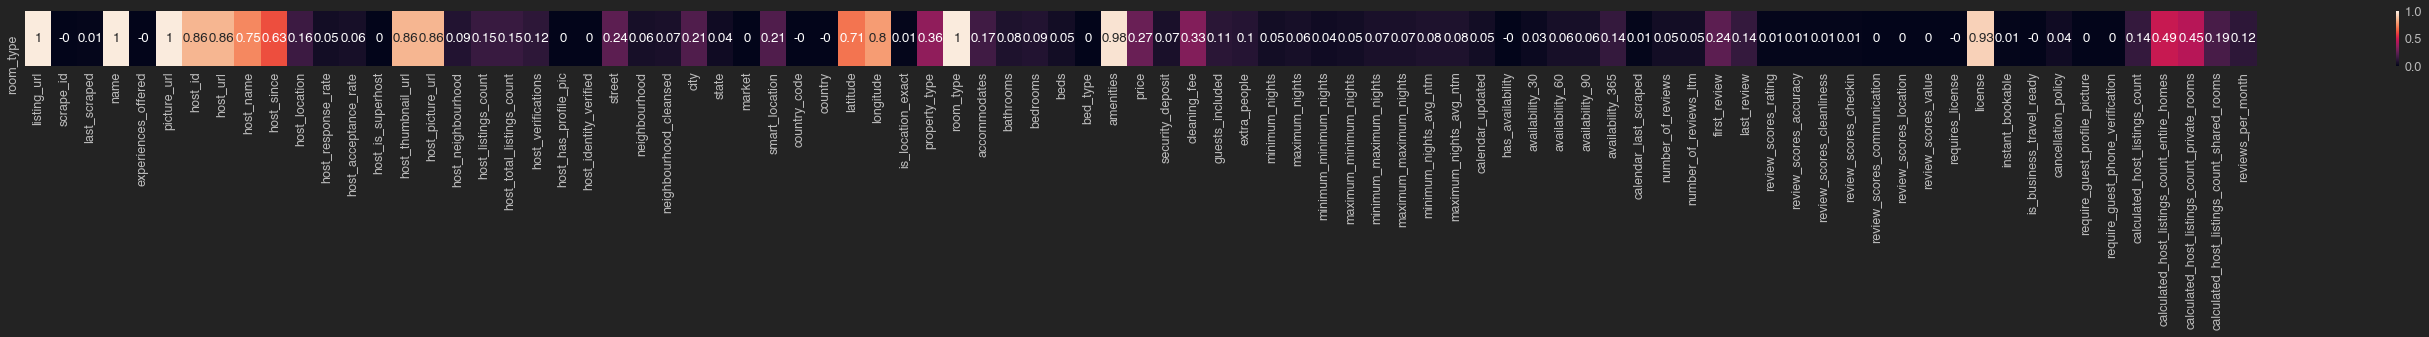

In [14]:
asosiasi_theils_u = []
for i in list(airbnb.columns):
    x = round((theils_u(airbnb['room_type'], airbnb[i])),2)
    asosiasi_theils_u.append(x)
    
data = pd.DataFrame(data=[asosiasi_theils_u], columns=list(airbnb.columns), index=['room_type'])
plt.figure(figsize=(50,1))
sns.heatmap(data, annot=True)

Berdasarkan visualisasi diatas, dapat dilihat bahwa kolom room_type memiliki asosiasi yang beragam dari range 0-1. Yang akan saya ambil adalah yang memiliki range tinggi atau mendekati satu karena hal tersebut menandakan kolom tersebut berhubungan/berkaitan. Akan tetapi angka asosiasi 1 seharusnya hanya ada pada kolom itu sendiri. sehingga apabila ada kolom dengan asosiasi sama, maka hal tersebut diperkirakan data yang serupa sehingga tidak akan dipilih.

# HEATMAP
heatmap bertujuan untuk melihat korelasi antar numerical data. Korelasi disini menunjukan pengaruh antar kolom-kolom numerical tersebut. Berbeda dengan asosiasi, korelasi dibagi menjadi dua yaitu korelasi positif dan negatif. Hal tersebut akan dijelaskan dibawah berdasarkan visualisasi Heatmap yang saya dapatkan. Sebelum melakukan uji korelasi, saya akan melihat skew di dataset Airbnb untuk melihat distribusi data ini untuk menentukan Heatmap yang akan saya pakai nantinya

In [15]:
airbnb.skew()

scrape_id                                        0.000000
host_id                                         -0.069634
host_response_rate                              -5.927533
host_acceptance_rate                            -5.292959
host_listings_count                              3.173786
host_total_listings_count                        3.173786
latitude                                       -43.139002
longitude                                        4.837166
accommodates                                     1.623815
bathrooms                                       12.171237
bedrooms                                        14.521297
beds                                             6.025617
price                                            9.955357
security_deposit                                11.483211
cleaning_fee                                     2.686769
guests_included                                  2.723961
extra_people                                     3.962313
minimum_nights

Berdasarkan uji skew diatas, ditemukan bahwa kolom banyak yang tidak terdistribusi normal sehingga akan dilakukan uji korelasi "spearman"

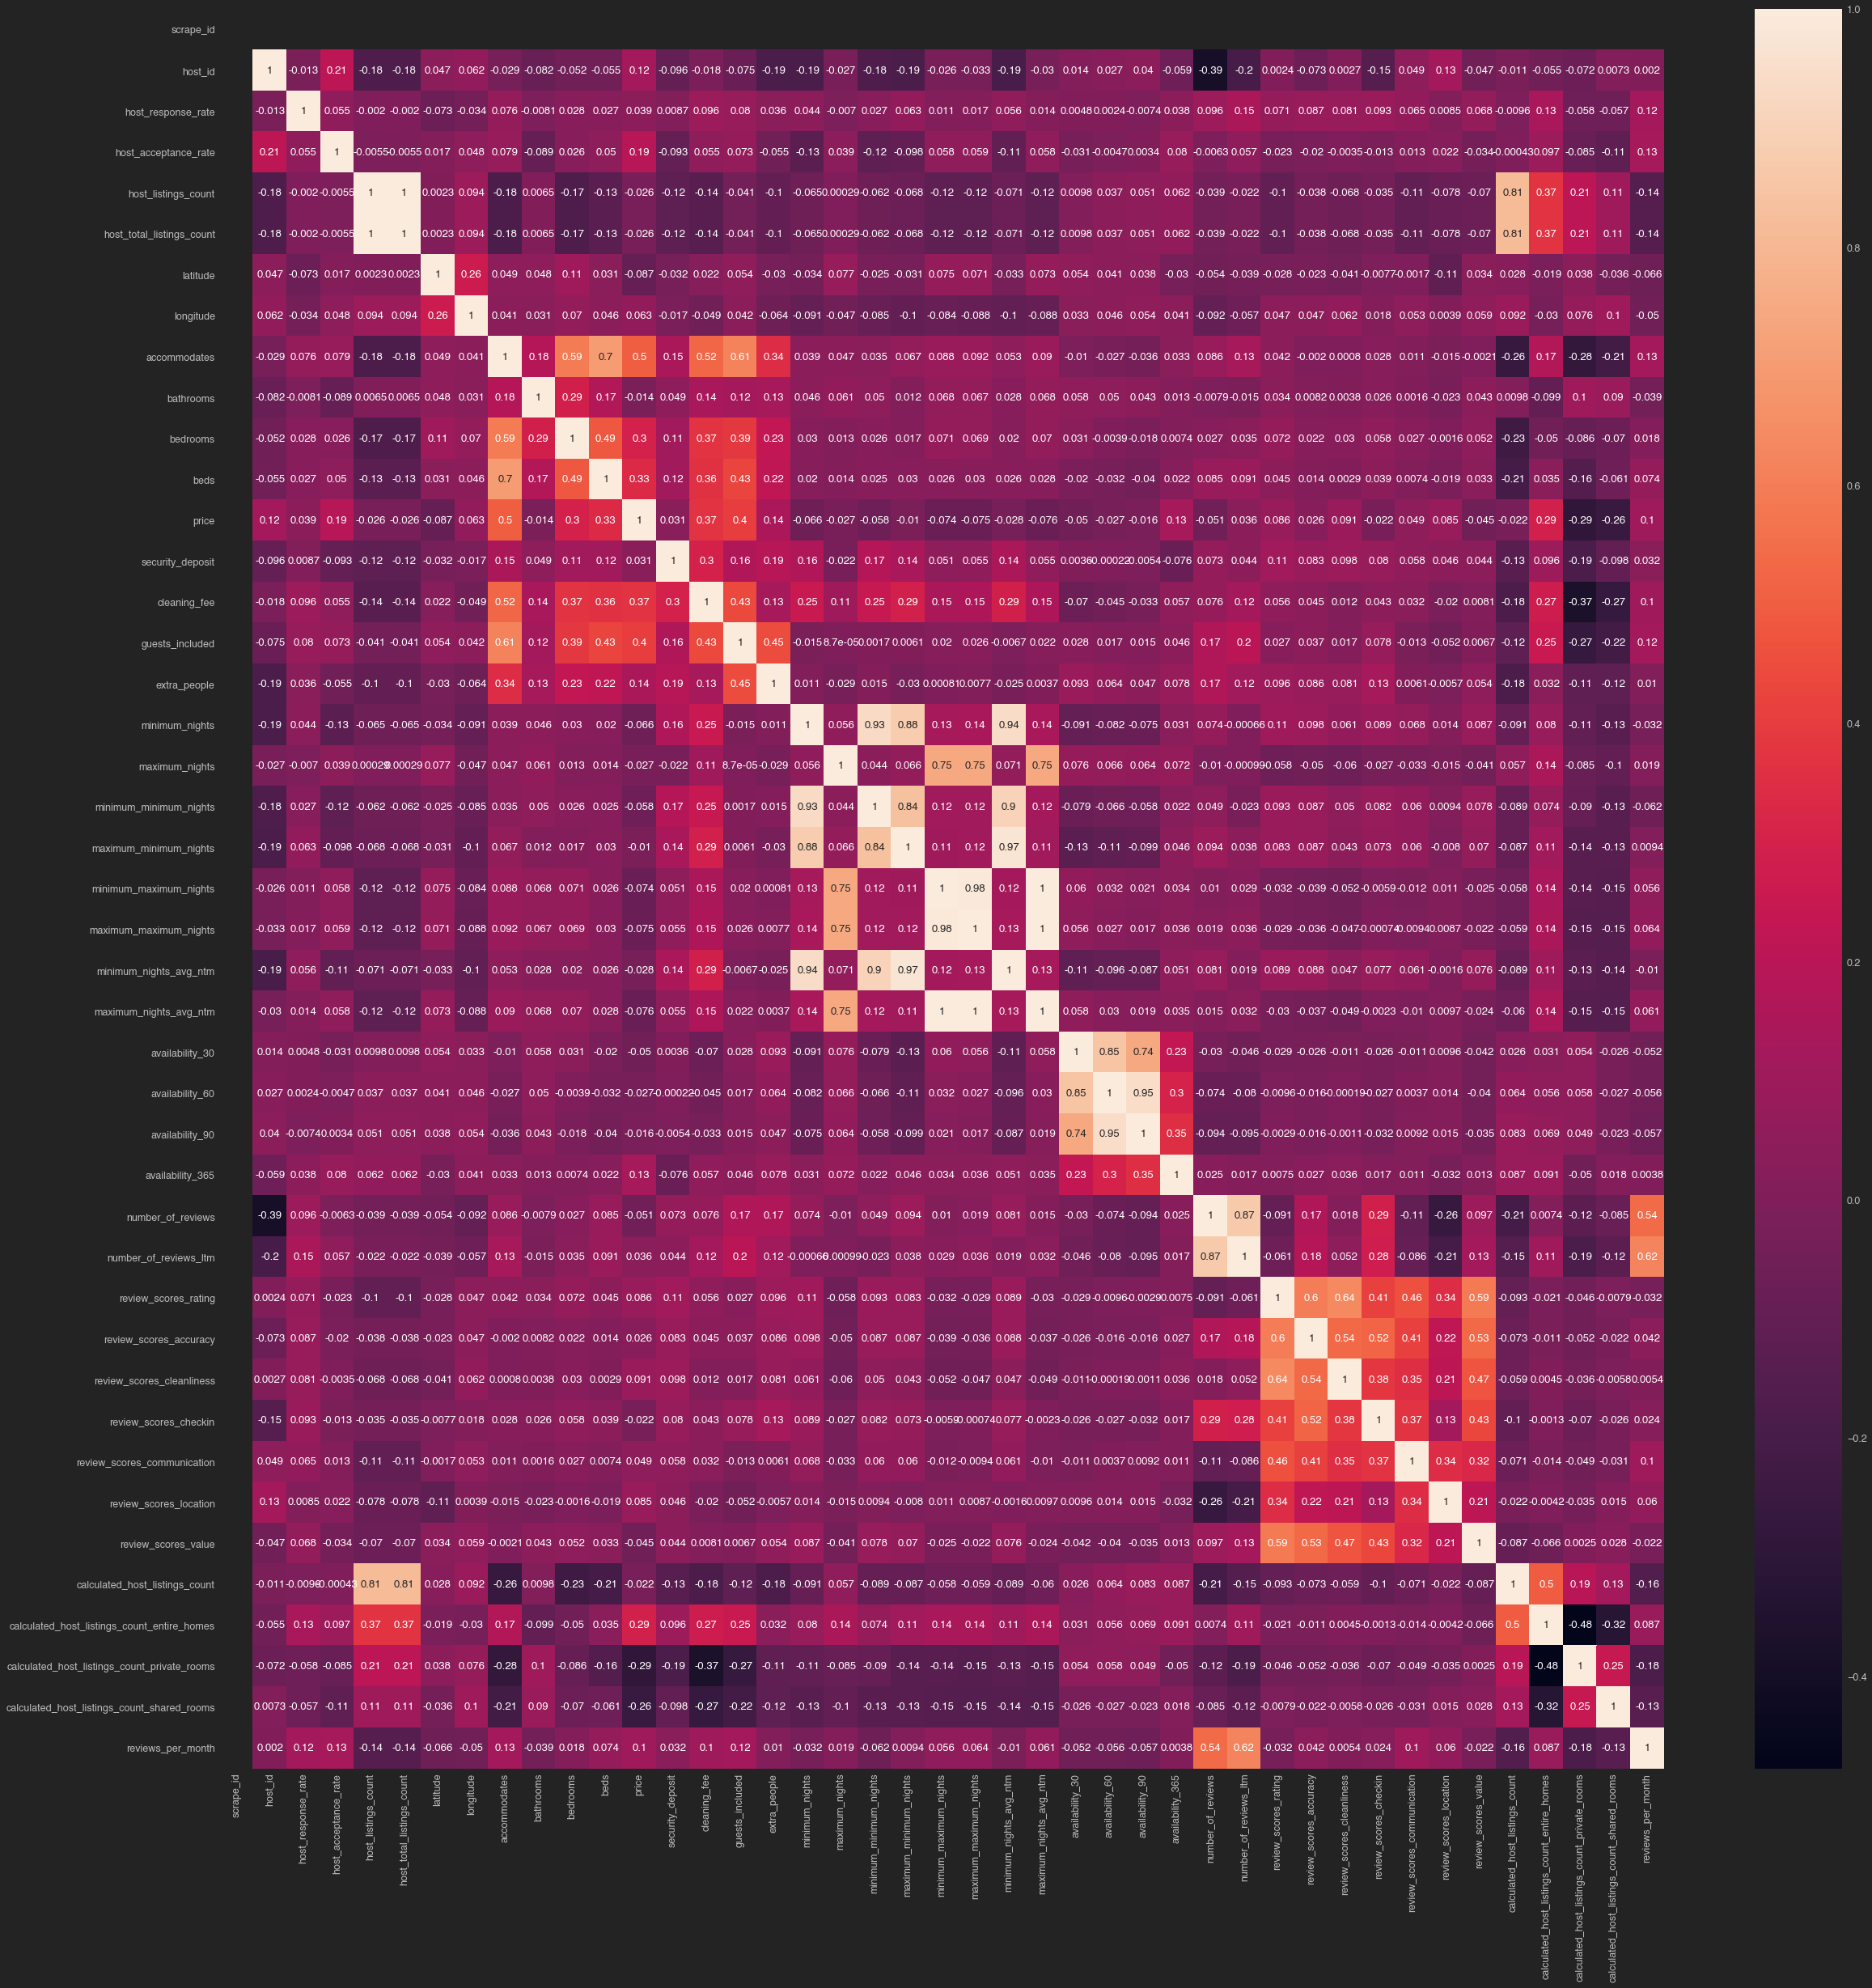

In [16]:
plt.figure(figsize=(40, 40))
sns.heatmap(airbnb.corr('spearman'),annot=True)
plt.savefig('Corr.png')

Berdasrkan data ini dapat dilihat bahwa korelasi di target "price" sangat beragam. Korelasi positif mengartikan bahwa pengaruh kolom tersebut sejalan. Sedangkan negatif maka pengaruh kolom tersebut memiliki pengaruh yang terbalik. Korelasi positif yang sangat baik saya dapatkan di Accommodates. Kedua jenis korelasi ini akan sangat berguna untuk feature selection

In [17]:
airbnb.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'name',
       'experiences_offered', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maxim

In [15]:
airbnb = airbnb[['host_id','name','host_is_superhost','host_verifications','host_identity_verified','neighbourhood_cleansed','host_since','property_type','room_type','amenities','license','instant_bookable','cancellation_policy','reviews_per_month','review_scores_rating','availability_365','guests_included','beds','bedrooms','accommodates','longitude','latitude','host_acceptance_rate','host_response_rate','price','security_deposit', 'cleaning_fee', 'extra_people']]

In [16]:
airbnb.head()

host_id                                               name  \
0   151977  La Casa Gaienmae C Harajuku, Omotesando is nearby   
1   964081                          Oshiage Holiday Apartment   
2   341577                  Private apt in central Tokyo #203   
3  1573631  Cozy flat #203, local area YET 10 mins to shib...   
4   341577                  Private apt in central Tokyo #201   

  host_is_superhost                                 host_verifications  \
0                 f  ['email', 'phone', 'facebook', 'reviews', 'jum...   
1                 t  ['email', 'phone', 'facebook', 'reviews', 'jum...   
2                 f  ['email', 'phone', 'reviews', 'jumio', 'govern...   
3                 t  ['email', 'phone', 'facebook', 'reviews', 'jum...   
4                 f  ['email', 'phone', 'reviews', 'jumio', 'govern...   

  host_identity_verified neighbourhood_cleansed  host_since property_type  \
0                      t             Shibuya Ku  2010-06-25     Apartment   
1                      t              Sumida Ku  2011-08-13     Apartment   
2                      t              Nerima Ku  2011-01-10     Apartment   
3                      t            Setagaya Ku  2012-01-06     Apartment   
4                      t              Nerima Ku  2011-01-10     Apartment   

         room_type                                          amenities  \
0     Private room  {TV,Internet,Wifi,Kitchen,"Paid parking off pr...   
1  Entire home/apt  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...   
2  Entire home/apt  {TV,Wifi,"Air conditioning",Kitchen,"Hot tub",...   
3  Entire home/apt  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...   
4  Entire home/apt  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...   

                                             license instant_bookable  \
0  Other reasons | \n弊社は不動産事業者であり賃貸住宅管理事業者でもあります。...                f   
1                                         M130003350                f   
2  Other reasons | 1か月以上の賃貸借契約のみ対応とする。ゲストには賃貸契約の署...                f   
3  Other reasons | We called Setagaya ku hokenjo ...                f   
4  Other reasons | 1か月以上の賃貸借契約のみ対応とする。ゲストには賃貸契約の署...                f   

           cancellation_policy  reviews_per_month  review_scores_rating  \
0  strict_14_with_grace_period               0.18                  94.0   
1                     moderate               1.56                  95.0   
2  strict_14_with_grace_period               1.17                  95.0   
3                     moderate               1.37                  95.0   
4  strict_14_with_grace_period               1.12                  96.0   

   availability_365  guests_included  beds  bedrooms  accommodates  longitude  \
0                89                1   1.0       1.0             1  139.71203   
1               270                1   2.0       1.0             2  139.82596   
2               242                1   1.0       1.0             2  139.65810   
3               364                1   1.0       0.0             2  139.65707   
4               353                1   1.0       1.0             2  139.65832   

   latitude  host_acceptance_rate  host_response_rate    price  \
0  35.67152                 100.0           96.488942   4192.0   
1  35.71721                  86.0          100.000000  10965.0   
2  35.74267                  82.0          100.000000   4192.0   
3  35.66443                  92.0          100.000000   6987.0   
4  35.74264                  82.0          100.000000   3977.0   

   security_deposit  cleaning_fee  extra_people  
0           30000.0        5000.0           0.0  
1           40000.0        5000.0           0.0  
2           32250.0        5375.0        1075.0  
3           20000.0        6000.0           0.0  
4           32250.0        5375.0        1075.0

In [20]:
# airbnb.to_csv('./Desktop/airbnb__1.csv',index=False)

# NUMERICAL FEATURES

In [17]:
numerical_feature = [feature for feature in airbnb.columns if airbnb[feature].dtypes != 'O'] #list comprehention untuk menyeleksi untuk setiap kolom di airbnb jika bukan object
print ('Number of numerical feature:' , len(numerical_feature)) # untuk memprint jumlah numerical feature

airbnb[numerical_feature].head() # mengeluarkan lima data teratas

Number of numerical feature: 16


host_id  reviews_per_month  review_scores_rating  availability_365  \
0   151977               0.18                  94.0                89   
1   964081               1.56                  95.0               270   
2   341577               1.17                  95.0               242   
3  1573631               1.37                  95.0               364   
4   341577               1.12                  96.0               353   

   guests_included  beds  bedrooms  accommodates  longitude  latitude  \
0                1   1.0       1.0             1  139.71203  35.67152   
1                1   2.0       1.0             2  139.82596  35.71721   
2                1   1.0       1.0             2  139.65810  35.74267   
3                1   1.0       0.0             2  139.65707  35.66443   
4                1   1.0       1.0             2  139.65832  35.74264   

   host_acceptance_rate  host_response_rate    price  security_deposit  \
0                 100.0           96.488942   4192.0           30000.0   
1                  86.0          100.000000  10965.0           40000.0   
2                  82.0          100.000000   4192.0           32250.0   
3                  92.0          100.000000   6987.0           20000.0   
4                  82.0          100.000000   3977.0           32250.0   

   cleaning_fee  extra_people  
0        5000.0           0.0  
1        5000.0           0.0  
2        5375.0        1075.0  
3        6000.0           0.0  
4        5375.0        1075.0

# DATETIME

In [50]:
datetime_feature = [feature for feature in airbnb.columns if 'since' in feature ] # list comprehension untuk menyeleksi kolom yang mengandung 'since' untuk dimasukkan dalam datetime
print ('Number of datetime features:' , len(datetime_feature))

airbnb[datetime_feature].head()

Number of datetime features: 1


host_since
0  2010-06-25
1  2011-08-13
2  2011-01-10
3  2012-01-06
4  2011-01-10

In [51]:
airbnb['host_since'] = pd.to_datetime(airbnb['host_since']) #membuat tahun bulan pada kolom baru
airbnb['year']= airbnb['host_since'].dt.year
airbnb['month'] = airbnb['host_since'].dt.month
airbnb['day']=airbnb['host_since'].dt.day

# CATEGORICAL FEATURES

In [38]:
categorical_feature = [feature for feature in airbnb.columns if airbnb[feature].dtypes == 'O']  #list comprehention untuk menyeleksi untuk setiap kolom di airbnb jika object
print ('Number of categorical feature:' , len(categorical_feature))

airbnb[categorical_feature].head()

Number of categorical feature: 12


name host_is_superhost  \
0  La Casa Gaienmae C Harajuku, Omotesando is nearby                 f   
1                          Oshiage Holiday Apartment                 t   
2                  Private apt in central Tokyo #203                 f   
3  Cozy flat #203, local area YET 10 mins to shib...                 t   
4                  Private apt in central Tokyo #201                 f   

                                  host_verifications host_identity_verified  \
0  ['email', 'phone', 'facebook', 'reviews', 'jum...                      t   
1  ['email', 'phone', 'facebook', 'reviews', 'jum...                      t   
2  ['email', 'phone', 'reviews', 'jumio', 'govern...                      t   
3  ['email', 'phone', 'facebook', 'reviews', 'jum...                      t   
4  ['email', 'phone', 'reviews', 'jumio', 'govern...                      t   

  neighbourhood_cleansed  host_since property_type        room_type  \
0             Shibuya Ku  2010-06-25     Apartment     Private room   
1              Sumida Ku  2011-08-13     Apartment  Entire home/apt   
2              Nerima Ku  2011-01-10     Apartment  Entire home/apt   
3            Setagaya Ku  2012-01-06     Apartment  Entire home/apt   
4              Nerima Ku  2011-01-10     Apartment  Entire home/apt   

                                           amenities  \
0  {TV,Internet,Wifi,Kitchen,"Paid parking off pr...   
1  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...   
2  {TV,Wifi,"Air conditioning",Kitchen,"Hot tub",...   
3  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...   
4  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...   

                                             license instant_bookable  \
0  Other reasons | \n弊社は不動産事業者であり賃貸住宅管理事業者でもあります。...                f   
1                                         M130003350                f   
2  Other reasons | 1か月以上の賃貸借契約のみ対応とする。ゲストには賃貸契約の署...                f   
3  Other reasons | We called Setagaya ku hokenjo ...                f   
4  Other reasons | 1か月以上の賃貸借契約のみ対応とする。ゲストには賃貸契約の署...                f   

           cancellation_policy  
0  strict_14_with_grace_period  
1                     moderate  
2  strict_14_with_grace_period  
3                     moderate  
4  strict_14_with_grace_period

# NUMERICAL FEATURE - Univariate

In [24]:
airbnb[numerical_feature].columns # mengeluarkan kolom

Index(['host_id', 'reviews_per_month', 'review_scores_rating',
       'availability_365', 'guests_included', 'beds', 'bedrooms',
       'accommodates', 'longitude', 'latitude', 'host_acceptance_rate',
       'host_response_rate', 'price', 'security_deposit', 'cleaning_fee',
       'extra_people'],
      dtype='object')

In [25]:
airbnb.skew()

host_id                 -0.069634
reviews_per_month        3.268446
review_scores_rating    -3.059085
availability_365         0.279219
guests_included          2.723961
beds                     6.025617
bedrooms                14.521297
accommodates             1.623815
longitude                4.837166
latitude               -43.139002
host_acceptance_rate    -5.292959
host_response_rate      -5.927533
price                    9.955357
security_deposit        11.483211
cleaning_fee             2.686769
extra_people             3.962313
dtype: float64

In [35]:
def diagnostic_plots(airbnb,variabel): # fungsi def untuk memplot istribusi kolom di dataset airbnb
    #ukuran
    plt.figure(figsize=(32,10)) #ukuran kesamping dan kebawah
    #histogram
    plt.subplot(1,2,1) #row, kolom, index
    sns.distplot(airbnb[variabel],bins=30) #distplot untuk memplot distribusi univariate dengan interval dibagi 30
    plt.title("Histogram") #titel/judul
    # Boxplot
    plt.subplot(1,2,2)#row,kolom,index
    sns.boxplot(y=airbnb[variabel]) #menggunakan plot boxplot 
    plt.title("Boxplot") #titel/judul
    
    plt.show() #mengeluarkan

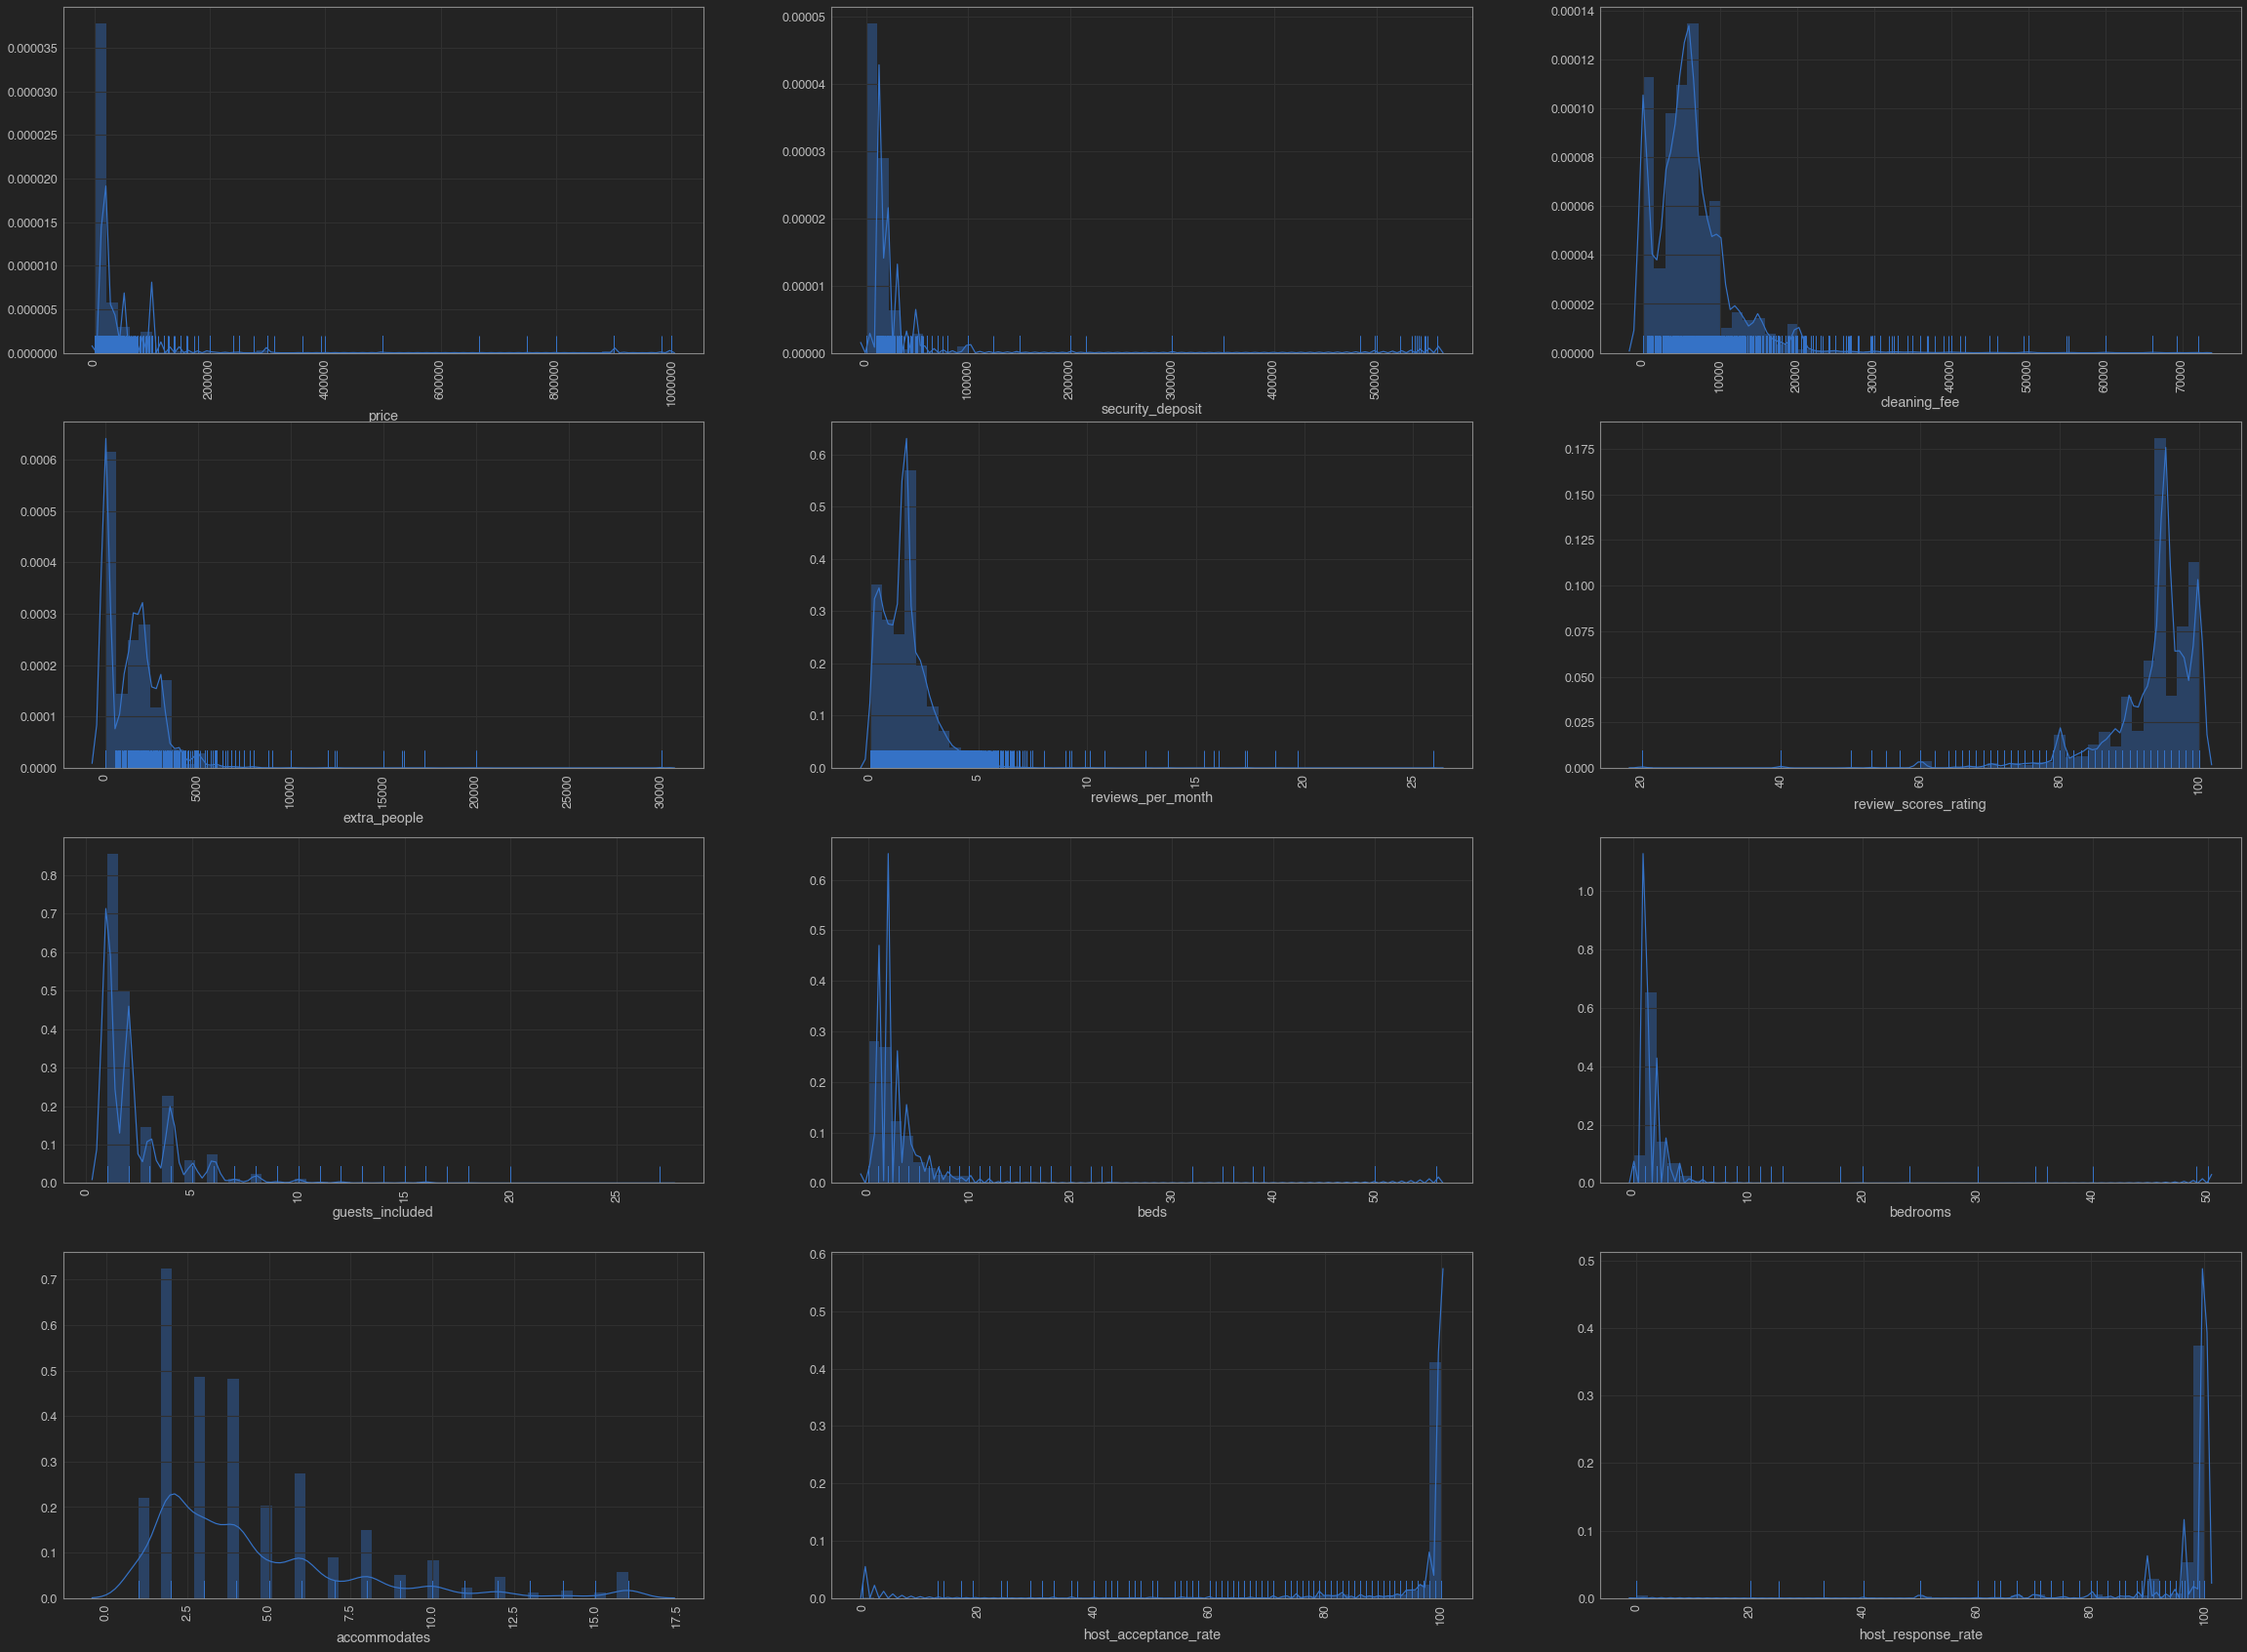

In [27]:
fig, ax = plt.subplots(4, 3, figsize=(40, 30)) #subplot adalah fungsi yang mengembalikan tuple yang berisi objek figur dan sumbu. Jadi ketika menggunakan fig, ax = plt.subplots() saya mengeluarkan tuple ite ke dalam variabel fig dan ax
for variable, subplot in zip(['price', # mengiterasi price, security deposit dll yang diratakan
                              'security_deposit',
                              'cleaning_fee',
                              'extra_people',
                              'reviews_per_month',
                              'review_scores_rating',
                              'guests_included',
                              'beds',
                              'bedrooms',
                              'accommodates',
                              'host_acceptance_rate',
                              'host_response_rate'], ax.flatten()):
    sns.distplot(airbnb[variable], rug=True, ax=subplot) # displot dengan rug untuk menandakan persebaran data di setiap sumbu x
    for label in subplot.get_xticklabels(): #mendapatkan label di sumbu x
        label.set_rotation(90) #meroptasi tulisan
        
plt.savefig('Numerical.png') #save figure kedalam png

Selain data yang tidak terdistribusi dengan normal, ada beberapa keunikan yang saya temukan dari distribusi numerical ini yaitu frekuensi terbanyak kebanyakkan berada di kisaran nilai-nilai yang kecil. kecuali untuk kolom-kolom penilaian seperti rate dan rating yang menandakan keseluruhan Airbnb memiliki rating yang baik. Untuk langkah selanjutnya akan dilakukan handling dengan Winsorizer. Karena metode ini terbilang aman dibandingkan membuang outliers yang kemungkinan sangat besar di data-data ini yang membuat sangat mudah hilangnya informasi.

In [28]:
windsoriser = Winsorizer(distribution='skewed',
                         tail='both',
                         fold=1.5,
                         variables=['host_acceptance_rate',
                                    'host_response_rate',
                                    'price',
                                    'security_deposit',
                                    'cleaning_fee',
                                    'extra_people',
                                    'beds',
                                    'bedrooms',
                                    'reviews_per_month',
                                    'review_scores_rating',
                                    'guests_included'])

windsoriser.fit(airbnb)

Winsorizer(distribution='skewed', fold=1.5, tail='both',
           variables=['host_acceptance_rate', 'host_response_rate', 'price',
                      'security_deposit', 'cleaning_fee', 'extra_people',
                      'beds', 'bedrooms', 'reviews_per_month',
                      'review_scores_rating', 'guests_included'])

In [29]:
airbnb = windsoriser.transform(airbnb)

# HIPOTESIS 1
- jumlah airbnb yang dekat dengan venue yang mana berada di tengah kota cenderung lebih banyak dibandingkan yang jauh

# LONGITUDE - LATITUDE

In [32]:
latitude = airbnb['latitude'].tolist()
longitude = airbnb['longitude'].tolist()
locations = list(zip(latitude, longitude))
m = folium.Map([35.6812,139.7671],zoom_start=12,tiles='CartoDB dark_matter')
folium.Marker(location=[35.6812,139.7671],popup='<strong>Tokyo', tooltip='Click for more information',icon=folium.Icon(color='pink')).add_to(m)
folium.Marker(location=[35.6779, 139.7145],popup='<strong>Tokyo Olympic Stadium</strong><br>Sports: Athletics,Football', tooltip='Click for more information',icon=folium.Icon(color='blue')).add_to(m)
folium.Marker(location=[35.641014,139.792048],popup='<strong>Ariake Gymnastic Centre</strong><br>Sports: Gymnastic', tooltip='Click for more information',icon=folium.Icon(color='lightgray')).add_to(m)
folium.Marker(location=[35.651403, 139.815074],popup='<strong>Tokyo Aquatics Centre</strong><br>Sports: Swimming', tooltip='Click for more information',icon=folium.Icon(color='red')).add_to(m)
folium.Marker(location=[35.6933, 139.7499],popup='<strong>Nippon Budokan</strong><br>Sports: Karate', tooltip='Click for more information',icon=folium.Icon(color='beige')).add_to(m)
folium.Marker(location=[35.6767, 139.7638],popup='<strong>Tokyo International Forum</strong><br>Sports: Weightlifting', tooltip='Click for more information',icon=folium.Icon(color='darkpurple')).add_to(m)
FastMarkerCluster(data=locations).add_to(m)
m

Dapat kita lihat dari peta diatas dapat kita simpulkan bahwa persebaran angka Airbnb memang terpusat di tengah kota yang cenderung dekat dengan Stadium-Stadium yang akan digunakan di 2020 Olympics . Berdasarkan angka kasat mata, Shinjuku merupakan area yang paling banyak memiliki Airbnb

In [33]:
tokyo = folium.Map(location=[35.6962, 139.7503], zoom_start=13, control_scale=True, tiles='CartoDB dark_matter')
folium.Marker(location=[35.6812,139.7671],popup='<strong>Tokyo', tooltip='Click for more information',icon=folium.Icon(color='pink')).add_to(tokyo)
folium.Marker(location=[35.6779, 139.7145],popup='<strong>Tokyo Olympic Stadium</strong><br>Sports: Athletics,Football', tooltip='Click for more information',icon=folium.Icon(color='blue')).add_to(tokyo)
folium.Marker(location=[35.641014,139.792048],popup='<strong>Ariake Gymnastic Centre</strong><br>Sports: Gymnastic', tooltip='Click for more information',icon=folium.Icon(color='lightgray')).add_to(tokyo)
folium.Marker(location=[35.651403, 139.815074],popup='<strong>Tokyo Aquatics Centre</strong><br>Sports: Swimming', tooltip='Click for more information',icon=folium.Icon(color='red')).add_to(tokyo)
folium.Marker(location=[35.6933, 139.7499],popup='<strong>Nippon Budokan</strong><br>Sports: Karate', tooltip='Click for more information',icon=folium.Icon(color='beige')).add_to(tokyo)
folium.Marker(location=[35.6767, 139.7638],popup='<strong>Tokyo International Forum</strong><br>Sports: Weightlifting', tooltip='Click for more information',icon=folium.Icon(color='darkpurple')).add_to(tokyo)
# Adding a heatmap to the base map
HeatMap(data=airbnb[['latitude', 'longitude']], radius=10).add_to(tokyo)

# Displaying the map
tokyo

Setelah sebelumnya melihat angka-angkany berdasarkan cluster, disini dapat dilihat jelas dan benar bahwa Shinjuku memiliki angka Airbnb terbesar. Setelah ditelaah, Shinjuku memang dijuluki salah satu kota teramai di Tokyo. Terlebih lagi Stasiun di Shinjuku ini atau Stasiun Shinjuku merupakan stasiun tersibuk untuk setiap harinya dengan berbagai line baik bawah tanah , maupun biasa.

# " Shinjuku station was used by an average of 3.64 million people per day in 2007, making it, by far, the world's busiest transport hub (and registered as such with Guinness World Records)." 
-via wikipedia

In [30]:
m.save('map.html')

In [32]:
tokyo.save('tokyomap.html')

# CATEGORICAL FEATURE - Univariate

In [40]:
airbnb[categorical_feature].columns

Index(['name', 'host_is_superhost', 'host_verifications',
       'host_identity_verified', 'neighbourhood_cleansed', 'host_since',
       'property_type', 'room_type', 'amenities', 'license',
       'instant_bookable', 'cancellation_policy'],
      dtype='object')

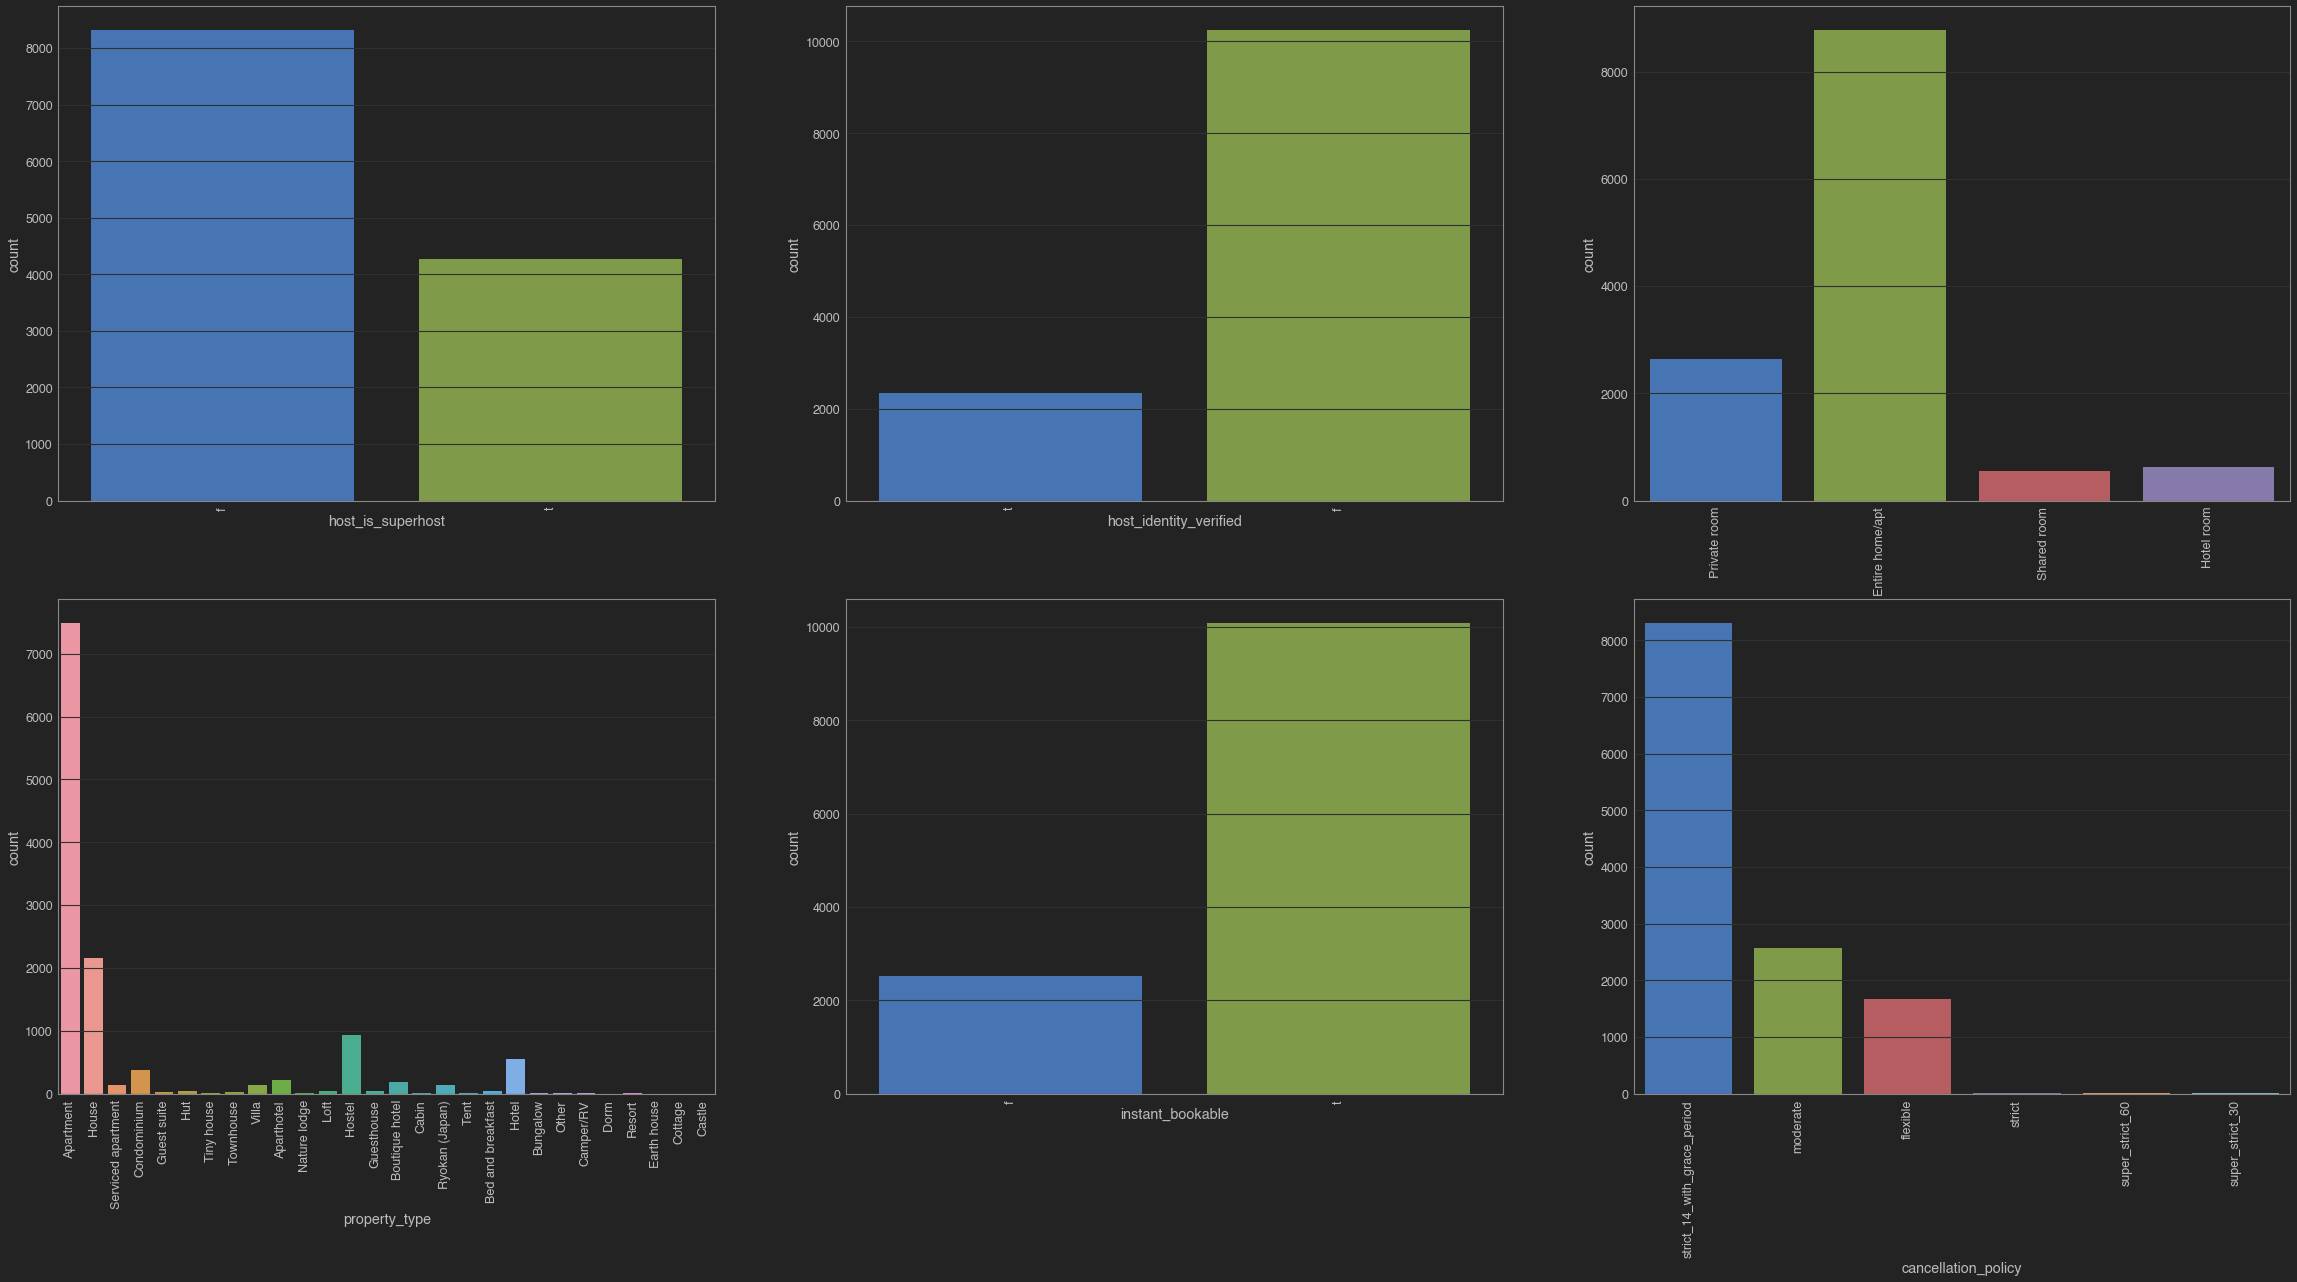

In [39]:
fig, ax = plt.subplots(2, 3, figsize=(40, 20))
for variable, subplot in zip(['host_is_superhost','host_identity_verified','room_type','property_type','instant_bookable','cancellation_policy'], ax.flatten()):
    sns.countplot(airbnb[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

plt.savefig('Categorical.png')

Berdasarkan data diatas, dapat dilihat  host_is_superhost f nya kok lebih besar? jelek semua dong? tentu tidak, jd superhost ini diberikan oleh airbnb kepada host yang mana memberikan contoh teladan untuk host yang lain dan memberikan experience yang lebih baik kepada guest nya. Apa sisanya berarti jelek? tentu engga, jd kayak pemberian mvp atau murid teladan. seluruh host ini bisa dibilang sama-sama berjuang disini tp hanya beberapa aja yg dipilih. Dan jg badge superhost ini tidak tetap jg krn akan diperbaharui terus selama 4 tahun sekali menurut situs resmi airbnb. AKAN TETAPI HAL INI MENUNJUKAN INFORMASI INI TIDAK VALID 100 % SEHINGGA TIDAK AKAN DIJADIKAN PENENTU NANTINYA SAAT MODELING

host_identity_verified. 
Hal ini juga terasa janggal karena anyak yg ga terverifikasi? apakah menandakan banyak yang ilegal? jd menurut situs airbnb nya. ada yang disebut host_verifications yang berbentuk list tentang bagaimana cara host memverifikasi akunnya. ada by email, government id, facebook dll. Lalu setelah disetujui, tentu mereka akan dpt balasan dari airbnb untuk mengklik verifikasi, disinilah banyak yang tidak memperdulikan hal tsb. AKAN TETAPI HAL INI MENUNJUKAN INFORMASI INI TIDAK VALID 100 % SEHINGGA TIDAK AKAN DIJADIKAN PENENTU NANTINYA SAAT MODELING.

Room Type.
Entire home/apt merupakan yang paling banyak, hal ini terjadi karena tipe ini dinilai sangat cocok untuk orang jepang dan turis yang menginap yang membutuhkan ketenangan. Dimana ruangan dengan tipe ini memiliki seluruh tempat untuk diri mereka sendiri tanpa harus share dengan orang lain atau pemilik rumah. Yang biasanya mencakup kamar tidur, kamar mandi, dan dapur.

Property Type.
Property jenis apartment paling banyak digunakan untuk pengusaha Airbnb karena memiliki beberapa kemudahan untuk yang menginap dan turis yang ingin tinggal dalam jangka waktu pendek

Cancelation policies.
Pembatalan yang selain tiga teratas terasa sangat kontras, sehingga nantinya akan dilihat lebih dalam.

In [43]:
airbnb_describe =[]

for i in airbnb[categorical_feature].columns:
    airbnb_describe.append([
        i,
        airbnb[i].nunique(),
        airbnb[i].unique(),
        airbnb[i].value_counts()
    ])

In [44]:
DESC_CAT = pd.DataFrame(airbnb_describe, columns=['column','nunique','unique','value_counts'])
DESC_CAT

column  nunique  \
0                     name    11669   
1        host_is_superhost        2   
2       host_verifications      203   
3   host_identity_verified        2   
4   neighbourhood_cleansed       55   
5               host_since     1638   
6            property_type       28   
7                room_type        4   
8                amenities     9182   
9                  license     7214   
10        instant_bookable        2   
11     cancellation_policy        6   

                                               unique  \
0   [La Casa Gaienmae C Harajuku, Omotesando is ne...   
1                                              [f, t]   
2   [['email', 'phone', 'facebook', 'reviews', 'ju...   
3                                              [t, f]   
4   [Shibuya Ku, Sumida Ku, Nerima Ku, Setagaya Ku...   
5   [2010-06-25, 2011-08-13, 2011-01-10, 2012-01-0...   
6   [Apartment, House, Serviced apartment, Condomi...   
7   [Private room, Entire home/apt, Shared room, H...   
8   [{TV,Internet,Wifi,Kitchen,"Paid parking off p...   
9   [Other reasons | \n弊社は不動産事業者であり賃貸住宅管理事業者でもあります...   
10                                             [f, t]   
11  [strict_14_with_grace_period, moderate, flexib...   

                                         value_counts  
0   10㎡ Convenient Private Bath 1min Ikebukuro C1 ...  
1   f    8322
t    4278
Name: host_is_superhost, d...  
2   ['email', 'phone']                            ...  
3   f    10252
t     2348
Name: host_identity_veri...  
4   Shinjuku Ku            2398
Taito Ku          ...  
5   2020-01-31    92
2019-04-28    92
2018-12-07  ...  
6   Apartment             7489
House              ...  
7   Entire home/apt    8781
Private room       264...  
8   {TV,"Air conditioning",Kitchen,Elevator,Heatin...  
9   旅館業法の許可番号 | 台東区台東保健所 | 30台台健生環き第183号          ...  
10  t    10084
f     2516
Name: instant_bookable, ...  
11  strict_14_with_grace_period    8308
moderate  ...

Berdasarkan data diatas, terdapat dua yang harus di extract yaitu host_verifications dan amenities untuk didapatkan informasi di dalamnya. Hal ini akan dilakukan dengan WordCloud untuk melihat bobot setiap kata yang dapat memberikan informasi

# HOST VERIFICATIONS

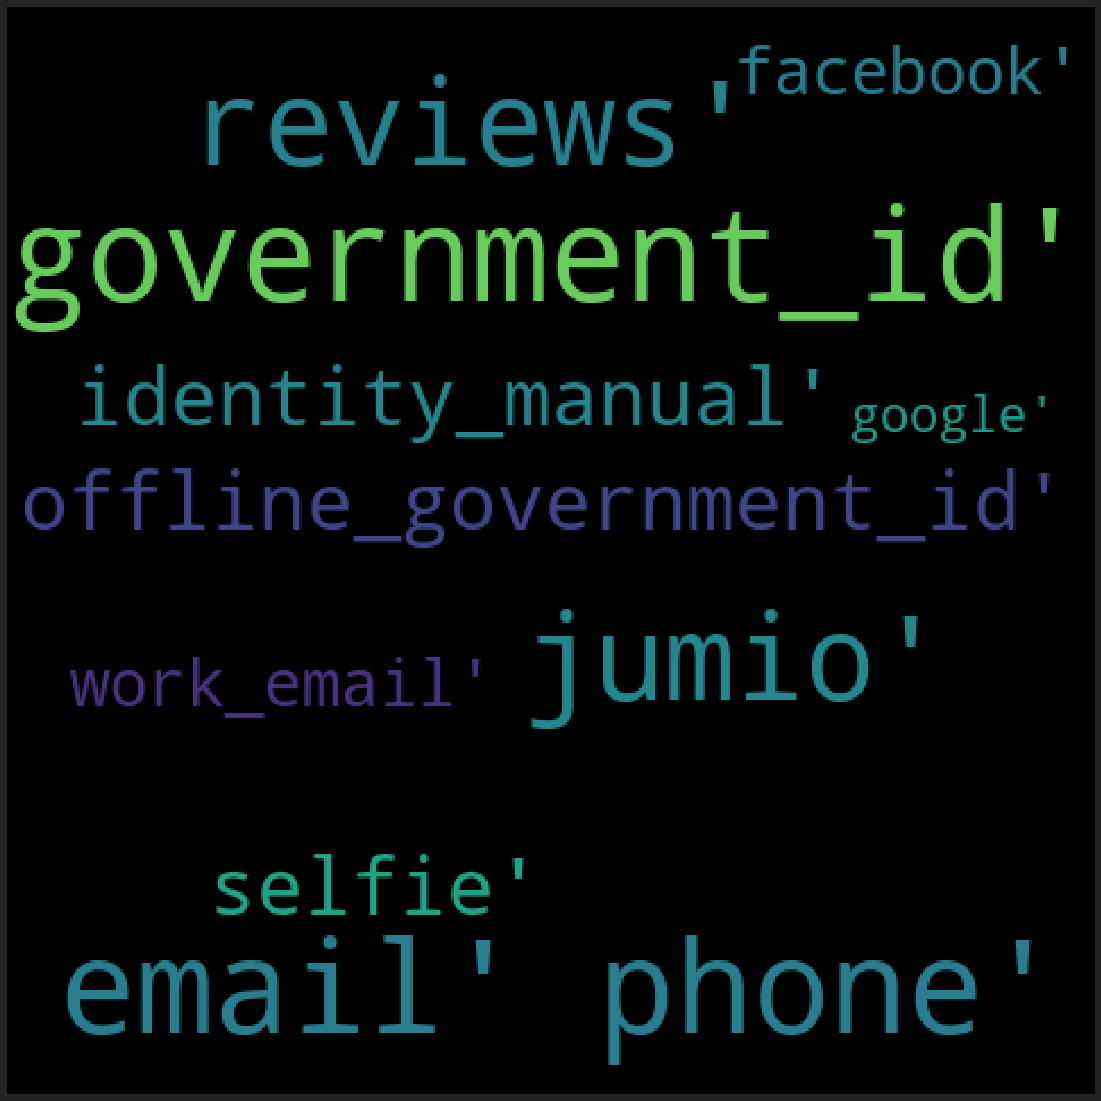

In [46]:
text = airbnb['host_verifications'].values
host_veri = WordCloud(width=480, height=480, max_words=20, colormap='viridis',background_color="black").generate(str(text))
plt.figure(figsize=(20,20))
plt.imshow(host_veri)
plt.axis("off")
plt.show()

Berikut ini adalah beberapa top yang digunakan host untuk verifikasi akun mereka. Ada istilah yang baru disini yaitu "Jumio". jumio adalah identity verifications berbasis AI yang mana dipercaya dapat mengurangi kecurangan, kebohongan identitas dll. https://www.jumio.com/about/

In [55]:
airbnb.nunique()

host_id                    3236
name                      11669
host_is_superhost             2
host_verifications          203
host_identity_verified        2
neighbourhood_cleansed       55
host_since                 1638
property_type                28
room_type                     4
amenities                  9182
license                    7214
instant_bookable              2
cancellation_policy           6
reviews_per_month           577
review_scores_rating         45
availability_365            365
guests_included              20
beds                         30
bedrooms                     23
accommodates                 16
longitude                  8332
latitude                   7186
host_acceptance_rate         66
host_response_rate           34
price                       544
security_deposit            178
cleaning_fee                469
extra_people                216
dtype: int64

# NEIGHBOURHOOD CLEANSED

In [56]:
airbnb['neighbourhood_cleansed'].nunique()

55

In [57]:
airbnb.pivot_table(index='neighbourhood_cleansed', values='host_id',aggfunc=['count']).round(2).T

neighbourhood_cleansed  Adachi Ku  Akiruno Shi  Akishima Shi  Arakawa Ku  \
count host_id                 184            8             2         339   

neighbourhood_cleansed  Bunkyo Ku  Chiyoda Ku  Chofu Shi  Chuo Ku  Edogawa Ku  \
count host_id                 141         208          8      520         201   

neighbourhood_cleansed  Fuchu Shi  Fussa Shi  Hachijo Machi  Hachioji Shi  \
count host_id                   6          3              6            43   

neighbourhood_cleansed  Hamura Shi  Higashikurume Shi  Higashimurayama Shi  \
count host_id                    3                  3                   13   

neighbourhood_cleansed  Higashiyamato Shi  Hino Shi  Hinohara Mura  Inagi Shi  \
count host_id                           1        26              5          2   

neighbourhood_cleansed  Itabashi Ku  Katsushika Ku  Kita Ku  Kodaira Shi  \
count host_id                   271            293      305           10   

neighbourhood_cleansed  Koganei Shi  Kokubunji Shi  Komae Shi  Koto Ku  \
count host_id                     3             13          9      189   

neighbourhood_cleansed  Kunitachi Shi  Machida Shi  Meguro Ku  Minato Ku  \
count host_id                       9           27         58        442   

neighbourhood_cleansed  Mitaka Shi  Miyake Mura  Musashimurayama Shi  \
count host_id                   11            2                    4   

neighbourhood_cleansed  Musashino Shi  Nakano Ku  Nerima Ku  Niijima Mura  \
count host_id                      11        358         78             2   

neighbourhood_cleansed  Nishitokyo Shi  Ogasawara Mura  Okutama Machi  \
count host_id                       15               3              3   

neighbourhood_cleansed  Ome Shi  Oshima Machi  Ota Ku  Setagaya Ku  \
count host_id                 4            15     413          324   

neighbourhood_cleansed  Shibuya Ku  Shinagawa Ku  Shinjuku Ku  Suginami Ku  \
count host_id                  800           209         2398          279   

neighbourhood_cleansed  Sumida Ku  Tachikawa Shi  Taito Ku  Tama Shi  \
count host_id                1185              6      1815        10   

neighbourhood_cleansed  Toshima Ku  
count host_id                 1304

In [58]:
airbnb['neighbourhood_cleansed'].value_counts()

Shinjuku Ku            2398
Taito Ku               1815
Toshima Ku             1304
Sumida Ku              1185
Shibuya Ku              800
Chuo Ku                 520
Minato Ku               442
Ota Ku                  413
Nakano Ku               358
Arakawa Ku              339
Setagaya Ku             324
Kita Ku                 305
Katsushika Ku           293
Suginami Ku             279
Itabashi Ku             271
Shinagawa Ku            209
Chiyoda Ku              208
Edogawa Ku              201
Koto Ku                 189
Adachi Ku               184
Bunkyo Ku               141
Nerima Ku                78
Meguro Ku                58
Hachioji Shi             43
Machida Shi              27
Hino Shi                 26
Nishitokyo Shi           15
Oshima Machi             15
Higashimurayama Shi      13
Kokubunji Shi            13
Mitaka Shi               11
Musashino Shi            11
Kodaira Shi              10
Tama Shi                 10
Komae Shi                 9
Kunitachi Shi       

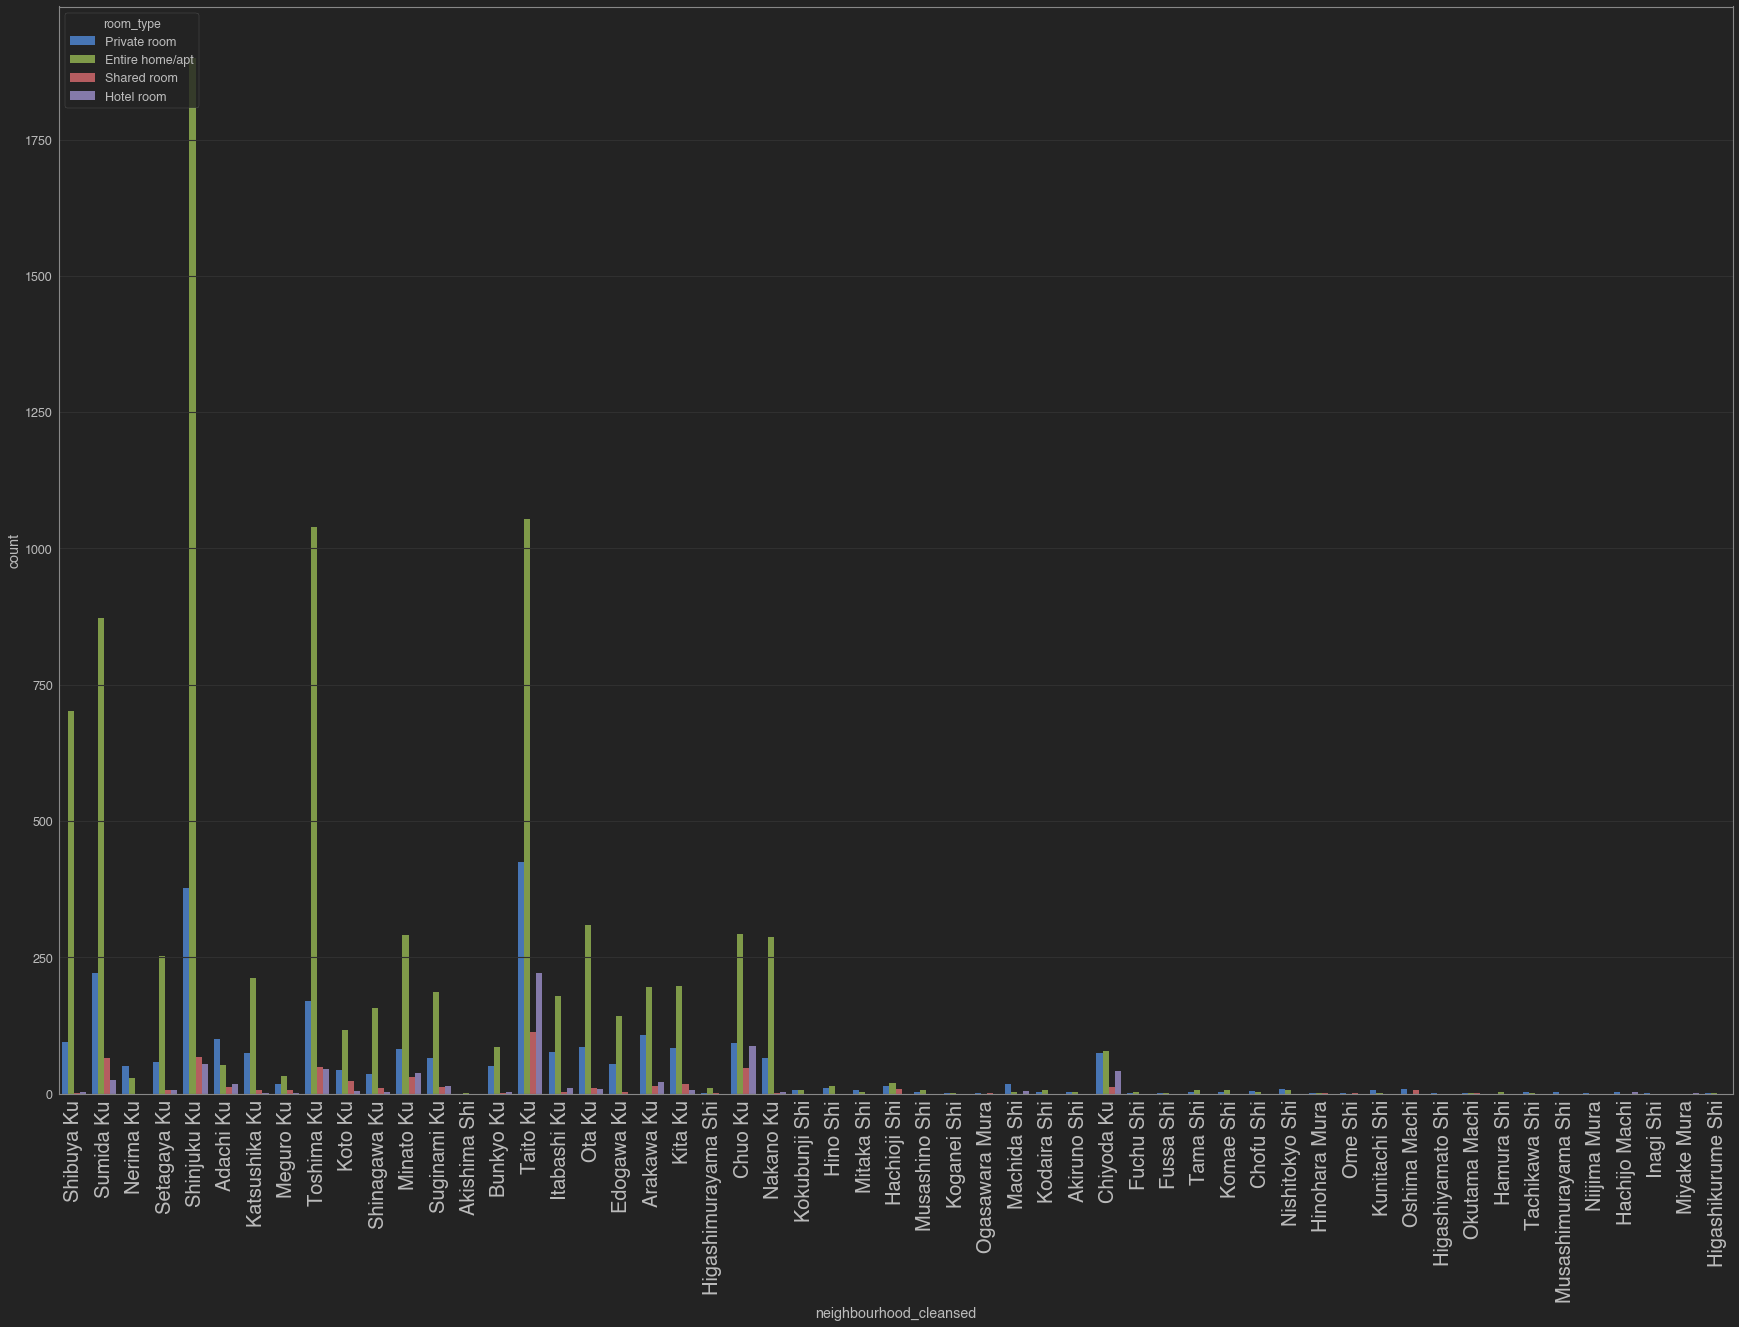

In [47]:
plt.figure(figsize=(30,20))
g= sns.countplot(data=airbnb, x='neighbourhood_cleansed',hue='room_type') #memvisualisasikan jumlah setiap type properti dengan seabron countplot
g.set_xticklabels(g.get_xticklabels(),fontsize=20, rotation=90)
plt.savefig('Neighbourhood.png')


Berdasarkan angka count sebelumnya, Shinjuku merupakan area terbanyak memiliki Airbnb. Untuk data berdasarkan tipe ruangan sendiri dapat dilihat tipe Entire Home/Apt paling banyak terletak di Shinjuku, Untuk Private Room,Hotel, dan Shared Room keseluruhan banyak di Taito Ku. Taito ini merupakan area yang terkenal akan wisata budaya nya salah satunya Sensoji Temple di asakusa https://en.wikipedia.org/wiki/Taitō#Landmarks. Setelah ini akan ditelaah lebih dalam density masing-masing tipe ruangan dengan folium untuk melihat pemusatannya. Lalu dapat dilhat dimulai dari Kokubunji hingga Higashikumurume Shi sangat sepi jumlah Airbnb. Hal ini didasari karena airbnb baru berkembang disana dan juga fokus dari Airbnb sebelumnya yaitu dekat dengan pusat kota yang mana terlihat sekali disini. 

# ROOM TYPE

In [48]:
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [49]:
airbnb.pivot_table(index='room_type', values='host_id',aggfunc=['count']).round(2).T

room_type      Entire home/apt  Hotel room  Private room  Shared room
count host_id             8781         633          2641          545

In [50]:
entire = airbnb[airbnb['room_type'] == 'Entire home/apt']
hotel = airbnb[airbnb['room_type'] == 'Hotel room']
private = airbnb[airbnb['room_type'] == 'Private room']
shared = airbnb[airbnb['room_type'] == 'Shared room']

In [52]:
tokyo = folium.Map(location=[35.6762, 139.6503], zoom_start=13, control_scale=True, tiles='CartoDB dark_matter')

# Adding a heatmap to the base map
HeatMap(data=entire[['latitude', 'longitude']], radius=10).add_to(tokyo)

# Displaying the map
tokyo

In [53]:
tokyo = folium.Map(location=[35.6762, 139.6503], zoom_start=13, control_scale=True, tiles='CartoDB dark_matter')

# Adding a heatmap to the base map
HeatMap(data=hotel[['latitude', 'longitude']], radius=10).add_to(tokyo)

# Displaying the map
tokyo

In [54]:
tokyo = folium.Map(location=[35.6762, 139.6503], zoom_start=13, control_scale=True, tiles='CartoDB dark_matter')

# Adding a heatmap to the base map
HeatMap(data=private[['latitude', 'longitude']], radius=10).add_to(tokyo)

# Displaying the map
tokyo

In [55]:
tokyo = folium.Map(location=[35.6762, 139.6503], zoom_start=13, control_scale=True, tiles='CartoDB dark_matter')

# Adding a heatmap to the base map
HeatMap(data=shared[['latitude', 'longitude']], radius=10).add_to(tokyo)

# Displaying the map
tokyo

# AMENITIES

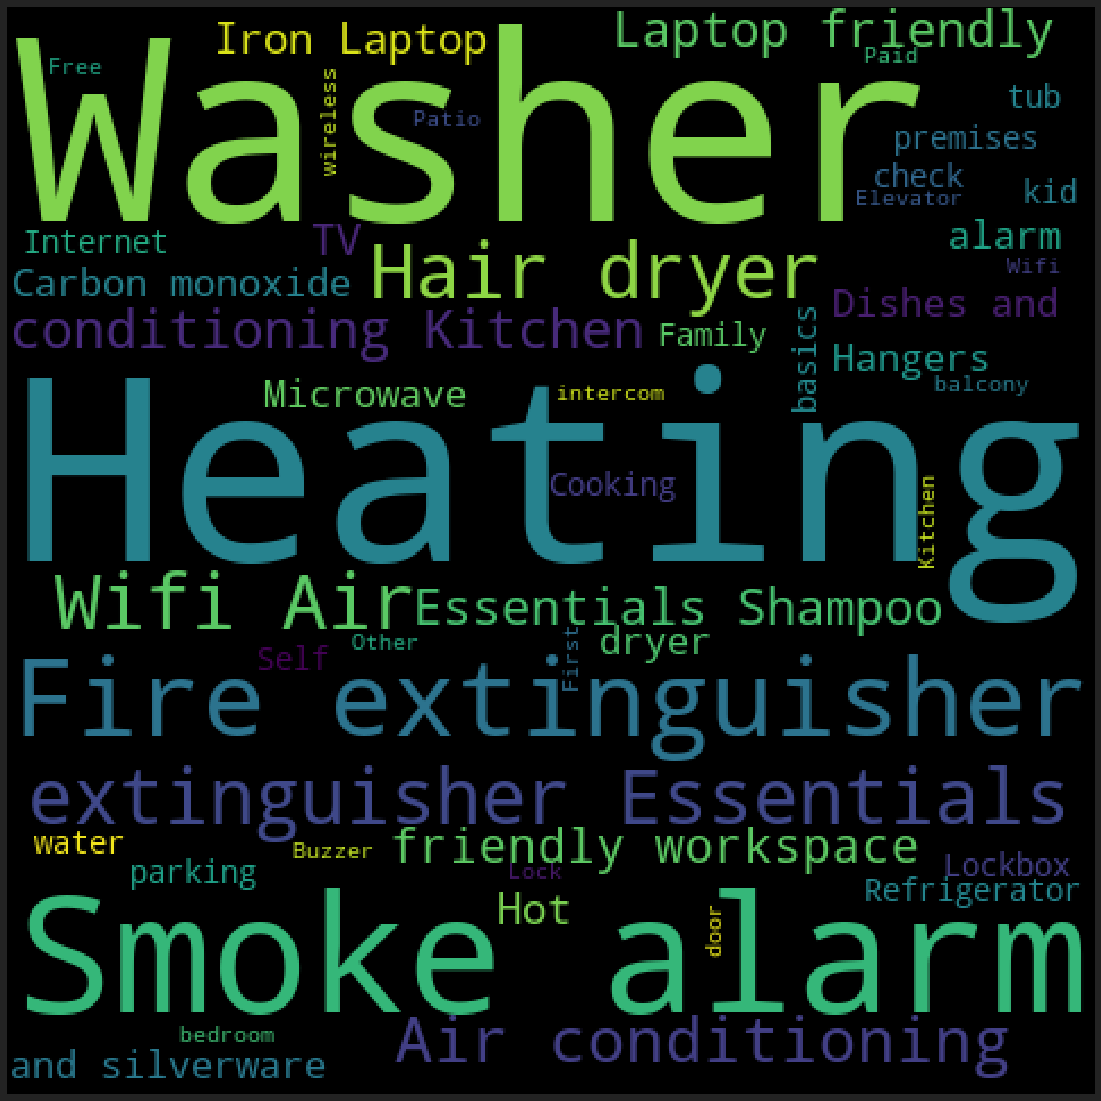

<Figure size 460.8x403.2 with 0 Axes>

In [56]:
text = airbnb['amenities'].values
amenities = WordCloud(width=480, height=480, max_words=50, colormap='viridis',background_color="black").generate(str(text))
plt.figure(figsize=(20,20))
plt.imshow(amenities)
plt.axis("off")
plt.show()
plt.savefig('Amenities.jpg')

Berdasarkan hal ini dapat dilihat bahwa kebutuhan perlengkapan yang besar sangatlah beragam. Dapat dilihat Heating sangat diperlukan, tentu karena kita tahu Jepang merupakan salah satu negara dengan 4 musim, sehingga selain AC tentu perlu pemanas. Kemudian Washer, Smoke Alarm dan lain sebagainya. Berdasarkan ini, saya akan melakukan pembobotan berdasarkan perlengkapan-perlengkapan ini yang mana membantu dalam menentukan harga dari Airbnb tersebut. Ibarat kost-kostan, kost yang memiliki AC tentu akan lebih mahal dibandingkan yang tidak

# DATE TIME FEATURE

In [57]:
airbnb['host_since'] = pd.to_datetime(airbnb['host_since']) #membuat tahun bulan pada kolom baru
airbnb['year']= airbnb['host_since'].dt.year
airbnb['month'] = airbnb['host_since'].dt.month
airbnb['day']= airbnb['host_since'].dt.day

In [58]:
airbnb.pivot_table(index='year', values='host_id', aggfunc=['count']).round(2).T


year           2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  \
count host_id     3    34    24   233   556  1695  1695  1474  2945  3165   

year           2020  
count host_id   776

Berdasarkan data ini dapat dilihat bahwa, jumlah Airbnb Terus meningkat, meski ada penurunan kenaikan pada 2017, yang mana hal ini terjadi karena adanya waktu evaluasi untuk penerapan baru Minpaku Law yang telah dijelaskan sebelumnya sehingga banyak penundaan konfirmasi airbnb di tahun ini.

In [80]:
airbnb.pivot_table(index='month', values='host_id', aggfunc=['count']).round(2).T

month           1    2     3    4     5     6     7     8     9     10    11  \
count host_id  923  867  1075  972  1070  1007  1250  1107  1070  1047  1086   

month            12  
count host_id  1126

In [81]:
airbnb.pivot_table(index='day', values='host_id', aggfunc=['count']).round(2).T

day             1    2    3    4    5    6    7    8    9    10   11   12  \
count host_id  374  374  376  541  532  466  469  495  393  370  361  442   

day             13   14   15   16   17   18   19   20   21   22   23   24  \
count host_id  452  405  440  368  488  421  403  304  352  424  413  335   

day             25   26   27   28   29   30   31  
count host_id  541  354  384  427  340  309  247

Text(0.5, 1.0, 'Price vs Year')

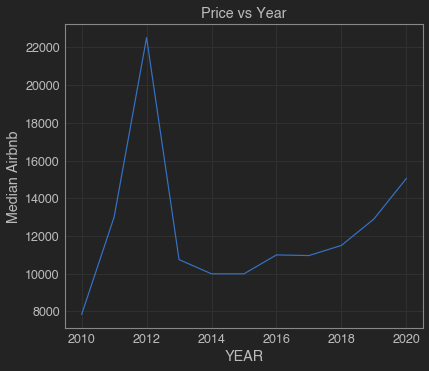

In [82]:
airbnb.groupby('year')['price'].median().plot()
plt.xlabel('YEAR')
plt.ylabel('Median Airbnb')
plt.title('Price vs Year')

# BIVARIATE 
## CATEGORICAL FEATURE
https://www.kaggle.com/nextbigwhat/eda-for-categorical-variables-a-beginner-s-way

In [59]:
airbnb[categorical_feature].columns

Index(['name', 'host_is_superhost', 'host_verifications',
       'host_identity_verified', 'neighbourhood_cleansed', 'host_since',
       'property_type', 'room_type', 'amenities', 'license',
       'instant_bookable', 'cancellation_policy'],
      dtype='object')

In [60]:
airbnb["host_is_superhost"].replace(["t","f"],[True,False],inplace=True)
airbnb["instant_bookable"].replace(["t","f"],[True,False],inplace=True)
airbnb["host_identity_verified"].replace(["t","f"],[True,False],inplace=True)

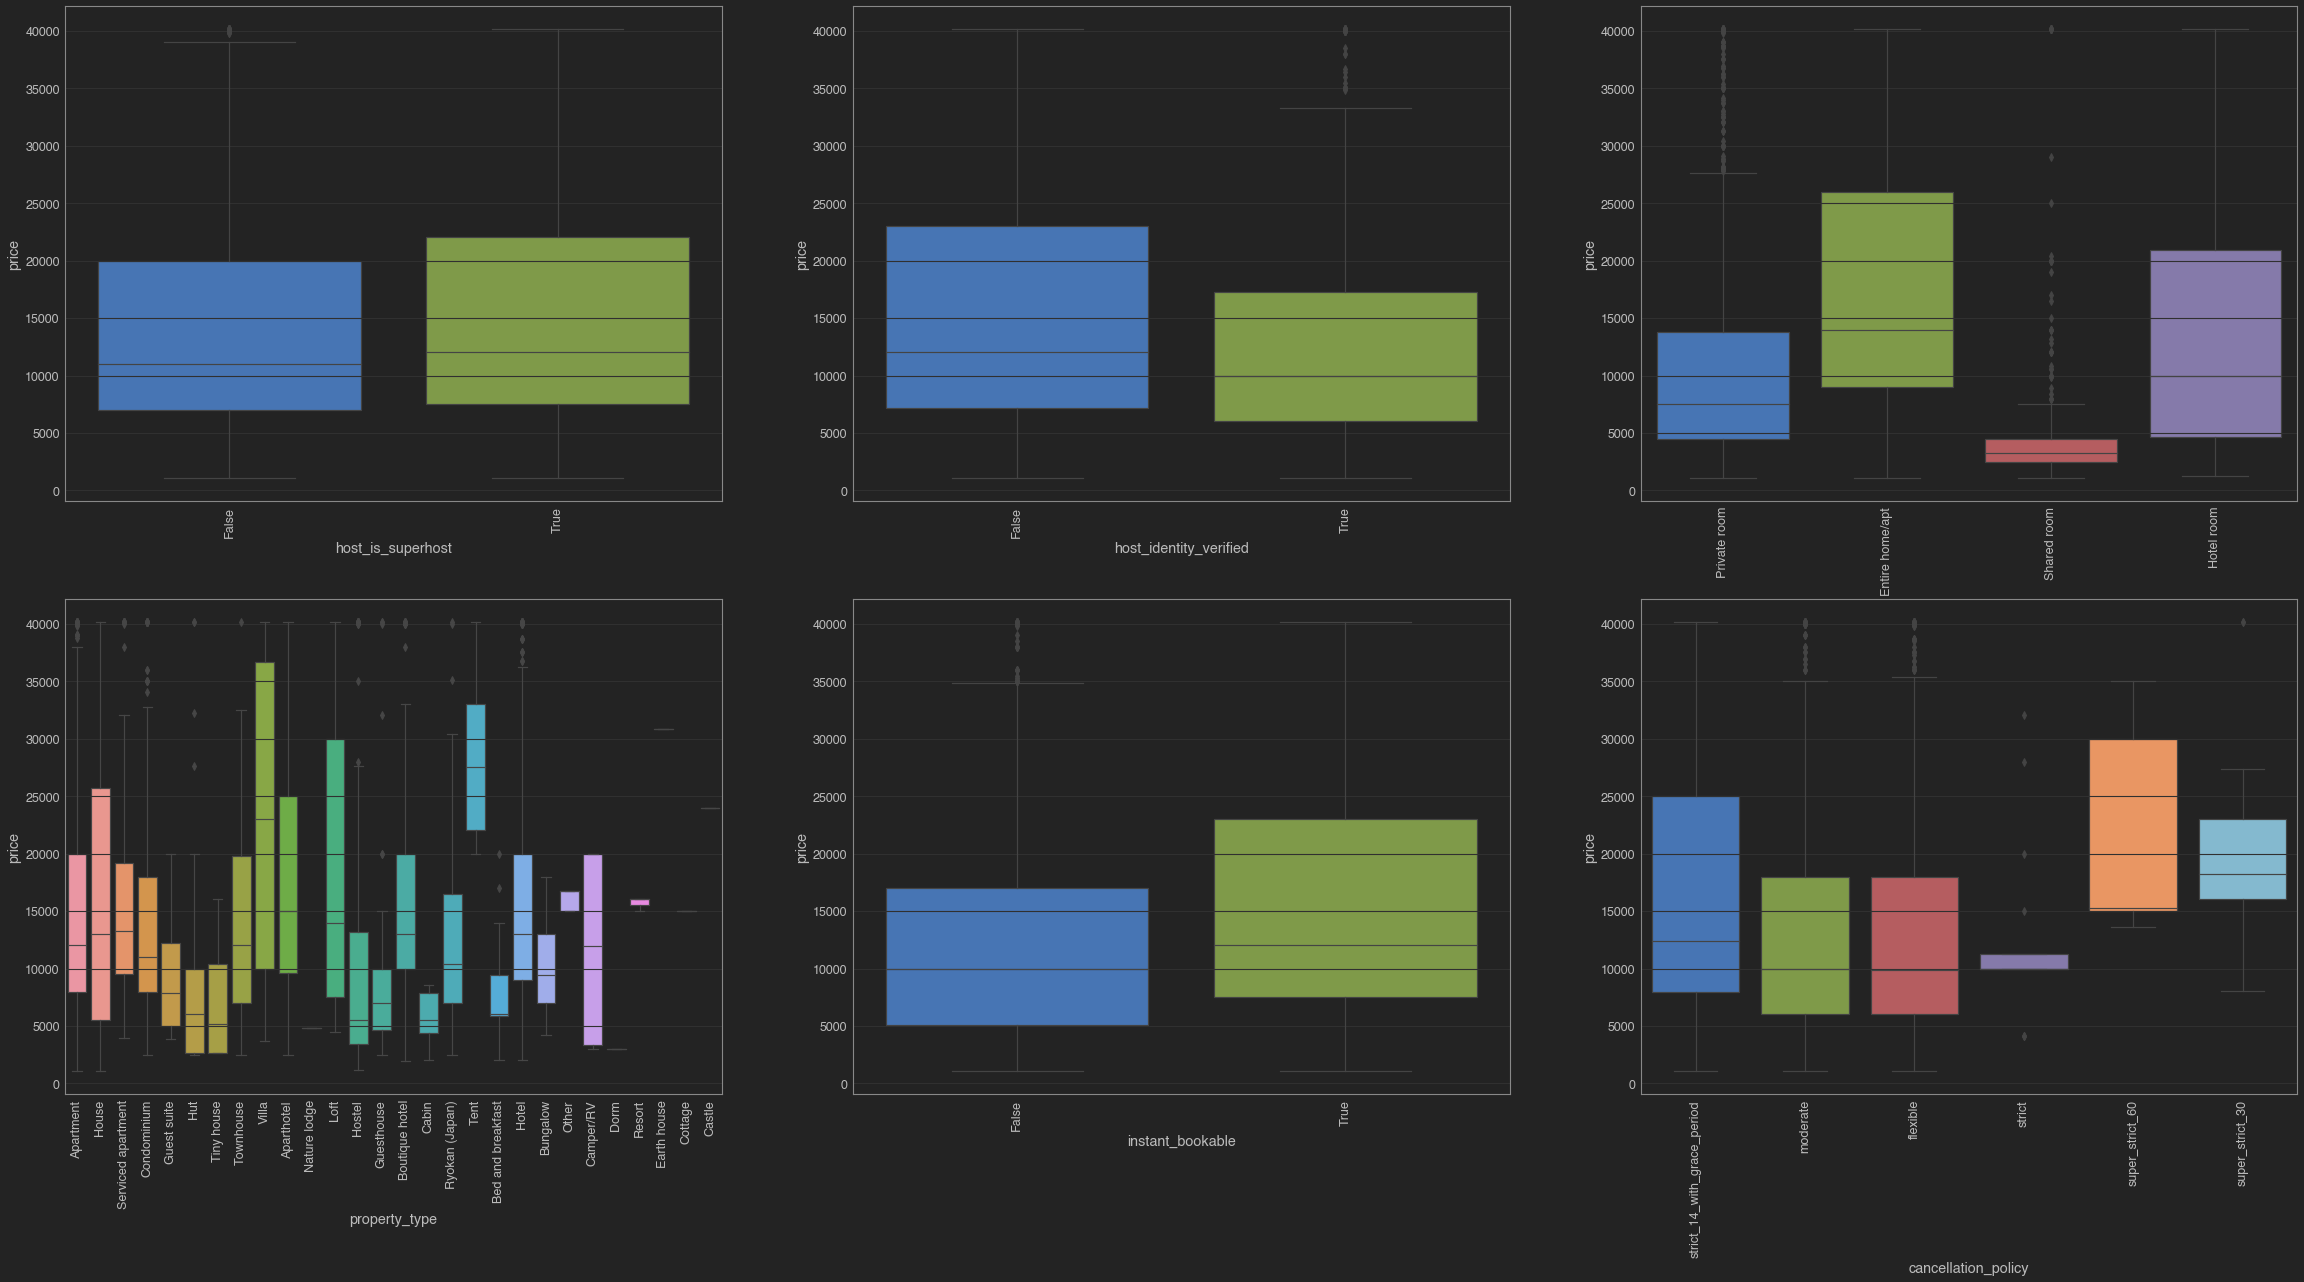

In [61]:
fig, ax = plt.subplots(2, 3, figsize=(40,20))
for var, subplot in zip(['host_is_superhost','host_identity_verified','room_type','property_type','instant_bookable','cancellation_policy'], ax.flatten()):
    sns.boxplot(x=var, y='price', data=airbnb, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        
plt.savefig('CategoricalvsPrice.png')

# HOST IS SUPERHOST VS PRICE

In [86]:
airbnb['host_is_superhost'].value_counts()

f    8322
t    4278
Name: host_is_superhost, dtype: int64

In [87]:
airbnb.pivot_table(index='host_is_superhost', values='price', aggfunc=['min','max','mean','sum'])

min        max          mean          sum
                    price      price         price        price
host_is_superhost                                              
f                  1075.0  1000040.0  28799.130618  239666365.0
t                  1075.0   999962.0  22083.229547   94472056.0

# HOST IDENTITY VERIFIED VS PRICE

In [89]:
airbnb['host_identity_verified'].value_counts()

f    10252
t     2348
Name: host_identity_verified, dtype: int64

In [90]:
airbnb.pivot_table(index='host_identity_verified', values='price', aggfunc=['min','max','mean','sum'])

min        max          mean          sum
                         price      price         price        price
host_identity_verified                                              
f                       1075.0  1000040.0  28132.269801  288412030.0
t                       1075.0   999962.0  19474.612862   45726391.0

# HOST_NAME VS PRICE

In [92]:
airbnb['host_id'].value_counts()

258668827    91
75820284     81
73463626     65
261951920    64
29966538     48
71735650     48
279064316    46
38309930     46
232445532    45
48474638     43
229627088    42
334842895    41
159375498    41
185778164    41
232836811    39
42244167     38
30324135     36
55852804     36
229635334    36
79948554     36
228133407    35
317892759    35
332234181    32
143096922    31
44066901     31
245521119    31
141952115    30
198552582    29
315473178    29
256531617    29
46668906     29
63598456     28
183877565    28
38047329     28
62915585     28
16188418     28
35258613     28
332233977    27
176875986    27
71920606     26
57212118     26
4838043      26
271201733    25
259697958    25
220149769    25
223093998    24
41013044     24
178158779    23
218190604    23
206592370    23
232659832    23
226274900    22
26107414     22
147140466    22
128821251    22
131748110    22
202883274    22
253559407    22
141635738    22
115432704    22
308625454    22
212333651    21
39314421

In [93]:
airbnb.pivot_table(index='host_id', values='price', aggfunc=['min','max','mean','sum']).T

host_id        151977     341577      771694     918551     961324     \
min  price   4192.000000     3977.0   19565.000    13007.0     3450.0   
max  price  10750.000000     4192.0   19887.000    13007.0     3450.0   
mean price   7596.333333     4084.5   19713.625    13007.0     3450.0   
sum  price  22789.000000     8169.0  157709.000    26014.0     3450.0   

host_id     964081     1111228    1160146    1174369    1196132    1258947    \
min  price    10965.0    15050.0     3977.0     5052.0    19350.0     8062.0   
max  price    10965.0    15050.0     6987.0     5052.0    19350.0     9675.0   
mean price    10965.0    15050.0     5353.2     5052.0    19350.0     8868.5   
sum  price    10965.0    30100.0    26766.0    10104.0    19350.0    17737.0   

host_id     1295685    1306308       1517461       1573631    1932364    \
min  price    25047.0     9460.0   3010.000000   6987.000000     5391.0   
max  price    35045.0     9997.0   3977.000000   7955.000000     5391.0   
mean price    29046.2     9728.5   3511.333333   7316.666667     5391.0   
sum  price   145231.0    19457.0  10534.000000  21950.000000     5391.0   

host_id     2008948    2931434    3078284       3145185       3268251    \
min  price     4313.0     7332.0    19995.0   4192.000000  19457.000000   
max  price     4313.0     7332.0    19995.0   5052.000000  25047.000000   
mean price     4313.0     7332.0    19995.0   4478.666667  23183.666667   
sum  price     4313.0     7332.0    19995.0  13436.000000  69551.000000   

host_id     3667176        4267866    4626879    4799233        4838043    \
min  price    18490.0   59948.000000    11502.0     3977.0    3762.000000   
max  price    27950.0   59985.000000    38485.0     5160.0    6901.000000   
mean price    23220.0   59976.777778    21374.0     4568.5    5196.615385   
sum  price    46440.0  539791.000000   256488.0     9137.0  135112.000000   

host_id     4839990        4847803    4981880    5068769    5221876    \
min  price     5482.0    8062.000000    26660.0    10351.0    29992.0   
max  price     5482.0   16125.000000    26660.0    10351.0    29992.0   
mean price     5482.0   13310.363636    26660.0    10351.0    29992.0   
sum  price     5482.0  146414.000000    26660.0    10351.0    29992.0   

host_id     5596383    5658575    5660134    5686404    5710367    5749679    \
min  price     6987.0    18597.0     7955.0     3547.0    25047.0     7740.0   
max  price     6987.0    18597.0     7955.0     3547.0    25047.0     8492.0   
mean price     6987.0    18597.0     7955.0     3547.0    25047.0     8116.0   
sum  price     6987.0    18597.0     7955.0     3547.0    25047.0    16232.0   

host_id     5766088    5961814    5962750       6018145    6123893    \
min  price    19995.0     5499.0     5052.0   8600.000000     3019.0   
max  price    19995.0     5499.0     5052.0  12577.000000     3019.0   
mean price    19995.0     5499.0     5052.0  10642.333333     3019.0   
sum  price    19995.0     5499.0     5052.0  31927.000000     3019.0   

host_id        6378336    6504053    6606987    6648140    6648611    \
min  price  9.997500e+04    7955.00     5482.0   250037.0     3010.0   
max  price  3.000320e+05   19995.00    13007.0   499981.0     3977.0   
mean price  1.770286e+05   12496.75     9244.5   390004.4     3493.5   
sum  price  3.009486e+06   49987.00    18489.0  1950022.0     6987.0   

host_id        6728807    6809418    6969809    7032277    7103955    \
min  price   7955.000000    32035.0    10965.0    23972.0    25047.0   
max  price  10535.000000    32035.0    19027.0    27950.0    27950.0   
mean price   8653.666667    32035.0    14996.0    25961.0    26498.5   
sum  price  51922.000000    32035.0    29992.0    51922.0    52997.0   

host_id     7212968    7231005    7293516    7537357        7740848    \
min  price     4300.0     9997.0    19995.0     2150.0   12040.000000   
max  price     5375.0     9997.0    19995.0     3225.0   48052.000000   
mean price     4837.5     

# NEIGHBOURHOOD vs PRICE

In [94]:
airbnb.pivot_table(index='neighbourhood_cleansed', values='price', aggfunc=['min','max','mean','sum']).T

neighbourhood_cleansed     Adachi Ku  Akiruno Shi  Akishima Shi    Arakawa Ku  \
min  price              1.075000e+03     3977.000        3870.0  1.720000e+03   
max  price              1.099720e+05    12040.000        3870.0  9.999620e+05   
mean price              7.722114e+03     5570.125        3870.0  3.301422e+04   
sum  price              1.420869e+06    44561.000        7740.0  1.119182e+07   

neighbourhood_cleansed     Bunkyo Ku    Chiyoda Ku  Chofu Shi       Chuo Ku  \
min  price              1.505000e+03  2.042000e+03   3989.000  1.182000e+03   
max  price              1.050270e+05  8.999870e+05  19995.000  9.997500e+04   
mean price              2.606450e+04  5.051219e+04   7790.625  4.036847e+04   
sum  price              3.675095e+06  1.050654e+07  62325.000  2.099160e+07   

neighbourhood_cleansed    Edogawa Ku     Fuchu Shi  Fussa Shi  Hachijo Machi  \
min  price              1.182000e+03   3774.000000     3235.0    3977.000000   
max  price              8.999870e+05  49987.000000     3450.0   16017.000000   
mean price              3.107349e+04  13675.833333     3375.0   10015.166667   
sum  price              6.245771e+06  82055.000000    10125.0   60091.000000   

neighbourhood_cleansed  Hachioji Shi    Hamura Shi  Higashikurume Shi  \
min  price              2.042000e+03   6038.000000        3450.000000   
max  price              8.999870e+05   6987.000000        3977.000000   
mean price              1.749496e+05   6670.666667        3801.333333   
sum  price              7.522831e+06  20012.000000       11404.000000   

neighbourhood_cleansed  Higashimurayama Shi  Higashiyamato Shi       Hino Shi  \
min  price                      3235.000000             3019.0    1827.000000   
max  price                     12040.000000             3019.0   29974.000000   
mean price                      6893.076923             3019.0    5214.692308   
sum  price                     89610.000000             3019.0  135582.000000   

neighbourhood_cleansed  Hinohara Mura  Inagi Shi   Itabashi Ku  Katsushika Ku  \
min  price                     3977.0     1617.0  1.182000e+03   1.075000e+03   
max  price                    33002.0     1833.0  3.000320e+05   4.999810e+05   
mean price                    18385.4     1725.0  2.542804e+04   2.918857e+04   
sum  price                    91927.0     3450.0  6.890998e+06   8.552252e+06   

neighbourhood_cleansed       Kita Ku  Kodaira Shi  Koganei Shi  Kokubunji Shi  \
min  price              1.075000e+03       3127.0       4528.0    2049.000000   
max  price              1.499620e+05      50029.0       9997.0   11968.000000   
mean price              1.409129e+04      10387.3       7681.0    4913.153846   
sum  price              4.297843e+06     103873.0      23043.0   63871.000000   

neighbourhood_cleansed      Komae Shi       Koto Ku  Kunitachi Shi  \
min  price                3019.000000  1.827000e+03    2472.000000   
max  price               26445.000000  2.000080e+05    4960.000000   
mean price               11962.666667  1.369078e+04    3494.888889   
sum  price              107664.000000  2.587557e+06   31454.000000   

neighbourhood_cleansed   Machida Shi      Meguro Ku     Minato Ku  \
min  price              1.182000e+03    3010.000000  2.472000e+03   
max  price              9.999620e+05   29992.000000  3.921590e+05   
mean price              4.150619e+04   12695.327586  2.382294e+04   
sum  price              1.120667e+06  736329.000000  1.052974e+07   

neighbourhood_cleansed     Mitaka Shi  Miyake Mura  Musashimurayama Shi  \
min  price                3332.000000       9997.0              1509.00   
max  price               29992.000000      19995.0              3666.00   
mean price               12345.454545      14996.0              2801.25   
sum  price              135800.000000      29992.0             11205.00   

neighbourhood_cleansed  Musashino Shi     Nakano Ku      Nerima Ku  \
min  price                4097.000000  1.505000e+03    1182.000000   


# PROPERTY TYPE vs PRICE

In [95]:
airbnb['property_type'].value_counts()

Apartment             7489
House                 2159
Hostel                 931
Hotel                  554
Condominium            372
Aparthotel             220
Boutique hotel         180
Villa                  141
Ryokan (Japan)         141
Serviced apartment     140
Hut                     45
Guesthouse              39
Loft                    37
Bed and breakfast       37
Townhouse               33
Guest suite             19
Tiny house              17
Other                   14
Cabin                    8
Bungalow                 5
Tent                     5
Camper/RV                5
Resort                   3
Nature lodge             2
Dorm                     1
Cottage                  1
Castle                   1
Earth house              1
Name: property_type, dtype: int64

In [96]:
airbnb.pivot_table(index='property_type', values='price', aggfunc=['min','max','mean','sum'])

min        max           mean          sum
                      price      price          price        price
property_type                                                     
Aparthotel           2472.0   666713.0   23152.222727    5093489.0
Apartment            1075.0   999962.0   28618.025905  214320396.0
Bed and breakfast    2042.0    19995.0    7690.162162     284536.0
Boutique hotel       1935.0   300032.0   19126.122222    3442702.0
Bungalow             4192.0    17952.0   10319.600000      51598.0
Cabin                2042.0     8600.0    5751.000000      46008.0
Camper/RV            3010.0    19995.0   11650.400000      58252.0
Castle              23972.0    23972.0   23972.000000      23972.0
Condominium          2472.0   240047.0   18427.413978    6854998.0
Cottage             15050.0    15050.0   15050.000000      15050.0
Dorm                 3019.0     3019.0    3019.000000       3019.0
Earth house         30852.0    30852.0   30852.000000      30852.0
Guest suite          3870.0    19995.0    8745.052632     166156.0
Guesthouse           2472.0    49987.0   10627.153846     414459.0
Hostel               1182.0   161250.0   12545.196563   11679578.0
Hotel                2042.0   999962.0   23019.010830   12752532.0
House                1075.0   899987.0   24424.567392   52732641.0
Hut                  2472.0    49987.0    9444.444444     425000.0
Loft                 4515.0    99975.0   20875.351351     772388.0
Nature lodge         4852.0     4852.0    4852.000000       9704.0
Other               15050.0    16770.0   16032.857143     224460.0
Resort              15050.0    16017.0   15694.666667      47084.0
Ryokan (Japan)       2472.0    45042.0   12348.744681    1741173.0
Serviced apartment   3977.0  1000040.0   48418.885714    6778644.0
Tent                19995.0    79980.0   36506.800000     182534.0
Tiny house           2687.0    16017.0    7307.588235     124229.0
Townhouse            2480.0    40850.0   14610.575758     482149.0
Villa                3655.0   899987.0  109083.815603   15380818.0

# ROOM TYPE vs PRICE

In [97]:
airbnb['room_type'].value_counts()

Entire home/apt    8781
Private room       2641
Hotel room          633
Shared room         545
Name: room_type, dtype: int64

In [98]:
airbnb.pivot_table(index='room_type', values='price', aggfunc=['min','max','mean','sum'])

min        max          mean          sum
                  price      price         price        price
room_type                                                    
Entire home/apt  1075.0  1000040.0  32475.698212  285169106.0
Hotel room       1290.0   899987.0  19847.216430   12563288.0
Private room     1075.0   999962.0  12552.201439   33150364.0
Shared room      1075.0   128032.0   5973.693578    3255663.0

# INSTANT BOOKABLE VS PRICE

In [99]:
airbnb['instant_bookable'].value_counts()

t    10084
f     2516
Name: instant_bookable, dtype: int64

In [100]:
airbnb.pivot_table(index='instant_bookable', values='price', aggfunc=['min','max','mean','sum'])

min        max          mean          sum
                   price      price         price        price
instant_bookable                                              
f                 1075.0   750025.0  14858.678458   37384435.0
t                 1075.0  1000040.0  29428.201706  296753986.0

# CANCELLATION POLICY VS PRICE

In [101]:
airbnb['cancellation_policy'].value_counts()

strict_14_with_grace_period    8308
moderate                       2572
flexible                       1678
strict                           16
super_strict_60                  14
super_strict_30                  12
Name: cancellation_policy, dtype: int64

In [102]:
airbnb.pivot_table(index='cancellation_policy', values='price', aggfunc=['min','max','mean','sum'])

min        max          mean          sum
                               price      price         price        price
cancellation_policy                                                       
flexible                      1075.0   999962.0  18367.075089   30819952.0
moderate                      1075.0  1000040.0  16733.182737   43037746.0
strict                        4097.0    32035.0  12330.875000     197294.0
strict_14_with_grace_period   1075.0   999962.0  31236.598219  259513658.0
super_strict_30               8062.0    48160.0  22216.416667     266597.0
super_strict_60              13652.0    35045.0  21655.285714     303174.0

# BIVARIATE NUMERICAL

In [103]:
airbnb[numerical_feature].skew(axis = 0, skipna = True) # menggunakan skewness untuk melihat data terdistribusi normal/tidak

host_id                 -0.069634
reviews_per_month        3.268446
review_scores_rating    -3.059085
availability_365         0.279219
guests_included          2.723961
beds                     6.025617
bedrooms                14.521297
accommodates             1.623815
longitude                4.837166
latitude               -43.139002
host_acceptance_rate    -5.292959
host_response_rate      -5.927533
price                    9.955357
security_deposit        11.483211
cleaning_fee             2.686769
extra_people             3.962313
dtype: float64

In [104]:
airbnb[numerical_feature].kurt(axis = 0, skipna = True)

host_id                   -1.283122
reviews_per_month         38.346885
review_scores_rating      17.403529
availability_365          -1.080939
guests_included           12.414123
beds                      80.668702
bedrooms                 393.597009
accommodates               2.676270
longitude                195.412886
latitude                2275.789811
host_acceptance_rate      35.983108
host_response_rate        42.315746
price                    116.182029
security_deposit         172.308154
cleaning_fee              18.200556
extra_people              53.892832
dtype: float64

In [107]:
airbnb[numerical_feature].skew(axis = 0, skipna = True) # menggunakan skewness untuk melihat data terdistribusi normal/tidak

host_id                -0.069634
reviews_per_month       0.629865
review_scores_rating   -0.710126
availability_365        0.279219
guests_included         1.177980
beds                    0.776246
bedrooms                1.103393
accommodates            1.623815
longitude              -0.163233
latitude               -0.295669
host_acceptance_rate   -1.112726
host_response_rate     -1.651592
price                   0.970908
security_deposit        0.940266
cleaning_fee            0.593518
extra_people            0.662007
dtype: float64

In [108]:
airbnb[numerical_feature].columns

Index(['host_id', 'reviews_per_month', 'review_scores_rating',
       'availability_365', 'guests_included', 'beds', 'bedrooms',
       'accommodates', 'longitude', 'latitude', 'host_acceptance_rate',
       'host_response_rate', 'price', 'security_deposit', 'cleaning_fee',
       'extra_people'],
      dtype='object')

# HOST_ACCEPTANCE_RATE vs PRICE

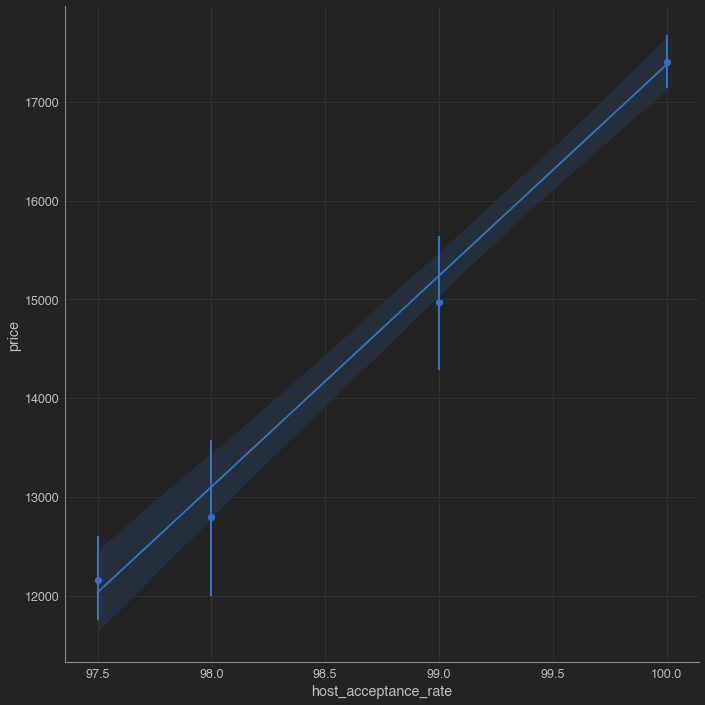

In [109]:
sns.lmplot(x="host_acceptance_rate", y="price", data=airbnb, x_estimator=np.mean,size=10);
plt.savefig('Host Acceptance vs Price.png');

In [110]:
airbnb.pivot_table(index='host_acceptance_rate', values='price', aggfunc=['min','max','mean','sum'])

min        max          mean           sum
                       price      price         price         price
host_acceptance_rate                                               
97.5                  1075.0  40178.875  12156.725996  2.715813e+07
98.0                  1509.0  40178.875  12795.010802  8.291167e+06
99.0                  1935.0  40178.875  14969.594115  1.666116e+07
100.0                 1075.0  40178.875  17403.603937  1.497580e+08

# ACCOMODATES VS PRICE

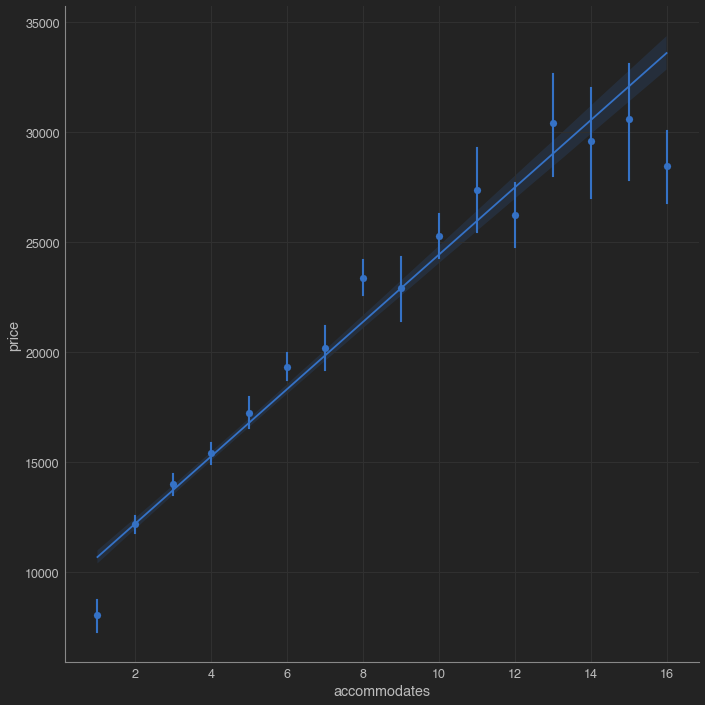

In [111]:
sns.lmplot(x="accommodates", y="price", data=airbnb, x_estimator=np.mean,size=10)
plt.savefig('Accomodates vs Price.png');

In [112]:
airbnb.pivot_table(index=['accommodates','year'], values='price', aggfunc=['min','max','mean','sum'])

min        max          mean           sum
                       price      price         price         price
accommodates year                                                  
1            2010   4192.000   4192.000   4192.000000  4.192000e+03
             2011   3010.000   3547.000   3278.500000  6.557000e+03
             2013   3332.000  10459.000   6623.333333  3.974000e+04
             2014   2042.000  40178.875   5464.172500  2.732086e+05
             2015   1612.000  40178.875   6165.114130  4.253929e+05
             2016   1075.000  40178.875   2849.221354  4.102879e+05
             2017   1505.000  16447.000   3736.218045  4.969170e+05
             2018   1290.000  40178.875   4585.055021  1.072903e+06
             2019   1720.000  40178.875  17457.888628  4.643798e+06
             2020   1505.000  40178.875   6345.598837  2.728608e+05
2            2010   7847.000   7847.000   7847.000000  7.847000e+03
             2011   3450.000  10965.000   6574.000000  4.601800e+04
             2012   4313.000   7008.000   6102.666667  1.830800e+04
             2013   1720.000  40178.875   9275.570565  5.750854e+05
             2014   1935.000  40178.875  10617.424000  1.327178e+06
             2015   1075.000  40178.875  10905.064346  5.169000e+06
             2016   1182.000  40178.875  11729.367666  4.597912e+06
             2017   1505.000  40178.875   9618.584538  3.328030e+06
             2018   1509.000  40178.875  10260.461552  7.038677e+06
             2019   1827.000  40178.875  13040.079708  9.141096e+06
             2020   2042.000  40178.875  21256.271704  6.610700e+06
3            2010  10750.000  10750.000  10750.000000  1.075000e+04
             2011   5912.000  25047.000  17756.647059  3.018630e+05
             2012   4192.000  18490.000   8707.250000  3.482900e+04
             2013   2480.000  40178.875  13075.898936  6.145672e+05
             2014   2580.000  40178.875   8304.601974  6.311498e+05
             2015   2042.000  40178.875  13487.536885  4.113699e+06
             2016   2042.000  40178.875  11417.667490  2.888670e+06
             2017   2365.000  40178.875  10691.016183  2.394788e+06
             2018   2042.000  40178.875  14293.899946  6.589488e+06
             2019   2257.000  40178.875  16476.646983  9.556455e+06
             2020   3010.000  40178.875  17355.213710  2.152046e+06
4            2011   8062.000   9675.000   8868.500000  1.773700e+04
             2012   5052.000  40178.875  32670.656250  3.920479e+05
             2013   3019.000  40178.875  13993.292969  4.477854e+05
             2014   1505.000  40178.875  13772.542614  1.211984e+06
             2015   1505.000  40178.875  12159.211754  3.258669e+06
             2016   1505.000  40178.875  15317.141129  3.798651e+06
             2017   2042.000  40178.875  13153.251298  3.801290e+06
             2018   2257.000  40178.875  14850.104079  7.098350e+06
             2019   2042.000  40178.875  18234.136116  1.004701e+07
             2020   3010.000  40178.875  18084.987864  1.862754e+06
5            2011   3977.000   4945.000   4622.333333  1.386700e+04
             2012  27950.000  27950.000  27950.000000  2.795000e+04
             2013   6450.000  40178.875  21048.255952  4.420134e+05
             2014   3450.000  40178.875  14715.880319  6.916464e+05
             2015   1505.000  40178.875  14677.725917  1.599872e+06
             2016   2042.000  40178.875  18348.040254  2.165069e+06
             2017   2472.000  39990.000  16877.803922  1.721536e+06
             2018   2588.000  40178.875  17229.051705  3.790391e+06
             2019   2042.000  40178.875  18460.100917  4.024302e+06
             2020   2687.000  40178.875  17609.205645  5.458854e+05
6            2011  19350.000  35045.000  29813.333333  8.944000e+04
             2012   7332.000   7332.000   7332.000000  7.332000e+03
             2013   9675.000  40178.875  21365.732143  4.486804e+05
             2014   4960.000  40178.875  18313.592500  9.156796e+05
             

In [113]:
airbnb[numerical_feature].columns

Index(['host_id', 'reviews_per_month', 'review_scores_rating',
       'availability_365', 'guests_included', 'beds', 'bedrooms',
       'accommodates', 'longitude', 'latitude', 'host_acceptance_rate',
       'host_response_rate', 'price', 'security_deposit', 'cleaning_fee',
       'extra_people'],
      dtype='object')

# REVIEWS PER MONTH VS PRICE

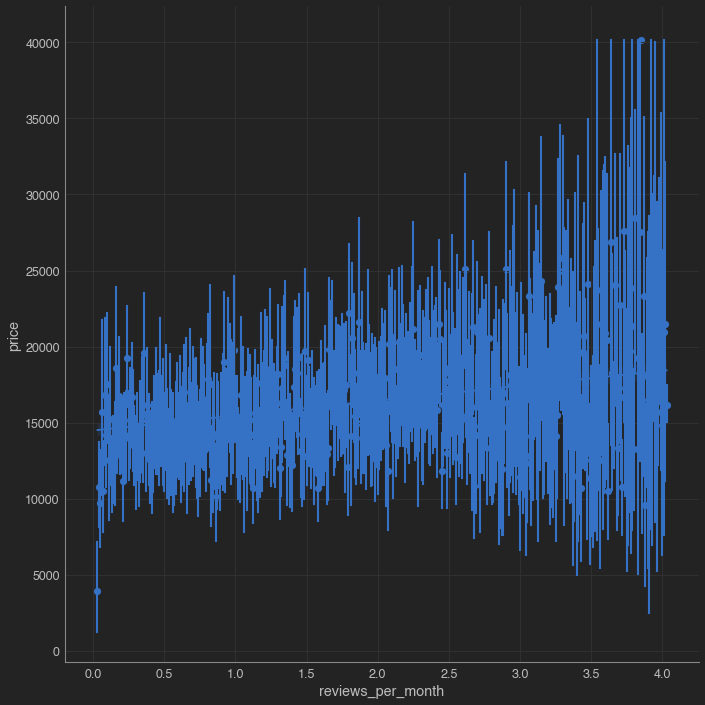

In [114]:
sns.lmplot(x='reviews_per_month', y="price", data=airbnb, x_estimator=np.mean,size=10);

In [115]:
airbnb.pivot_table(index=['reviews_per_month','year'], values='price', aggfunc=['min','max','mean','sum']).T

reviews_per_month     0.03             0.04                               \
year                  2015     2016    2014     2016      2017      2018   
min  price         10998.0  1186.00  3547.0  1075.00    3010.0    4515.0   
max  price         10998.0  5052.00  3547.0  1186.00   27520.0   16770.0   
mean price         10998.0  2205.25  3547.0  1104.25   15127.4   11814.0   
sum  price         10998.0  8821.00  7094.0  4417.00  151274.0  118140.0   

reviews_per_month     0.05                                                     \
year                  2014    2015         2016           2017           2018   
min  price          2365.0  7955.0  1075.000000    3010.000000    4515.000000   
max  price         27950.0  7955.0  3547.000000   26015.000000   32035.000000   
mean price         11889.4  7955.0  1596.333333    9452.733333   16140.142857   
sum  price         59447.0  7955.0  9578.000000  141791.000000  112981.000000   

reviews_per_month     0.06                                                \
year                  2013        2015       2016          2017     2018   
min  price          9352.0  19995.0000   1078.000   6987.000000   4515.0   
max  price         10351.0  40178.8750  40178.875  27520.000000  25047.0   
mean price          9851.5  30086.9375  16260.625  16984.666667  12598.8   
sum  price         19703.0  60173.8750  48781.875  50954.000000  62994.0   

reviews_per_month            0.07                                         \
year                 2019    2014          2015       2016          2017   
min  price         9030.0  3225.0   7955.000000   1186.000   3010.000000   
max  price         9030.0  5805.0  12040.000000  22037.000  10750.000000   
mean price         9030.0  4515.0   9316.666667   9759.375   5450.666667   
sum  price         9030.0  9030.0  27950.000000  78075.000  32704.000000   

reviews_per_month                                  0.08                       \
year                        2018     2019          2014    2015         2016   
min  price           3010.000000   5805.0   3117.000000  5912.0   1186.00000   
max  price          40178.875000   6987.0  40178.875000  5912.0  40178.87500   
mean price          15190.913462   6396.0  27824.916667  5912.0  14345.46875   
sum  price         197481.875000  12792.0  83474.750000  5912.0  57381.87500   

reviews_per_month                                            0.09  \
year                  2017           2018           2019     2013   
min  price          3010.0    6038.000000    9997.000000  15050.0   
max  price         13007.0   29992.000000   40178.875000  15050.0   
mean price          6055.5   13910.111111   28148.232143  15050.0   
sum  price         36333.0  125191.000000  197037.625000  15050.0   

reviews_per_month                                                          \
year                        2015          2016           2017        2018   
min  price           2042.000000   1182.000000    3010.000000    6020.000   
max  price          40178.875000  16447.000000   40178.875000   40178.875   
mean price          15158.319444   3595.888889   15861.170455   14656.625   
sum  price         136424.875000  32363.000000  174472.875000  161222.875   

reviews_per_month                    0.10                               \
year                        2019     2013           2015          2016   
min  price           3450.000000   6450.0    1935.000000   1075.000000   
max  price          40178.875000  17952.0   40178.875000  12040.000000   
mean price          23010.517857  12201.0   32538.482143   3691.888889   
sum  price         161073.625000  24402.0  227769.375000  33227.000000   

reviews_per_month                                                  0.11  \
year                       2017          2018           2019       2014   
min  price          3547.000000    5805.00000    3977.000000   3547.000   
max  price         18006.000000   40178.87500   40178.875000  40178.875   
mean price         12815.285714   2211

# BEDROOMS VS PRICE

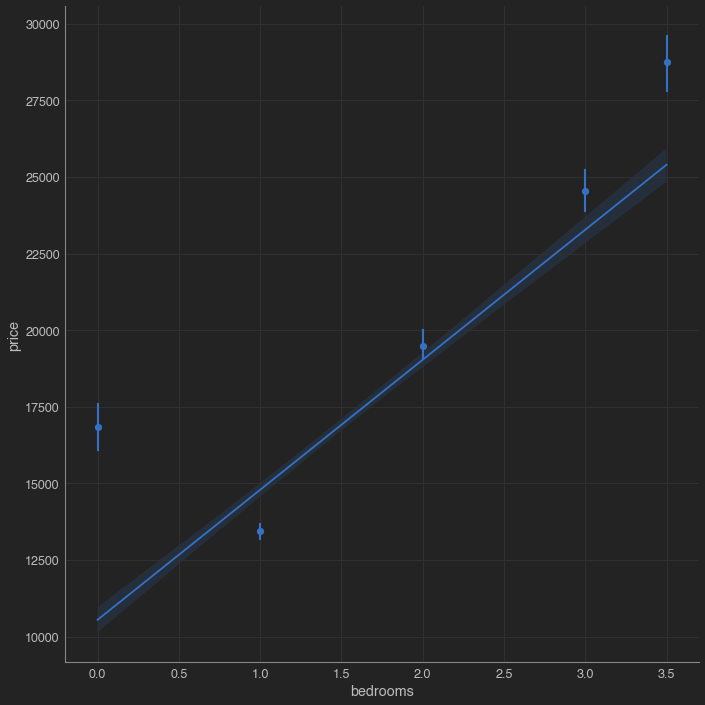

In [116]:
sns.lmplot(x="bedrooms", y="price", data=airbnb, x_estimator=np.mean,size=10);
plt.savefig('Bedrooms vs Price.png')

In [117]:
airbnb.pivot_table(index=['bedrooms','year'], values='price', aggfunc=['min','max','mean','sum'])

min        max          mean           sum
                 price      price         price         price
bedrooms year                                                
0.0      2011  19672.0  25047.000  23703.250000  9.481300e+04
         2012   6987.0  27950.000  13553.400000  6.776700e+04
         2013   3762.0  15050.000   6407.131579  2.434710e+05
         2014   1935.0  40178.875  12752.438830  5.993646e+05
         2015   1182.0  40178.875  13478.318798  1.738703e+06
         2016   3547.0  40178.875  17170.251786  2.403835e+06
         2017   3977.0  40178.875  13210.749290  2.325092e+06
         2018   2472.0  40178.875  17312.232353  4.414619e+06
         2019   2795.0  40178.875  21283.550686  6.981005e+06
         2020   3010.0  40178.875  17586.681452  1.090374e+06
1.0      2010   4192.0  10750.000   7596.333333  2.278900e+04
         2011   3010.0  35045.000  12727.642857  3.563740e+05
         2012   4192.0  40178.875  26982.991667  4.047449e+05
         2013   1720.0  40178.875  12695.622899  1.510779e+06
         2014   2042.0  40178.875  10219.624621  3.372476e+06
         2015   1075.0  40178.875  12096.223279  1.335423e+07
         2016   1075.0  40178.875  11835.665681  1.251030e+07
         2017   1505.0  40178.875  10767.100731  1.031488e+07
         2018   1075.0  40178.875  12639.475471  2.479865e+07
         2019   1720.0  40178.875  15930.047858  3.366019e+07
         2020   1505.0  40178.875  18888.104318  1.038846e+07
2.0      2011   4945.0  19350.000  12147.500000  2.429500e+04
         2012   7955.0   7955.000   7955.000000  7.955000e+03
         2013   5912.0  40178.875  24477.611702  1.150448e+06
         2014   1505.0  40178.875  19145.439560  1.742235e+06
         2015   1935.0  40178.875  16127.696360  4.209329e+06
         2016   2049.0  40178.875  18964.633333  4.835982e+06
         2017   2588.0  40178.875  18405.388966  3.294565e+06
         2018   2372.0  40178.875  20179.301506  8.374410e+06
         2019   2472.0  40178.875  20637.692637  9.039309e+06
         2020   1505.0  40178.875  22168.324219  2.128159e+06
3.0      2013  13222.0  40178.875  26431.593750  4.229055e+05
         2014   6020.0  40178.875  26780.117647  1.365786e+06
         2015   3977.0  40178.875  22503.080882  2.677867e+06
         2016   3332.0  40178.875  24318.701858  3.599168e+06
         2017   3450.0  40178.875  23119.462264  2.450663e+06
         2018   1397.0  40178.875  25787.495490  5.002774e+06
         2019   4300.0  40178.875  24664.813514  4.562990e+06
         2020   3019.0  40178.875  25102.892857  1.054322e+06
3.5      2012  19457.0  25047.000  23183.666667  6.955100e+04
         2013  17845.0  40178.875  33752.875000  4.387874e+05
         2014   1720.0  40178.875  26226.452703  9.703788e+05
         2015   3977.0  40178.875  25366.577744  2.080059e+06
         2016   5052.0  40178.875  29443.903947  2.797171e+06
         2017   3010.0  40178.875  25169.540909  1.384325e+06
         2018   3010.0  40178.875  32274.426471  3.840657e+06
         2019   7847.0  40178.875  28471.585396  2.875630e+06
         2020   3977.0  40178.875  31377.865385  8.158245e+05

# BEDS VS PRICE

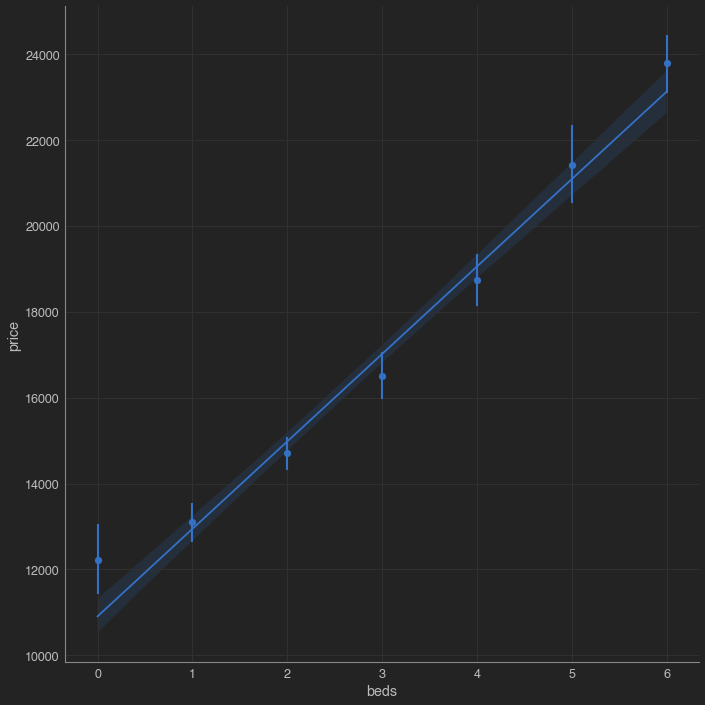

In [118]:
sns.lmplot(x="beds", y="price", data=airbnb, x_estimator=np.mean,size=10);
plt.savefig('Beds vs Price.png');

In [119]:
airbnb.pivot_table(index=['beds','year'], values='price', aggfunc=['min','max','mean','sum'])

min        max          mean           sum
             price      price         price         price
beds year                                                
0.0  2012   5391.0  19995.000  12693.000000  2.538600e+04
     2013   2687.0   6020.000   4634.111111  4.170700e+04
     2014   2480.0  39990.000   9425.187500  3.016060e+05
     2015   1397.0  40178.875  14620.823529  1.491324e+06
     2016   1075.0  40178.875   8823.088010  8.646626e+05
     2017   2480.0  35045.000  10746.145455  5.910380e+05
     2018   1182.0  40178.875  11928.588362  1.383716e+06
     2019   2795.0  40178.875  13643.526786  1.910094e+06
     2020   3010.0  40178.875  15404.540816  7.548225e+05
1.0  2010   4192.0   7847.000   6019.500000  1.203900e+04
     2011   3010.0  19780.000   6579.700000  6.579700e+04
     2012   4192.0  27950.000   9107.000000  5.464200e+04
     2013   1720.0  40178.875  10234.330357  5.731225e+05
     2014   1935.0  40178.875  10545.819182  1.676785e+06
     2015   1182.0  40178.875  12974.203363  5.111836e+06
     2016   1075.0  40178.875  11676.391765  4.962466e+06
     2017   1505.0  40178.875   9090.585961  3.027165e+06
     2018   1290.0  40178.875   9907.114043  8.024762e+06
     2019   1827.0  40178.875  17116.147256  1.528472e+07
     2020   1505.0  40178.875  19338.472584  5.202049e+06
2.0  2010  10750.0  10750.000  10750.000000  1.075000e+04
     2011   3977.0  19887.000  15603.214286  2.184450e+05
     2012   5052.0  40178.875  34056.079545  3.746169e+05
     2013   2150.0  40178.875  13818.851786  9.673196e+05
     2014   2049.0  40178.875  11875.836667  1.781376e+06
     2015   1075.0  40178.875  11611.342967  6.026287e+06
     2016   1075.0  40178.875  13890.177714  6.653395e+06
     2017   1505.0  40178.875  11111.859611  5.144791e+06
     2018   1509.0  40178.875  15379.942635  1.310371e+07
     2019   1720.0  40178.875  16951.550972  1.700241e+07
     2020   2472.0  40178.875  19416.582979  4.562897e+06
3.0  2011   3977.0  25047.000  16812.600000  8.406300e+04
     2012   7332.0  18490.000  12911.000000  2.582200e+04
     2013   2480.0  40178.875  15581.048387  4.830125e+05
     2014   2580.0  40178.875  16474.087500  9.884452e+05
     2015   2687.0  40178.875  14286.710470  3.343090e+06
     2016   2042.0  40178.875  15991.838201  3.422253e+06
     2017   2480.0  40178.875  14719.994213  3.179519e+06
     2018   1075.0  40178.875  17779.174552  6.951657e+06
     2019   2257.0  40178.875  16975.044851  7.995246e+06
     2020   2687.0  40178.875  19856.214096  1.866484e+06
4.0  2011   8062.0   9675.000   8868.500000  1.773700e+04
     2012  25047.0  25047.000  25047.000000  2.504700e+04
     2013   3019.0  40178.875  24816.681818  8.189505e+05
     2014   1505.0  40178.875  16767.468750  8.719084e+05
     2015   1612.0  40178.875  15610.696970  2.575765e+06
     2016   1505.0  40178.875  18362.219675  3.103215e+06
     2017   1827.0  40178.875  17091.318528  3.366990e+06
     2018   2257.0  40178.875  18068.955383  6.125376e+06
     2019   2042.0  40178.875  21598.137341  6.781815e+06
     2020   5052.0  40178.875  22240.656250  1.067552e+06
5.0  2011  19350.0  19350.000  19350.000000  1.935000e+04
     2012  19457.0  19457.000  19457.000000  1.945700e+04
     2013  12577.0  40178.875  27582.037500  2.758204e+05
     2014   3870.0  40178.875  18032.286290  5.590009e+05
     2015   1935.0  40178.875  18072.313187  1.644580e+06
     2016   2049.0  40178.875  20338.263889  2.013488e+06
     2017   2472.0  40178.875  22024.276786  1.541699e+06
     2018   5052.0  40178.875  23662.938433  3.170834e+06
     2019   2472.0  40178.875  21614.443376  2.528890e+06
     2020   7955.0  40178.875  25159.350962  6.541431e+05
6.0  2011  35045.0  35045.000  35045.000000  7.009000e+04
     2012  25047.0  25047.000  25047.000000  2.504700e+04
     2013   3977.0  40178.875  25269.093750  6.064582e+05
     2014   1720.0  40178.875  25987.767361  1.871119e+06
     2015   1505.0  40178.875  20354.239474  3.867306e+06
     2016   2

# GUEST INCLUDED VS PRICE

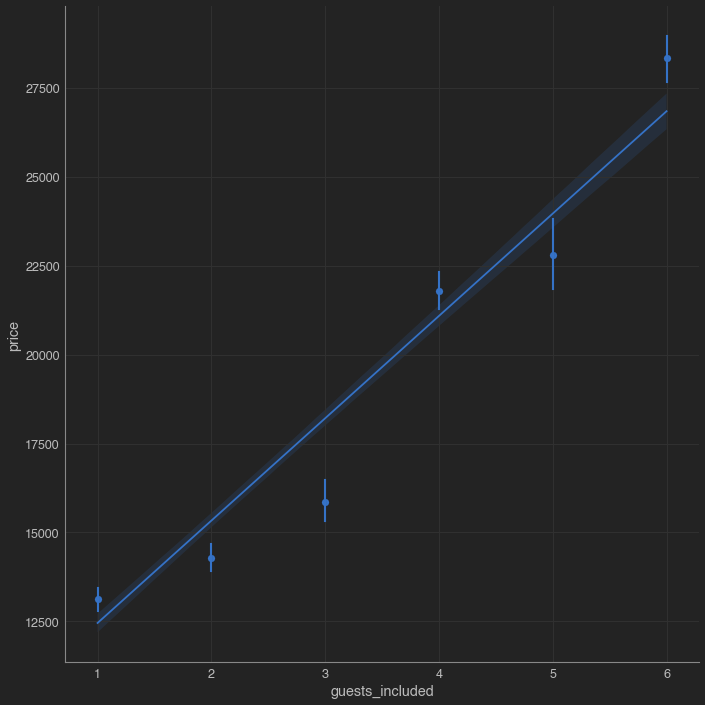

In [120]:
sns.lmplot(x="guests_included", y="price", data=airbnb, x_estimator=np.mean,size=10);
plt.savefig('Guest Included vs Price.png')

In [121]:
airbnb.pivot_table(index=['guests_included','year'], values='price', aggfunc=['min','max','mean','sum'])

min        max          mean           sum
                        price      price         price         price
guests_included year                                                
1.0             2010   4192.0  10750.000   7596.333333  2.278900e+04
                2011   3010.0  19887.000  11192.000000  2.126480e+05
                2012   4192.0  40178.875  23656.743750  4.731349e+05
                2013   1720.0  40178.875  10634.592437  1.265516e+06
                2014   1505.0  40178.875   9378.311765  2.391470e+06
                2015   1075.0  40178.875  10534.954200  6.584346e+06
                2016   1075.0  40178.875   8696.010757  5.052382e+06
                2017   1505.0  40178.875  10222.075599  6.828346e+06
                2018   1182.0  40178.875  12193.683529  1.554695e+07
                2019   1720.0  40178.875  16126.043411  2.465672e+07
                2020   1505.0  40178.875  20522.290856  1.054846e+07
2.0             2011   4945.0  15050.000  11273.875000  9.019100e+04
                2012   7332.0   7332.000   7332.000000  7.332000e+03
                2013   2480.0  40178.875  14970.242021  7.036014e+05
                2014   3440.0  40178.875  12931.703629  1.603531e+06
                2015   2049.0  40178.875  14476.628565  8.628071e+06
                2016   3010.0  40178.875  15080.909363  8.173853e+06
                2017   1505.0  40178.875  12201.581841  4.770818e+06
                2018   2150.0  40178.875  12875.881276  9.232007e+06
                2019   2257.0  40178.875  15570.266312  1.097704e+07
                2020   3010.0  40178.875  18185.983844  2.673340e+06
3.0             2011   8062.0  25047.000  20800.750000  8.320300e+04
                2012  25047.0  25047.000  25047.000000  2.504700e+04
                2013   5160.0  32465.000  15234.095238  3.199160e+05
                2014   3010.0  40178.875  18219.011792  9.656076e+05
                2015   3010.0  40178.875  13018.229651  1.679352e+06
                2016   2049.0  40178.875  18237.499132  2.626200e+06
                2017   2588.0  40178.875  13460.815367  1.467229e+06
                2018   1075.0  40178.875  17016.934896  4.084064e+06
                2019   5052.0  40178.875  14892.754425  3.365762e+06
                2020   3450.0  40178.875  19227.549107  5.383714e+05
4.0             2011  19350.0  19350.000  19350.000000  1.935000e+04
                2012  19457.0  25047.000  22252.000000  4.450400e+04
                2013   5052.0  40178.875  21539.383333  3.230908e+05
                2014   3870.0  40178.875  21468.740741  1.159312e+06
                2015   3977.0  40178.875  19127.090395  3.385495e+06
                2016   4300.0  40178.875  21138.004274  4.946293e+06
                2017   4300.0  40178.875  19387.927486  3.509215e+06
                2018   2372.0  40178.875  22449.626005  8.373710e+06
                2019   4622.0  40178.875  24241.483067  9.842042e+06
                2020   7525.0  40178.875  18551.195000  9.275598e+05
5.0             2013  25047.0  40178.875  34311.517857  2.401806e+05
                2014  13007.0  40178.875  23491.492188  3.758639e+05
                2015   1935.0  40178.875  18349.113176  1.357834e+06
                2016   2902.0  40178.875  24247.502500  1.212375e+06
                2017   3977.0  39990.000  22775.250000  1.184313e+06
                2018   7955.0  40178.875  22222.064655  1.933320e+06
                2019   9675.0  40178.875  25719.761628  2.211900e+06
                2020   6987.0  40178.875  20430.990385  2.656029e+05
6.0             2011  35045.0  35045.000  35045.000000  7.009000e+04
                2013  18597.0  40178.875  38086.895833  9.140855e+05
                2014   5052.0  40178.875  28786.226852  1.554456e+06
                2015   3977.0  40178.875  25798.833777  2.425090e+06
                2016   5052.0  40178.875  28717.715278  4.135351e+06
                2017   6987.0  40178.875  27528.835616  2.009605e+06
                2018   1

# REVIEW SCORES RATING

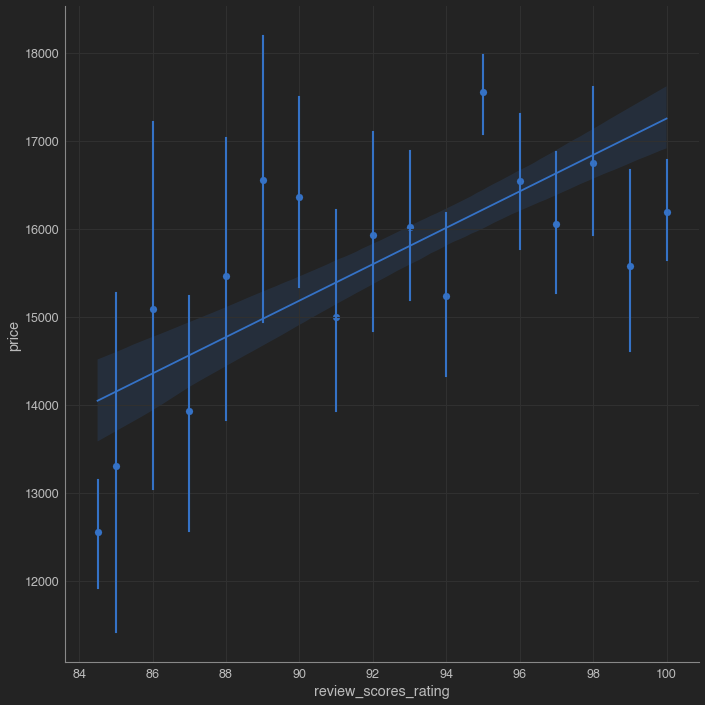

In [122]:
sns.lmplot(x="review_scores_rating", y="price", data=airbnb, x_estimator=np.mean,size=10);
plt.savefig('Review Scores Rating vs Price.png')

In [123]:
airbnb.pivot_table(index=['review_scores_rating','year'], values='price', aggfunc=['min','max','mean','sum'])

min        max          mean           sum
                             price      price         price         price
review_scores_rating year                                                
84.5                 2013   3762.0  40178.875  18617.045455  2.047875e+05
                     2014   2042.0  40178.875  10548.036585  4.324695e+05
                     2015   1182.0  40178.875  10344.013281  1.655042e+06
                     2016   1075.0  40178.875  14445.930458  2.051322e+06
                     2017   3010.0  40178.875  13681.884259  1.477644e+06
                     2018   1397.0  40178.875  12231.130058  4.231971e+06
                     2019   1827.0  40178.875  12615.454435  3.910791e+06
                     2020   1505.0  40178.875  14304.970238  6.008088e+05
85.0                 2013   6038.0   6038.000   6038.000000  6.038000e+03
                     2014   3547.0  40178.875  21862.937500  4.372588e+04
                     2015   3547.0  35045.000   9205.821429  2.577630e+05
                     2016   1075.0  40178.875  11655.032609  2.680658e+05
                     2017   5052.0  28810.000  12699.066667  1.904860e+05
                     2018   1720.0  40178.875  15032.954268  6.163511e+05
                     2019   1827.0  40178.875  15825.378906  5.064121e+05
86.0                 2011   9675.0   9997.000   9836.000000  1.967200e+04
                     2013   6020.0   6987.000   6503.500000  1.300700e+04
                     2014   2257.0  40178.875  13543.267857  9.480288e+04
                     2015   1505.0  40178.875  11675.395000  2.918849e+05
                     2016   3010.0  40178.875  18793.358696  4.322472e+05
                     2017   6880.0  27950.000  14339.166667  2.581050e+05
                     2018   1827.0  40178.875  17097.004167  5.129101e+05
                     2019   2472.0  40178.875  14802.105769  3.848548e+05
87.0                 2013   3235.0  40178.875  14311.982143  1.001839e+05
                     2014   3547.0  16985.000   8584.571429  6.009200e+04
                     2015   1505.0  40178.875  13083.984375  4.186875e+05
                     2016   1075.0  40178.875  10326.913462  4.027496e+05
                     2017   1505.0  40178.875  14693.989583  5.289836e+05
                     2018   2472.0  40178.875  16012.503333  1.200938e+06
                     2019   1827.0  40178.875  14554.754167  8.732852e+05
                     2020   4407.0  19995.000  10190.800000  5.095400e+04
88.0                 2011   9460.0   9460.000   9460.000000  9.460000e+03
                     2013   3235.0  11502.000   6003.500000  3.602100e+04
                     2014   3010.0  40178.875  12424.656250  1.490959e+05
                     2015   1505.0  40178.875  14858.381944  5.349018e+05
                     2016   2795.0  40178.875  17972.367424  5.930881e+05
                     2017   3010.0  40178.875  14109.203947  2.680749e+05
                     2018   1720.0  40178.875  16038.990625  1.283119e+06
                     2019   1827.0  40178.875  15568.643617  7.317262e+05
                     2020   5267.0  40178.875  19484.291667  5.845288e+04
89.0                 2013   3010.0   3010.000   3010.000000  3.010000e+03
                     2014   2042.0  40178.875  16125.097222  2.902518e+05
                     2015   1833.0  40178.875  14557.032609  6.696235e+05
                     2016   1078.0  40178.875  18404.559211  6.993732e+05
                     2017   1509.0  40178.875  12090.298913  2.780769e+05
                     2018   2150.0  40178.875  17739.626603  1.383691e+06
                     2019   1827.0  40178.875  17604.276442  9.154224e+05
90.0                 2011   8062.0   8062.000   8062.000000  8.062000e+03
                     2013   2480.0  40178.875  11815.079545  1.299659e+05
                     2014   3010.0  35045.000  14062.000000  3.234260e+05
                     2015   1612.0  40178.875  13643.175725  9.413791e+05
                     2016   1075.0 

# MULTIVARIATE ANALYSIS

# Mendapatkan analisis data Airbnb yang legal berdasarkan aturan "Minpaku Law" mengenai maksimum hari dapat beroperasinya sebuah Airbnb pertahun.

In [52]:
airbnb_legal = airbnb[airbnb['availability_365']<=180]

In [53]:
airbnb_legal.shape[0]

7526

## Terdapat 7526 airbnb yang legal atau mematuhi peraturan terkait Minpaku Law tentang 180 hari beroperasinya sebuah Airbnb. Selanjutnya akan dilakukan analisis lebih dalam terkait Areanya, Neighbourhood, Room Type dan Spesifikasi lainnya.

In [127]:
latitude = airbnb_legal['latitude'].tolist()
longitude = airbnb_legal['longitude'].tolist()
locations = list(zip(latitude, longitude))
m = folium.Map([35.6812,139.7671],zoom_start=11,tiles='CartoDB dark_matter')
folium.Marker(location=[35.6812,139.7671],popup='<strong>Tokyo', tooltip='Click for more information',icon=folium.Icon(color='pink')).add_to(m)
folium.Marker(location=[35.6779, 139.7145],popup='<strong>Tokyo Olympic Stadium</strong><br>Sports: Athletics,Football', tooltip='Click for more information',icon=folium.Icon(color='blue')).add_to(m)
folium.Marker(location=[35.641014,139.792048],popup='<strong>Ariake Gymnastic Centre</strong><br>Sports: Gymnastic', tooltip='Click for more information',icon=folium.Icon(color='lightgray')).add_to(m)
folium.Marker(location=[35.651403, 139.815074],popup='<strong>Tokyo Aquatics Centre</strong><br>Sports: Swimming', tooltip='Click for more information',icon=folium.Icon(color='red')).add_to(m)
folium.Marker(location=[35.6933, 139.7499],popup='<strong>Nippon Budokan</strong><br>Sports: Karate', tooltip='Click for more information',icon=folium.Icon(color='beige')).add_to(m)
folium.Marker(location=[35.6767, 139.7638],popup='<strong>Tokyo International Forum</strong><br>Sports: Weightlifting', tooltip='Click for more information',icon=folium.Icon(color='darkpurple')).add_to(m)
FastMarkerCluster(data=locations).add_to(m)
m

# NEIGHBOURHOOD

In [77]:
airbnb_legal['neighbourhood_cleansed'].nunique()

51

In [78]:
airbnb_legal['neighbourhood_cleansed'].unique()

array(['Shibuya Ku', 'Setagaya Ku', 'Shinjuku Ku', 'Adachi Ku',
       'Meguro Ku', 'Toshima Ku', 'Koto Ku', 'Shinagawa Ku',
       'Akishima Shi', 'Bunkyo Ku', 'Katsushika Ku', 'Edogawa Ku',
       'Arakawa Ku', 'Suginami Ku', 'Chuo Ku', 'Nakano Ku', 'Kita Ku',
       'Minato Ku', 'Mitaka Shi', 'Taito Ku', 'Hino Shi', 'Musashino Shi',
       'Koganei Shi', 'Kokubunji Shi', 'Itabashi Ku', 'Machida Shi',
       'Chiyoda Ku', 'Sumida Ku', 'Kodaira Shi', 'Fuchu Shi', 'Tama Shi',
       'Chofu Shi', 'Nerima Ku', 'Higashimurayama Shi', 'Hachioji Shi',
       'Nishitokyo Shi', 'Ota Ku', 'Hinohara Mura', 'Ome Shi',
       'Kunitachi Shi', 'Higashiyamato Shi', 'Okutama Machi',
       'Niijima Mura', 'Oshima Machi', 'Komae Shi', 'Hachijo Machi',
       'Musashimurayama Shi', 'Inagi Shi', 'Miyake Mura',
       'Higashikurume Shi', 'Fussa Shi'], dtype=object)

In [79]:
airbnb_legal['neighbourhood_cleansed'].value_counts()

Shinjuku Ku            1519
Taito Ku               1040
Toshima Ku              839
Sumida Ku               690
Shibuya Ku              483
Minato Ku               284
Arakawa Ku              229
Nakano Ku               228
Ota Ku                  224
Chuo Ku                 211
Kita Ku                 190
Katsushika Ku           178
Itabashi Ku             172
Setagaya Ku             161
Suginami Ku             158
Edogawa Ku              138
Adachi Ku               129
Chiyoda Ku              116
Koto Ku                 100
Shinagawa Ku             98
Bunkyo Ku                73
Nerima Ku                49
Hachioji Shi             35
Meguro Ku                34
Machida Shi              22
Oshima Machi             14
Hino Shi                 12
Nishitokyo Shi           11
Mitaka Shi                9
Musashino Shi             8
Kunitachi Shi             8
Chofu Shi                 7
Kodaira Shi               6
Kokubunji Shi             6
Higashimurayama Shi       6
Hinohara Mura       

# ROOM TYPE

In [80]:
airbnb_legal['room_type'].value_counts()

Entire home/apt    5166
Private room       1715
Hotel room          346
Shared room         299
Name: room_type, dtype: int64

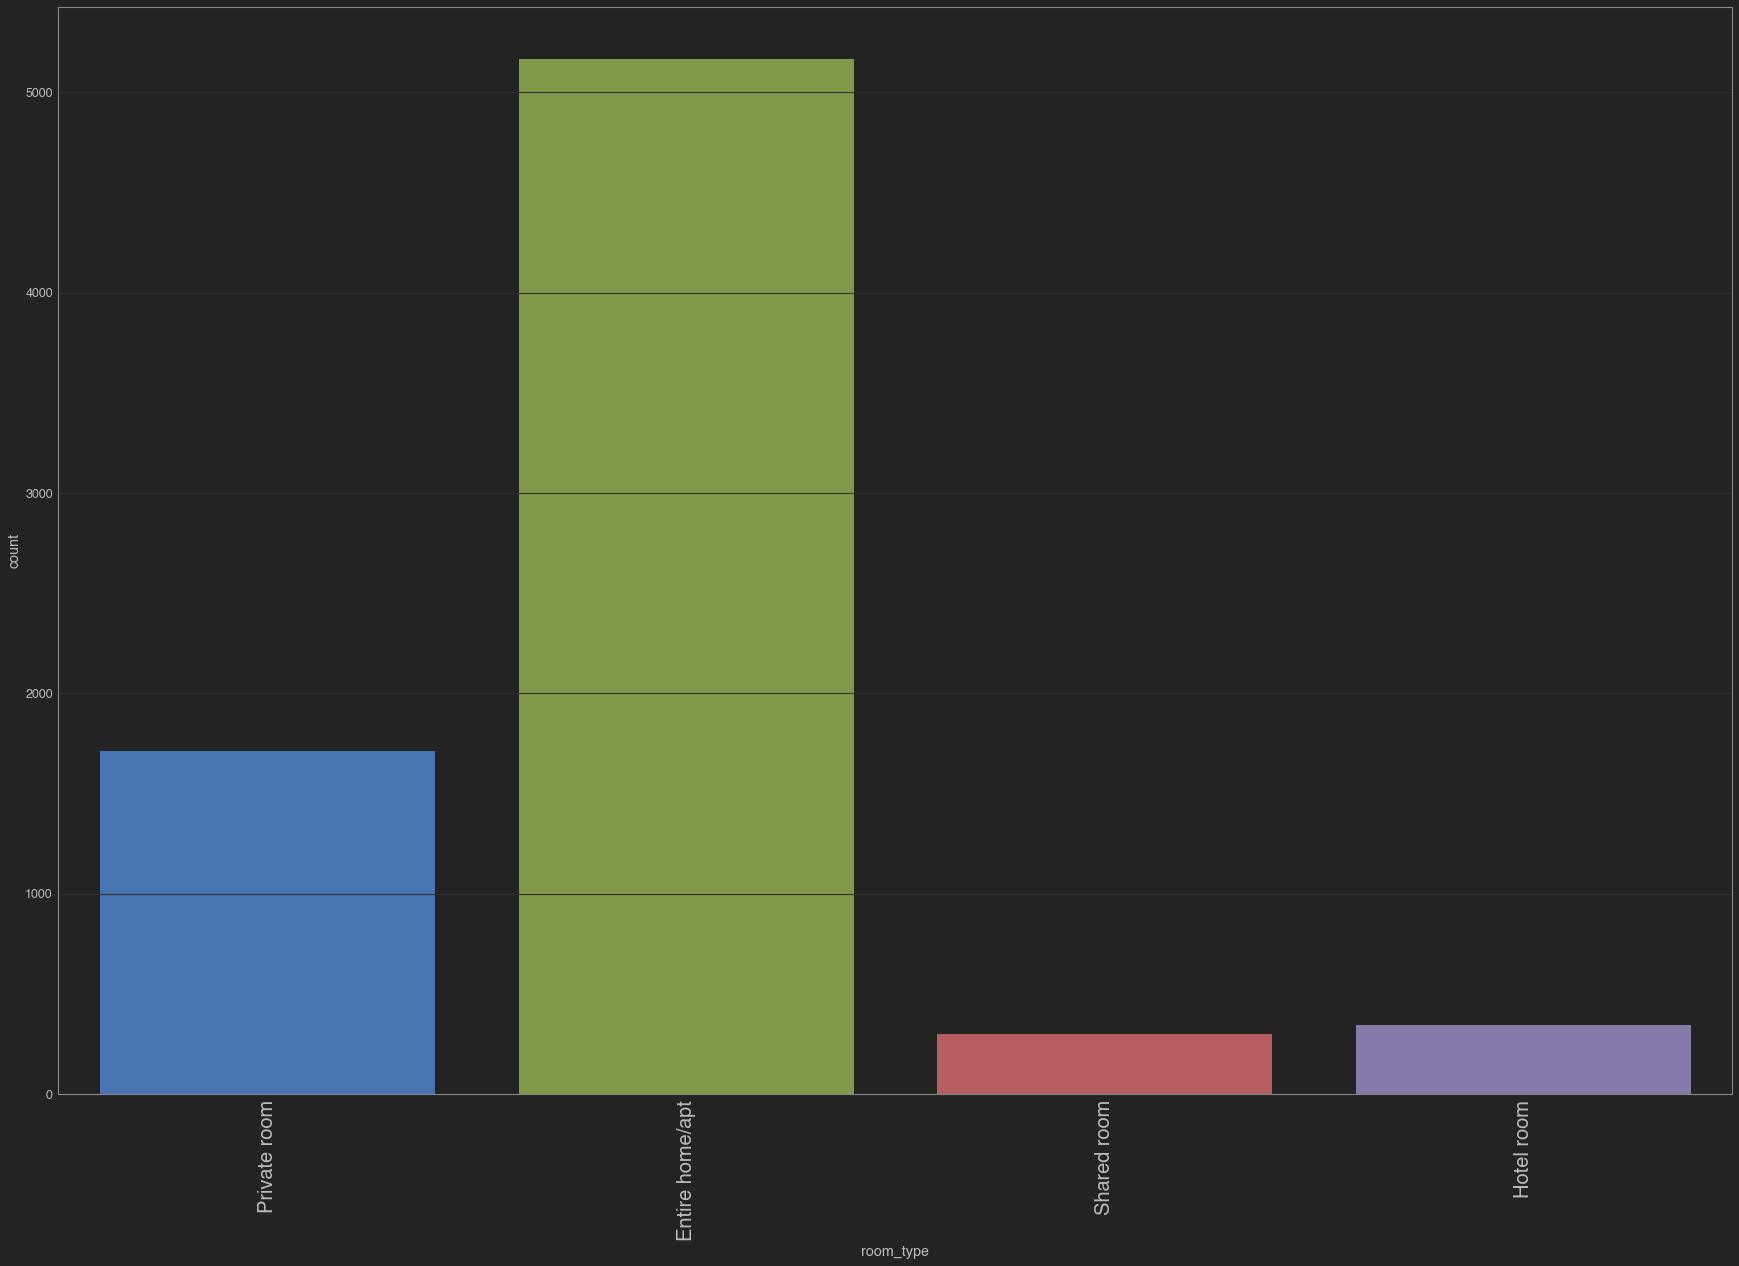

In [48]:
plt.figure(figsize=(30,20))
g= sns.countplot(data=airbnb_legal, x='room_type') #memvisualisasikan jumlah setiap type properti dengan seaborn countplot
g.set_xticklabels(g.get_xticklabels(),fontsize=20, rotation=90)
plt.savefig('room_type.png')

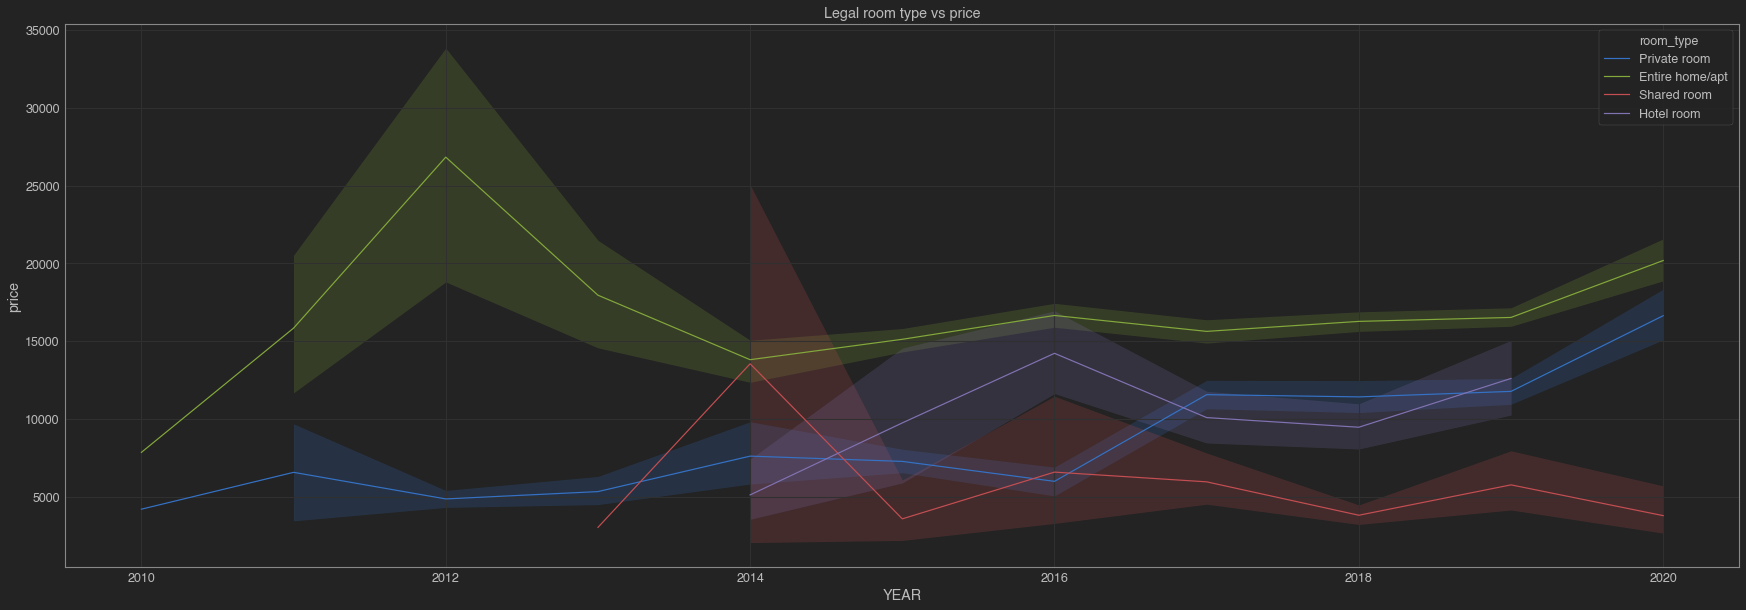

In [55]:
plt.figure(figsize=(30,10))
sns.lineplot(x='year', y='price', data=airbnb_legal, hue='room_type')
plt.xlabel('YEAR')
plt.title('Legal room type vs price');

In [130]:
airbnb_legal.pivot_table(index=['neighbourhood_cleansed','room_type'], values=['beds','bedrooms','accommodates','guests_included','host_response_rate','host_acceptance_rate','reviews_per_month','review_scores_rating','availability_365','price'],aggfunc=['median'],margins=True)

median                            \
                                       accommodates availability_365 bedrooms   
neighbourhood_cleansed room_type                                                
Adachi Ku              Entire home/apt          5.0             82.0      2.0   
                       Hotel room               2.0             89.0      1.0   
                       Private room             1.0             84.0      1.0   
                       Shared room              2.0            135.5      1.0   
Akishima Shi           Entire home/apt          2.0             84.0      1.0   
Arakawa Ku             Entire home/apt          3.0            154.5      1.0   
                       Hotel room               2.0             68.0      1.0   
                       Private room             4.0            143.0      1.0   
                       Shared room              1.0            153.0      1.0   
Bunkyo Ku              Entire home/apt          7.5            157.0      2.0   
                       Hotel room               5.0            168.0      1.0   
                       Private room             2.0             90.0      1.0   
                       Shared room             10.5            135.5      1.0   
Chiyoda Ku             Entire home/apt          4.0            130.0      1.0   
                       Hotel room               2.0             73.0      1.0   
                       Private room             3.0             88.5      1.0   
                       Shared room              1.0             80.5      1.0   
Chofu Shi              Entire home/apt          4.0            134.0      0.5   
                       Private room             2.0             93.0      1.0   
Chuo Ku                Entire home/apt          3.0             89.0      1.0   
                       Hotel room               1.0             20.0      1.0   
                       Private room             2.0            129.5      1.0   
                       Shared room              1.0            148.0      1.0   
Edogawa Ku             Entire home/apt          5.0             91.0      2.0   
                       Private room             3.0             96.0      1.0   
                       Shared room              1.5            161.5      1.0   
Fuchu Shi              Entire home/apt          8.5            109.0      2.5   
Fussa Shi              Entire home/apt          3.0             55.0      1.0   
Hachijo Machi          Private room             4.0              1.0      0.0   
Hachioji Shi           Entire home/apt          4.0             90.5      1.0   
                       Private room             4.0             88.5      1.0   
                       Shared room              1.0              9.0      1.0   
Higashikurume Shi      Entire home/apt          3.0             89.5      1.5   
                       Private room             3.0            172.0      1.0   
Higashimurayama Shi    Entire home/apt          3.5            133.5      1.0   
Higashiyamato Shi      Private room             2.0             93.0      0.0   
Hino Shi               Entire home/apt          4.5             89.0      2.0   
                       Private room             1.5            161.5      1.0   
Hinohara Mura          Entire home/apt          4.5             80.5      1.0   
                       Private room             5.0            106.0      1.0   
                       Shared room              7.0             91.0      1.0   
Inagi Shi              Private room             1.0             90.0      1.0   
Itabashi Ku            Entire home/apt          4.0            149.0      1.0   
                       Hotel room               2.0             89.0      1.0   
                       Private room             2.0             88.0      1.0   
                       Shared room              2.5            115.5      1.0   
Katsushika Ku          Entire home/apt          6.0             93.0      2.

# Mendapatkan analisis tentang perkembangan untuk Airbnb yang berlokasi dekat dengan venue yang akan dipakai pada 2020 Olympics
- top 5 closest

In [57]:
TOP = airbnb_legal[(airbnb_legal.neighbourhood_cleansed == 'Shinjuku Ku')|(airbnb_legal.neighbourhood_cleansed == 'Taito Ku')|(airbnb_legal.neighbourhood_cleansed == 'Toshima Ku')|(airbnb_legal.neighbourhood_cleansed == 'Sumida Ku')|(airbnb_legal.neighbourhood_cleansed == 'Shibuya Ku')]

In [137]:
TOP['neighbourhood_cleansed'].unique()

array(['Shibuya Ku', 'Shinjuku Ku', 'Toshima Ku', 'Taito Ku', 'Sumida Ku'],
      dtype=object)

In [139]:
TOP['neighbourhood_cleansed'].value_counts()

Shinjuku Ku    1519
Taito Ku       1040
Toshima Ku      839
Sumida Ku       690
Shibuya Ku      483
Name: neighbourhood_cleansed, dtype: int64

In [96]:
TOP.pivot_table(index=['neighbourhood_cleansed','year','month'], values='host_id', aggfunc=['count']).T

count
                                  host_id
neighbourhood_cleansed year month        
Shibuya Ku             2010 6           2
                       2011 7           1
                            8           2
                       2013 1           3
                            8           1
                            11          2
                       2014 3           2
                            4           5
                            6           4
                            8           4
                            9           3
                            10          1
                            11          2
                            12          3
                       2015 1           5
                            2           1
                            3           1
                            4           3
                            6           9
                            8           7
                            9          15
                            10         16
                            11          3
                            12          6
                       2016 1           6
                            2          19
                            3          25
                            4           7
                            5           2
                            6           6
                            7           6
                            8           1
                            9          16
                            10          2
                            11          9
                            12          3
                       2017 1           1
                            2           6
                            3           5
                            4           1
                            5           2
                            6           3
                            7           2
                            8          10
                            9          14
                            10          3
                            11          1
                            12          1
                       2018 1           1
                            2           4
                            3           9
                            4           2
                            5          18
                            6           3
                            7           9
                            8          11
                            9          21
                            10          4
                            11          8
                            12         14
                       2019 1           7
                            2           1
                            3           3
                            4           6
                            6           1
                            7          15
                            8           9
                            9           4
                            10         16
                            11         13
                            12         19
                       2020 1           7
                            2           6
                            3           2
                            4           2
                            5          16
Shinjuku Ku            2011 9           2
                            10          5
                       2012 8           1
                       2013 1           2
                            2           1
                            8           2
                            11          3
                            12          1
                       2014 3          23
                            4           1
                            5           3
                            6           5
                            7           5
                            8           1
                            9          23
                            10          1
                            12          1
    

# 2018

In [64]:
year2018 = TOP[TOP.year == 2018]

In [99]:

tokyo = folium.Map([35.6812,139.7671],zoom_start=12,tiles='CartoDB dark_matter')

# Adding a heatmap to the base map
HeatMap(data=year2018[['latitude', 'longitude']], radius=10).add_to(tokyo)
folium.Marker(location=[35.6779, 139.7145],popup='<strong>Tokyo Olympic Stadium</strong><br>Sports: Athletics,Football', tooltip='Click for more information',icon=folium.Icon(color='blue')).add_to(tokyo)
folium.Marker(location=[35.641014,139.792048],popup='<strong>Ariake Gymnastic Centre</strong><br>Sports: Gymnastic', tooltip='Click for more information',icon=folium.Icon(color='lightgray')).add_to(tokyo)
folium.Marker(location=[35.651403, 139.815074],popup='<strong>Tokyo Aquatics Centre</strong><br>Sports: Swimming', tooltip='Click for more information',icon=folium.Icon(color='red')).add_to(tokyo)
folium.Marker(location=[35.6933, 139.7499],popup='<strong>Nippon Budokan</strong><br>Sports: Karate', tooltip='Click for more information',icon=folium.Icon(color='beige')).add_to(tokyo)
folium.Marker(location=[35.6767, 139.7638],popup='<strong>Tokyo International Forum</strong><br>Sports: Weightlifting', tooltip='Click for more information',icon=folium.Icon(color='darkpurple')).add_to(tokyo)
# Displaying the map
tokyo

# 2019

In [71]:
year2019 = TOP[TOP.year == 2019]

In [100]:

tokyo = folium.Map([35.6812,139.7671],zoom_start=12,tiles='CartoDB dark_matter')

# Adding a heatmap to the base map
HeatMap(data=year2019[['latitude', 'longitude']], radius=10).add_to(tokyo)
folium.Marker(location=[35.6779, 139.7145],popup='<strong>Tokyo Olympic Stadium</strong><br>Sports: Athletics,Football', tooltip='Click for more information',icon=folium.Icon(color='blue')).add_to(tokyo)
folium.Marker(location=[35.641014,139.792048],popup='<strong>Ariake Gymnastic Centre</strong><br>Sports: Gymnastic', tooltip='Click for more information',icon=folium.Icon(color='lightgray')).add_to(tokyo)
folium.Marker(location=[35.651403, 139.815074],popup='<strong>Tokyo Aquatics Centre</strong><br>Sports: Swimming', tooltip='Click for more information',icon=folium.Icon(color='red')).add_to(tokyo)
folium.Marker(location=[35.6933, 139.7499],popup='<strong>Nippon Budokan</strong><br>Sports: Karate', tooltip='Click for more information',icon=folium.Icon(color='beige')).add_to(tokyo)
folium.Marker(location=[35.6767, 139.7638],popup='<strong>Tokyo International Forum</strong><br>Sports: Weightlifting', tooltip='Click for more information',icon=folium.Icon(color='darkpurple')).add_to(tokyo)

# Displaying the map
tokyo

# 2020

In [73]:
year2020 = TOP[TOP.year == 2020]

In [101]:

tokyo = folium.Map([35.6812,139.7671],zoom_start=12,tiles='CartoDB dark_matter')

# Adding a heatmap to the base map
HeatMap(data=year2020[['latitude', 'longitude']], radius=10).add_to(tokyo)
folium.Marker(location=[35.6779, 139.7145],popup='<strong>Tokyo Olympic Stadium</strong><br>Sports: Athletics,Football', tooltip='Click for more information',icon=folium.Icon(color='blue')).add_to(tokyo)
folium.Marker(location=[35.641014,139.792048],popup='<strong>Ariake Gymnastic Centre</strong><br>Sports: Gymnastic', tooltip='Click for more information',icon=folium.Icon(color='lightgray')).add_to(tokyo)
folium.Marker(location=[35.651403, 139.815074],popup='<strong>Tokyo Aquatics Centre</strong><br>Sports: Swimming', tooltip='Click for more information',icon=folium.Icon(color='red')).add_to(tokyo)
folium.Marker(location=[35.6933, 139.7499],popup='<strong>Nippon Budokan</strong><br>Sports: Karate', tooltip='Click for more information',icon=folium.Icon(color='beige')).add_to(tokyo)
folium.Marker(location=[35.6767, 139.7638],popup='<strong>Tokyo International Forum</strong><br>Sports: Weightlifting', tooltip='Click for more information',icon=folium.Icon(color='darkpurple')).add_to(tokyo)

# Displaying the map
tokyo

# CATEGORICAL

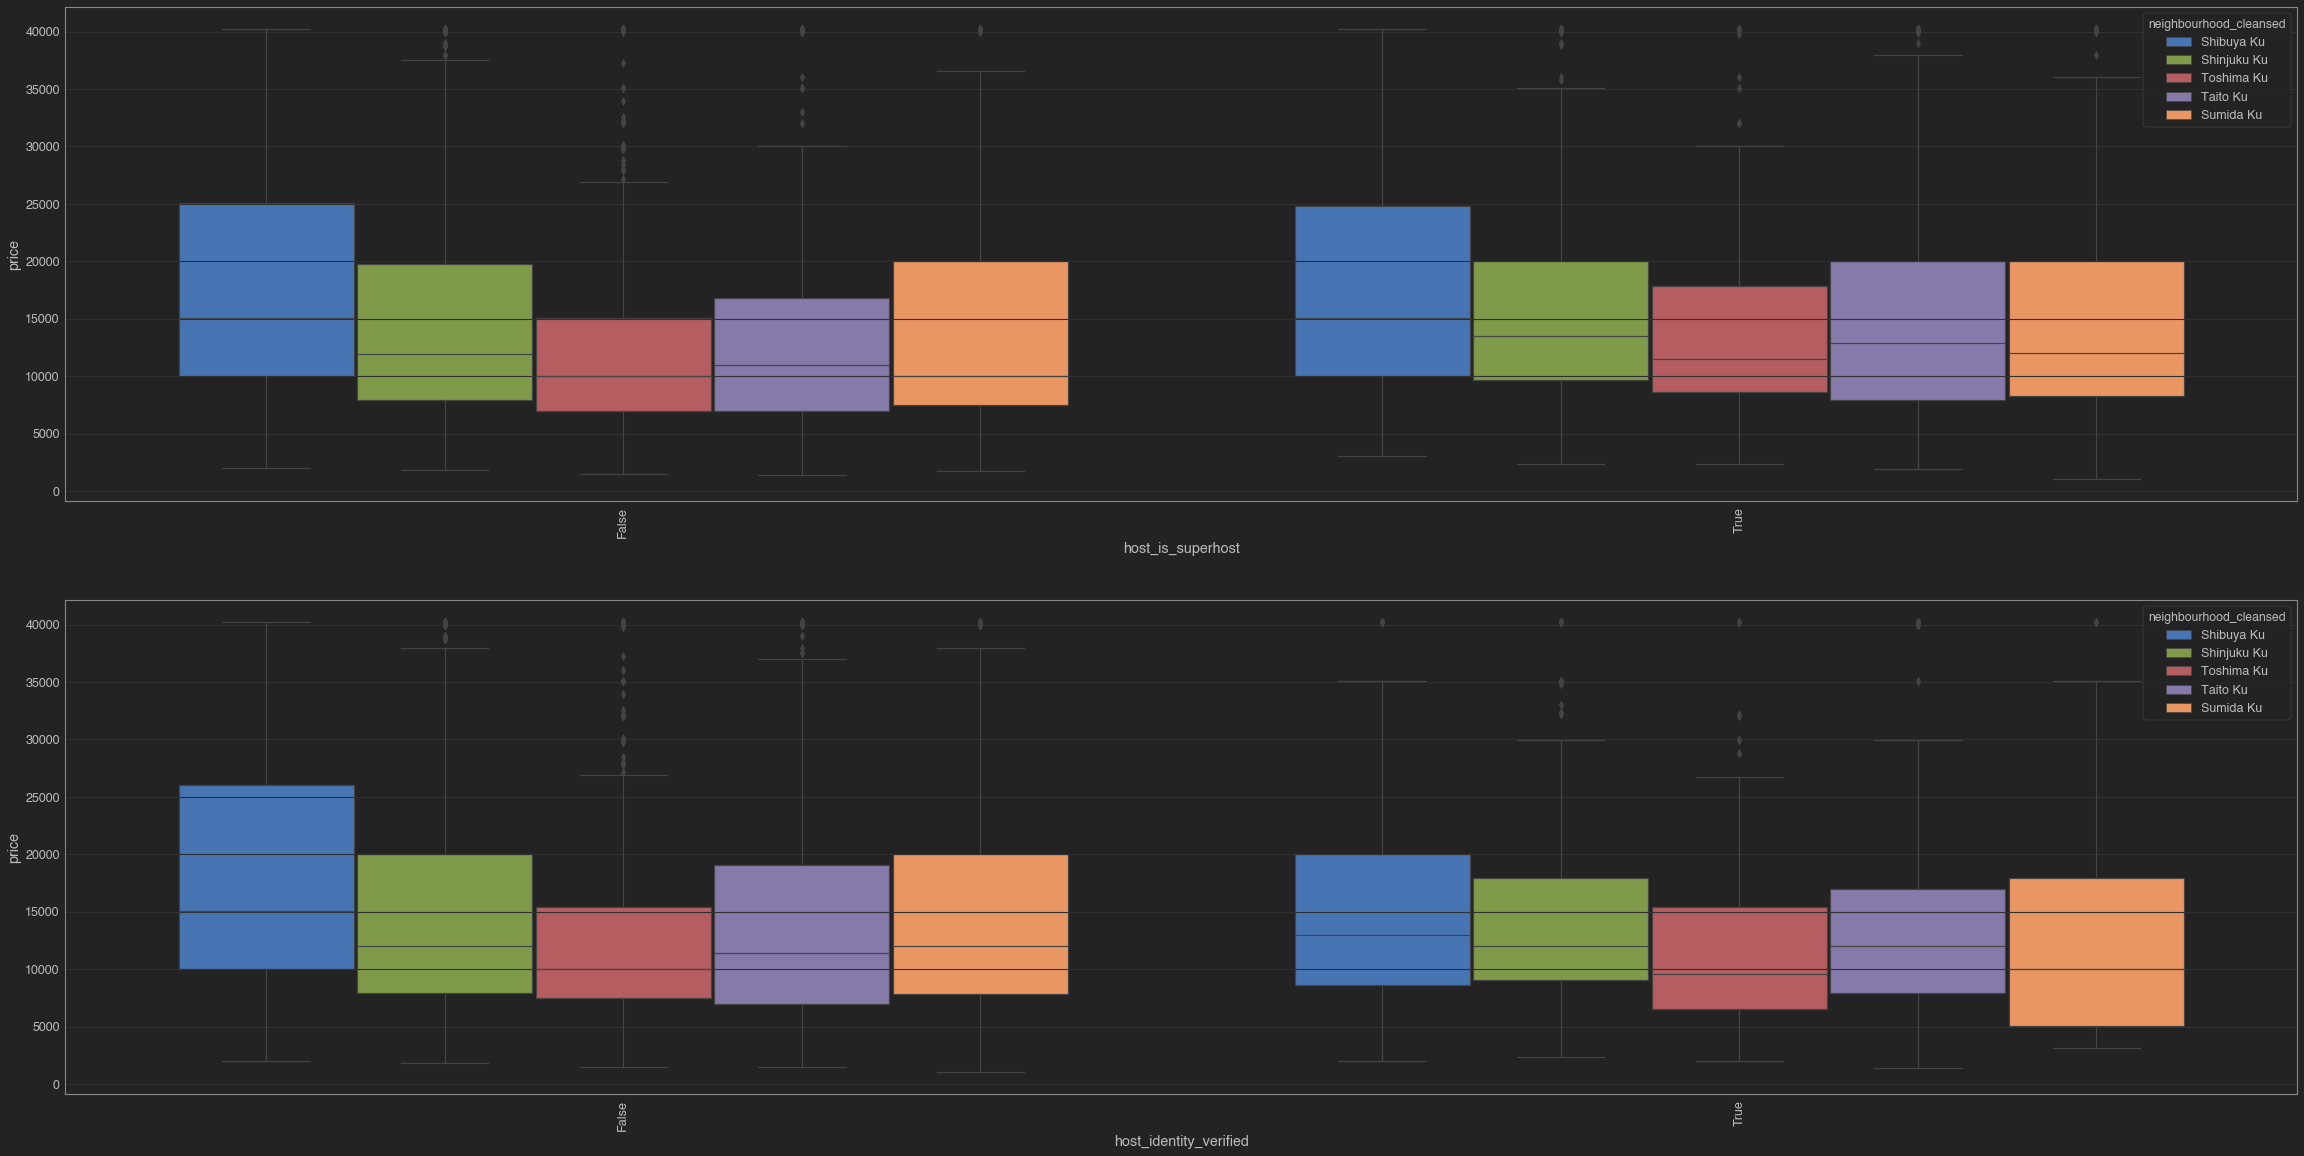

In [58]:
fig, ax = plt.subplots(2, 1, figsize=(40, 20))
for var, subplot in zip(['host_is_superhost','host_identity_verified'], ax.flatten()):
    sns.boxplot(x=var, y='price', data=TOP, hue='neighbourhood_cleansed',ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

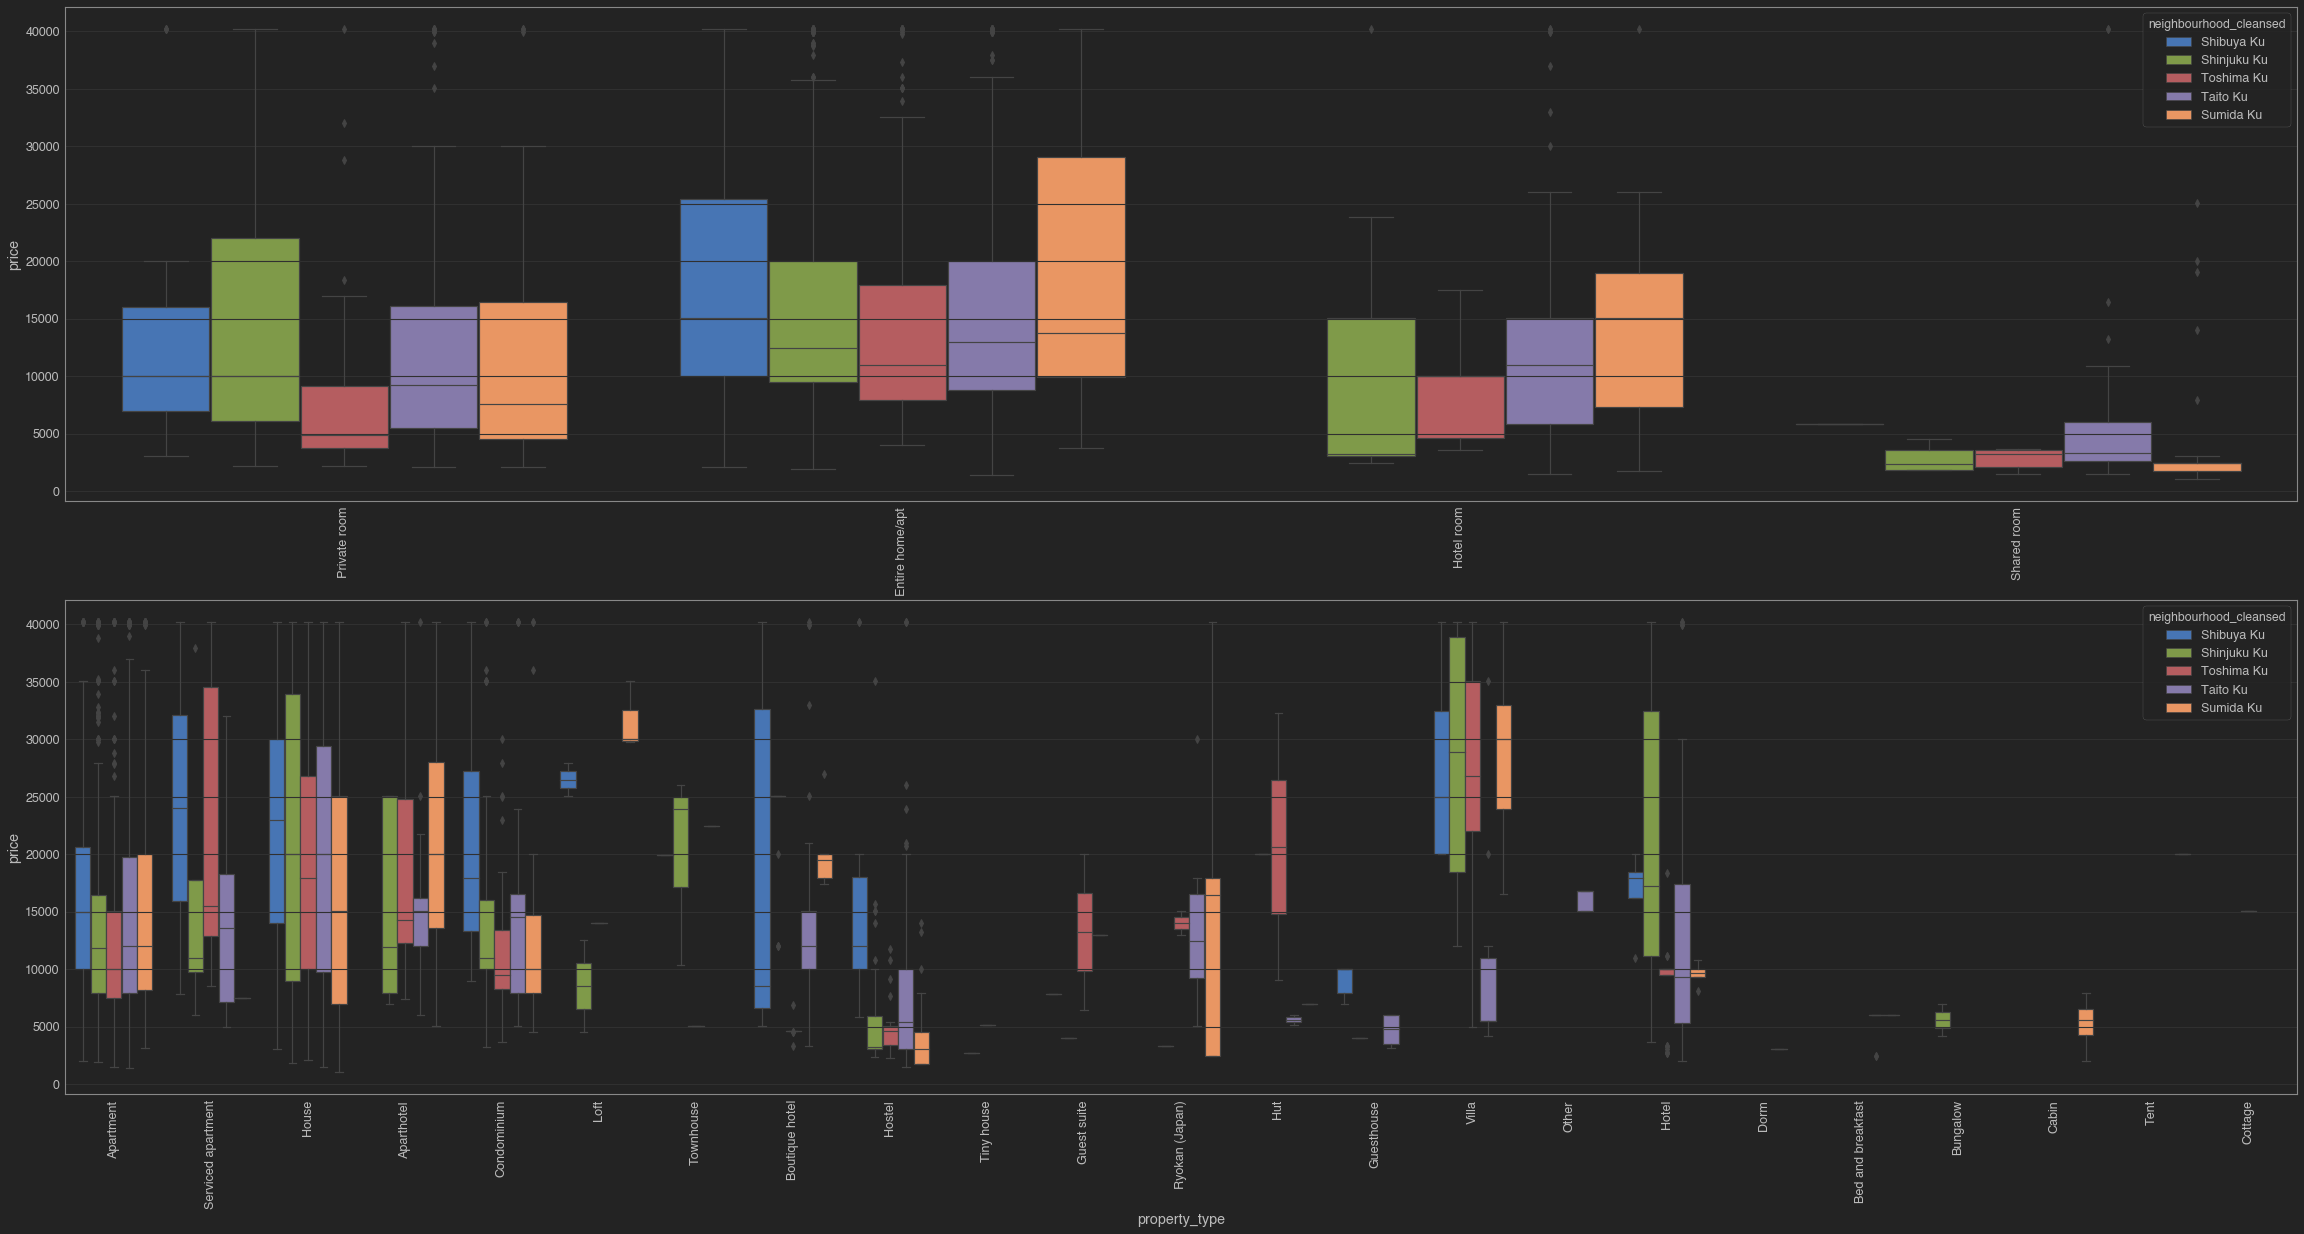

In [59]:
fig, ax = plt.subplots(2, 1, figsize=(40, 20))
for var, subplot in zip(['room_type','property_type'], ax.flatten()):
    sns.boxplot(x=var, y='price', data=TOP, hue='neighbourhood_cleansed',ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)



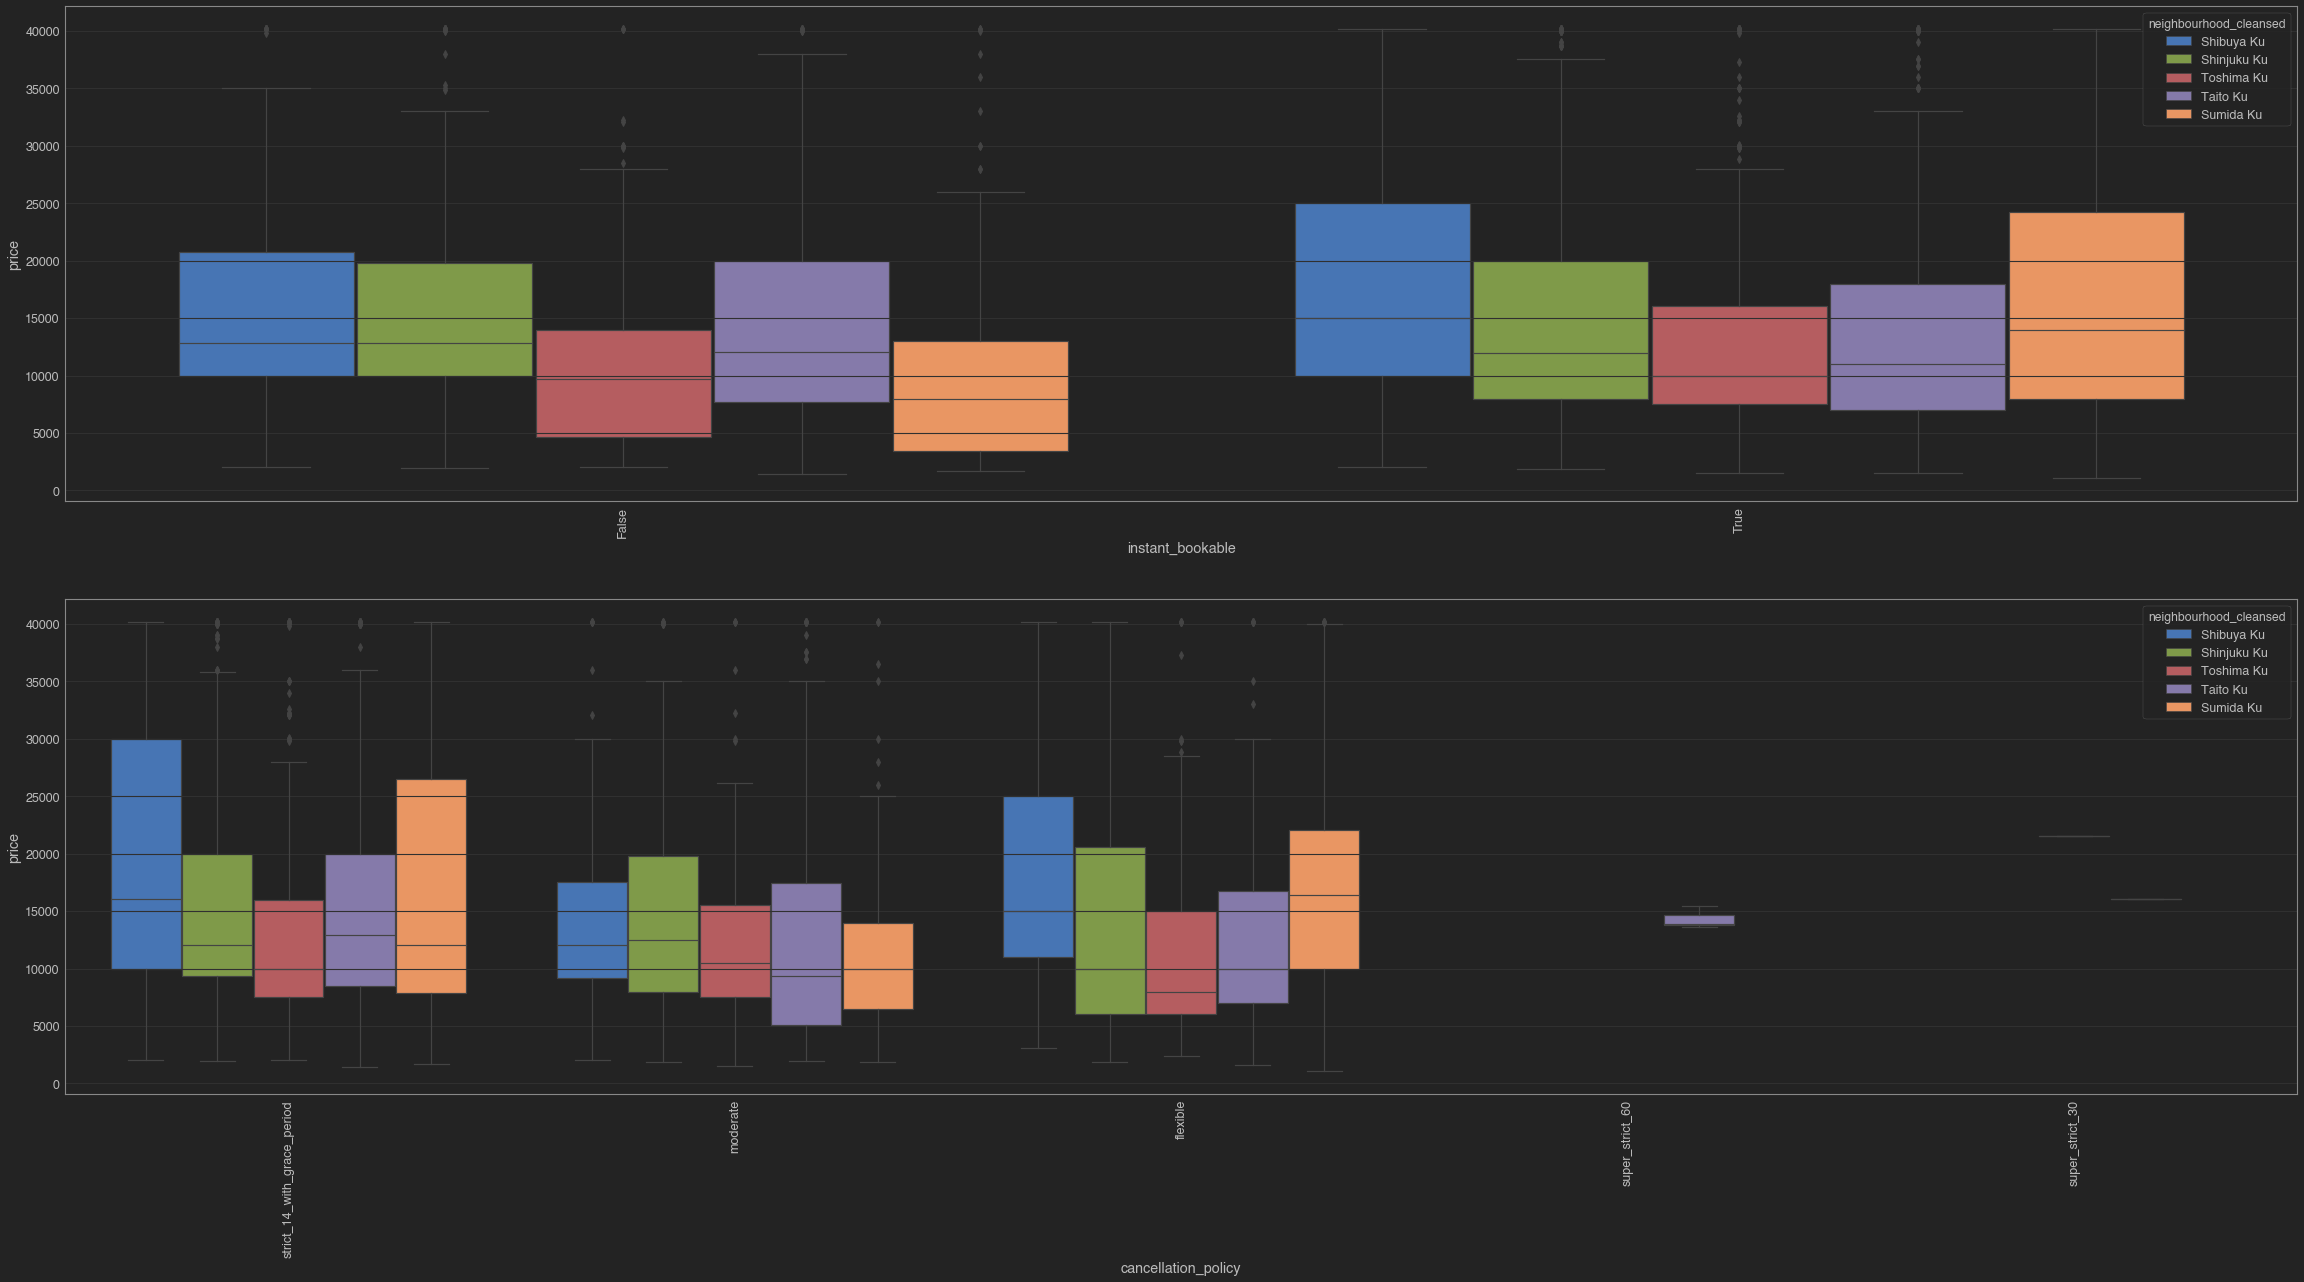

In [60]:
fig, ax = plt.subplots(2, 1, figsize=(40, 20))
for var, subplot in zip(['instant_bookable','cancellation_policy'], ax.flatten()):
    sns.boxplot(x=var, y='price', data=TOP, hue='neighbourhood_cleansed',ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

# NUMERICAL

In [91]:
TOP.pivot_table(index=['neighbourhood_cleansed','room_type'], values=['beds','bedrooms','accommodates','guests_included','host_response_rate','host_acceptance_rate','reviews_per_month','review_scores_rating','availability_365','price'],aggfunc=['median'],margins=True)

median                            \
                                       accommodates availability_365 bedrooms   
neighbourhood_cleansed room_type                                                
Shibuya Ku             Entire home/apt            4             90.5      1.0   
                       Private room               2             99.0      1.0   
                       Shared room                1            118.0      1.0   
Shinjuku Ku            Entire home/apt            4             91.0      1.0   
                       Hotel room                 1            171.5      1.0   
                       Private room               2             89.0      1.0   
                       Shared room                1             69.0      1.0   
Sumida Ku              Entire home/apt            4            119.0      1.0   
                       Hotel room                 3            106.0      1.0   
                       Private room               3            117.0      1.0   
                       Shared room                1            115.0      1.0   
Taito Ku               Entire home/apt            5            124.0      1.0   
                       Hotel room                 2            117.0      1.0   
                       Private room               3             93.0      1.0   
                       Shared room                2             90.0      1.0   
Toshima Ku             Entire home/apt            4             94.0      1.0   
                       Hotel room                 3             94.5      1.0   
                       Private room               2             89.5      1.0   
                       Shared room                2             90.0      1.0   
All                                               4             94.0      1.0   

                                                             \
                                       beds guests_included   
neighbourhood_cleansed room_type                              
Shibuya Ku             Entire home/apt  2.0             2.0   
                       Private room     1.0             1.0   
                       Shared room      1.0             1.0   
Shinjuku Ku            Entire home/apt  2.0             2.0   
                       Hotel room       1.0             1.0   
                       Private room     2.0             1.0   
                       Shared room      1.0             1.0   
Sumida Ku              Entire home/apt  2.0             2.0   
                       Hotel room       3.0             1.0   
                       Private room     2.0             1.0   
                       Shared room      1.0             1.0   
Taito Ku               Entire home/apt  3.0             2.0   
                       Hotel room       2.0             1.0   
                       Private room     2.0             1.0   
                       Shared room      2.0             1.0   
Toshima Ku             Entire home/apt  2.0             2.0   
                       Hotel room       1.0             3.0   
                       Private room     1.0             1.0   
                       Shared room      1.0             1.0   
All                                     2.0             2.0   

                                                             \
                                       host_acceptance_rate   
neighbourhood_cleansed room_type                              
Shibuya Ku             Entire home/apt                100.0   
                       Private room                   100.0   
                       Shared room                     97.5   
Shinjuku Ku            Entire home/apt                100.0   
                       Hotel room                      99.5   
                       Private room                   100.0   
                       Shared room                    100.0   
Sumida Ku              Entire home/apt                100.0   
                       Hotel room     

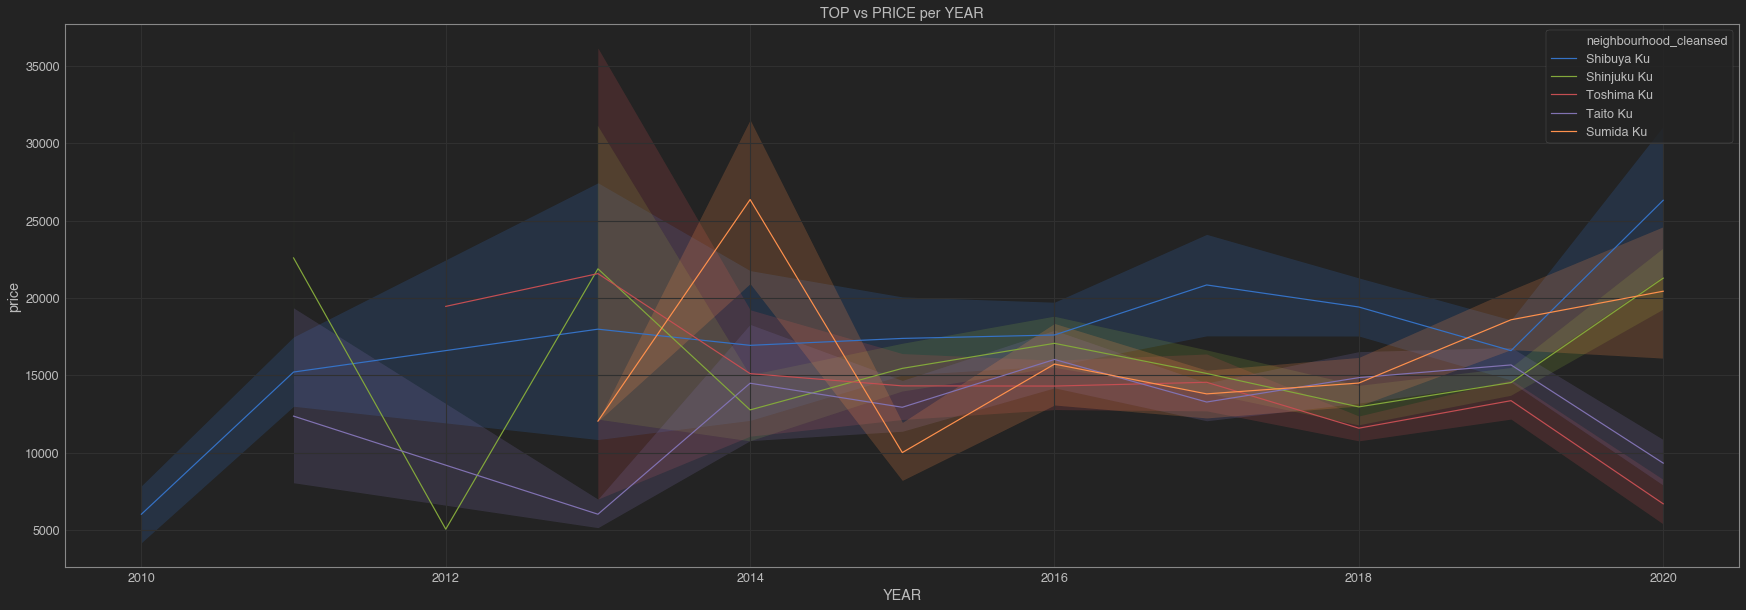

In [90]:
plt.figure(figsize=(30,10))
sns.lineplot(x='year', y='price', data=TOP, hue='neighbourhood_cleansed')
plt.xlabel('YEAR')
plt.title('TOP vs PRICE per YEAR');


In [92]:
TOP.pivot_table(index=['neighbourhood_cleansed','room_type','year'], values='price', aggfunc=['min','max','mean','sum'])

min        max          mean  \
                                               price      price         price   
neighbourhood_cleansed room_type       year                                     
Shibuya Ku             Entire home/apt 2010   7847.0   7847.000   7847.000000   
                                       2011  13007.0  19623.000  15212.333333   
                                       2013  12147.0  40178.875  20290.575000   
                                       2014   3010.0  40178.875  17525.585227   
                                       2015   3010.0  40178.875  19010.216518   
                                       2016   3450.0  40178.875  18235.144737   
                                       2017   3225.0  40178.875  20842.323980   
                                       2018   2042.0  40178.875  19936.844551   
                                       2019   2042.0  40178.875  16595.222074   
                                       2020   3547.0  40178.875  28546.081897   
                       Private room    2010   4192.0   4192.000   4192.000000   
                                       2013   6450.0   6450.000   6450.000000   
                                       2014   3010.0  17952.000  10481.000000   
                                       2015   6020.0  15050.000   8290.600000   
                                       2016   5052.0  17952.000   9091.000000   
                                       2018   9997.0  40178.875  18860.854167   
                                       2020   3117.0  16017.000  10158.250000   
                       Shared room     2018   5805.0   5805.000   5805.000000   
Shinjuku Ku            Entire home/apt 2011   5912.0  35045.000  22590.000000   
                                       2012   5052.0   5052.000   5052.000000   
                                       2013   3977.0  40178.875  21885.291667   
                                       2014   1935.0  40178.875  12841.673387   
                                       2015   3010.0  40178.875  16524.824153   
                                       2016   2150.0  40178.875  17707.220126   
                                       2017   3225.0  40178.875  16137.827614   
                                       2018   2042.0  40178.875  15850.633102   
                                       2019   2795.0  40178.875  14573.618470   
                                       2020   3010.0  40178.875  20364.257576   
                       Hotel room      2015  12040.0  12040.000  12040.000000   
                                       2018   2472.0  23865.000   5625.791667   
                                       2019   3547.0  40178.875  17963.982143   
                       Private room    2014   7955.0   7955.000   7955.000000   
                                       2015   3010.0  35045.000  13349.937500   
                                       2016   5052.0  26015.000  10295.000000   
                                       2017   3977.0  40178.875   9830.355000   
                                       2018   2150.0  27950.000   6832.153846   
                                       2019   3332.0  40178.875  14061.042910   
                                       2020   3870.0  40178.875  22599.211957   
                       Shared room     2015   2365.0   2687.000   2595.000000   
                                       2016   3655.0   3655.000   3655.000000   
                                       2017   3450.0   3547.000   3498.500000   
                                       2018   1827.0   3977.000   2472.000000   
                                       2019   4515.0   4515.000   4515.000000   
Sumida Ku              Entire home/apt 2013  12040.0  12040.000  12040.000000   
                                       2014   5052.0  40178.875  27211.977273   
                                       2015   5052.0  40178.875  14907.708333   
                                       2016   4407.0  40178.875  16639.092105   

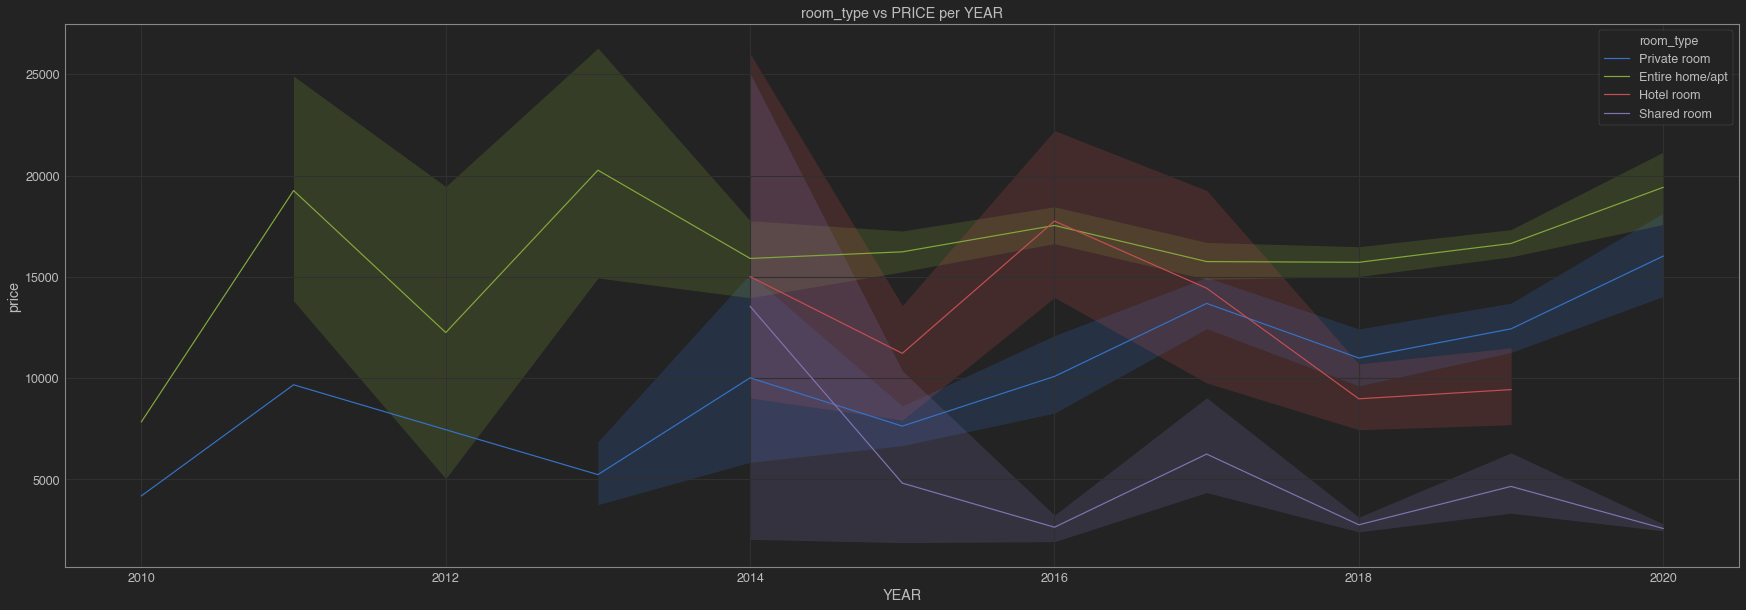

In [141]:
plt.figure(figsize=(30,10))
sns.lineplot(x='year', y='price', data=TOP, hue='room_type')
plt.xlabel('YEAR')
plt.title('room_type vs PRICE per YEAR')
plt.savefig('Room Type vs Price per Year.png');

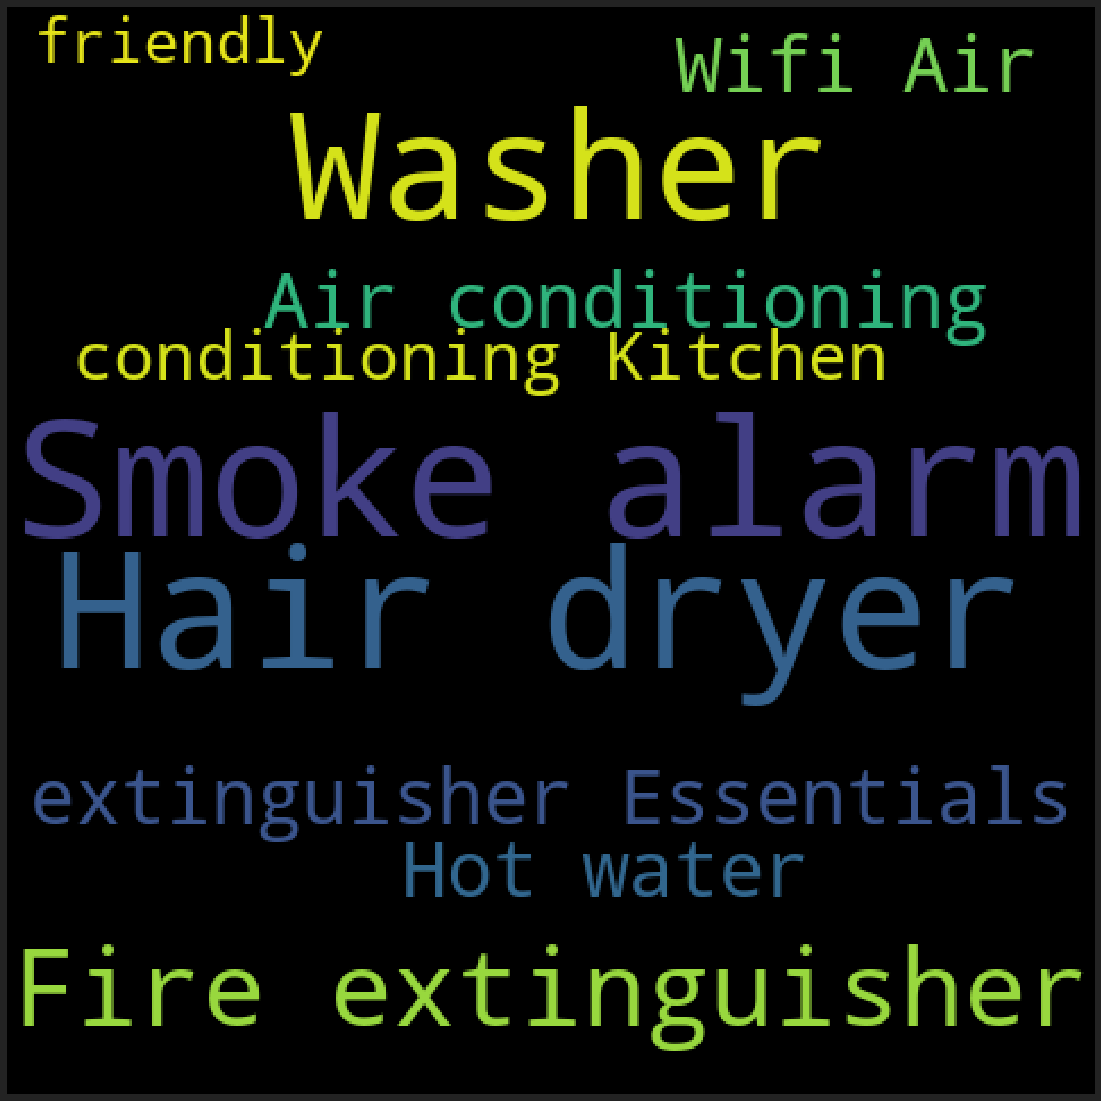

<Figure size 460.8x403.2 with 0 Axes>

In [143]:
text = TOP['amenities'].values
amenities = WordCloud(width=480, height=480, max_words=10, colormap='viridis',background_color="black").generate(str(text))
plt.figure(figsize=(20,20))
plt.imshow(amenities)
plt.axis("off")
plt.show()
plt.savefig('Amenities.jpg')

 # KESIMPULAN

Terdapat 7526 listing yang legal atau mematuhi kaidah aturan Minpaku Law. Berdasarkan analisis angka airbnb, Shinjuku menduduki posisi pertama tekait area terlaku untuk Airbnb. Area ini memiliki total 1519. Lalu Untuk Type ruangan sendiri, Entire Home memduduki posisi pertama di tahun ini dengan kisaran harga 20000 yen. Yang mana merupakan area yang dekat pula dengan Stadium Tokyo Olympics yaitu salah satu tempat 2020 Olympics diselenggarakan untuk cabang olah raga Football.  Lalu setelah dikelompokkan terdapat berbagai perlengkapan yang dibutuhkan untuk membuat Airbnb. Yaitu Washer, Smoke Alarm,Hair Dryer,  Wifi, Conditioning Kitchen, Essentials dll. Untuk Trend tersendiri. Entire Room akan terus naik berdasarkan data dua tahun terakhir. Sehingga sangat baik dan menjanjikan.